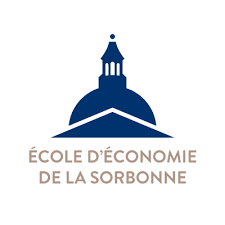

* [1. Importing data](#chapter1)

* [2. Data preparation](#chapter2)
    * [2.1 Droping and renaming columns ](#section_2_1)
    * [2.2 Panel data structure  ](#section_2_2)
    * [2.3 Cleaning and formating World Bank Development Indicators](#section_2_3)
    * [2.4 Cleaning the financial development index ](#section_2_4)
    * [2.5 Cleaning the energy data sets ](#section_2_5)
    * [2.6 Merging data ](#section_2_6)
    * [2.7 Renaming variables](#section_2_7)
    * [2.8 Creation of new variables](#section_2_8)
    * [2.9 Drop countries](#section_2_9)
    * [2.10 First difference transformation](#section_2_10)
    * [2.11 One-way within transformation](#section_2_11)
    * [2.12 Two-way transformation](#section_2_12)
    * [2.13 Lagged versions original data set](#section_2_13)
    


* [3. Descriptive statistics](#chapter3)
    * [3.1 Descrptive statistics original data](#section_3_1)
    * [3.2 Descrptive statistics first difference transformation](#section_3_2)
    * [3.3 Descrptive statistics one-way within transformation](#section_3_3)
    * [3.4 Descrptive statistics two-way transformation](#section_3_4)

* [4. Estimations specification 1](#chapter4)
    * [4.1 First difference estimation](#section_4_1)
    * [4.2 One-way within estimation](#section_4_2)
    * [4.3 Two-way within estimation](#section_4_3)


* [5. Estimations specification 2](#chapter5)
    * [5.1 First difference estimation](#section_5_1)
    * [5.2 One-way within estimation](#section_5_2)
    * [5.3 Two-way within estimation](#section_5_3)


* [6. Estimations specification 3](#chapter6)
    * [6.1 First difference estimation](#section_6_1)
    * [6.2 One-way within estimation](#section_6_2)
    * [6.3 Two-way within estimation](#section_6_3)


* [7. Estimations specification 4](#chapter7)
    * [7.1 First difference estimation](#section_7_1)
    * [7.2 One-way within estimation](#section_7_2)
    * [7.3 Two-way within estimation](#section_7_3)

 

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import math
import chardet
import linearmodels as lm
from linearmodels import PanelOLS

## 1. Importing data<a id="chapter1"></a>

First, I import the World Bank Data set downloaded from https://databank.worldbank.org/source/world-development-indicators#

In [2]:
df = pd.read_csv("WB_dataset4.csv")

Then, I upload the Financial Markets Index from downloaded from the IMF webpage: https://data.imf.org/?sk=f8032e80-b36c-43b1-ac26-493c5b1cd33b&sid=1480712464593

In [3]:
fmi = pd.read_csv("Financial markets index.csv")

Finally I upload the files with the electricity generation data obtained from IRENA webpage: https://pxweb.irena.org/pxweb/en/IRENASTAT?_gl=1*1r0zhu0*_ga*MTYwMjc0OTI1OC4xNzA4MDc1NjEy*_ga_7W6ZEF19K4*MTcwODI4Mzk5MC41LjEuMTcwODI4NDIzMS4zMi4wLjA.

In [4]:
with open('energy_off_grid.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
energy_off_grid = pd.read_csv('energy_off_grid.csv', encoding = enc['encoding'])

In [5]:
with open('energy_on_grid.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
energy_on_grid = pd.read_csv('energy_on_grid.csv', encoding = enc['encoding'])

# 2. Data preparation<a id="chapter2"></a>

## 2.1 Droping and renaming columns <a id="section_2_1"></a>

I drop the Series Code and Country Code columns and the last rows that do not content information

In [6]:
df.drop(["Country Code", "Series Code"], axis = 1, inplace= True)
df = df.head(2387)

Now I rename the years

In [7]:
years = list(range(1960, 2023))

names = ["Country", "Series"] + years

df.columns = names

In [8]:
df

,Country,Series,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"Central government debt, total (% of GDP)",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,Domestic credit to private sector by banks (% ...,4.6033055,4.635627474,4.662601531,3.440828036,3.730555348,3.900662364,2.804761972,2.565736922,...,4.108256237,3.732720212,3.789806755,3.775812577,3.710381108,3.442126771,3.173545494,2.994212606,..,..
2,Afghanistan,"Foreign direct investment, net inflows (% of GDP)",..,..,..,..,..,..,..,..,...,0.239801183,0.209664794,0.884000459,0.516606084,0.274796791,0.661572216,0.124495986,0.064993957,0.144401058,..
3,Afghanistan,GDP (current US$),537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1006666638,1399999967,1673333418,...,20146416876,20497128600,19134221745,18116572399,18753456507,18053222735,18799444415,19955929061,14266499430,..
4,Afghanistan,GDP per capita (constant 2015 US$),..,..,..,..,..,..,..,..,...,582.1039789,576.4878203,566.8811327,564.9208436,563.4882394,553.9733089,559.1409569,529.1449125,407.6165074,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,Zimbabwe,GDP (current US$),1052990400,1096646600,1117601600,1159511700,1217138000,1311435800,1281749500,1397002000,...,19091020000,19495519600,19963120600,20548678100,17584890937,34156069918,21832234921,21509698407,28371238666,27366627153
1732,Zimbabwe,GDP per capita (constant 2015 US$),1137.390585,1172.379107,1152.835674,1187.252745,1138.054109,1157.207401,1138.634664,1195.812399,...,1422.37671,1412.204012,1410.329173,1393.71701,1421.240769,1462.590279,1342.989586,1213.117057,1289.199067,1345.769082
1733,Zimbabwe,"Net financial flows, multilateral (NFL, curren...",..,..,..,..,..,..,..,..,...,-15845000,-1938000,153481000,-68274000,-60074000,-40834000,-6184000,-2783000,-4828000,2197000
1734,Zimbabwe,Regulatory Quality: Estimate,..,..,..,..,..,..,..,..,...,-1.854898691,-1.892657995,-1.656233072,-1.69492197,-1.583453536,-1.525652409,-1.486515284,-1.43441534,-1.386109114,-1.425967336


## 2.2 Panel data structure <a id="section_2_2"></a>

Now I set Country Name and Series Name as indexes and transpose the data

In [9]:
df = df.melt(id_vars= ["Series", "Country"] )

In [10]:
df.rename(columns = {"variable": "Year"}, inplace = True)

In [11]:
df = df.set_index(["Series", "Country", "Year"]).sort_index()

In [12]:
df

value
Series                                    Country     Year              
Central government debt, total (% of GDP) Afghanistan 1960            ..
                                                      1961            ..
                                                      1962            ..
                                                      1963            ..
                                                      1964            ..
...                                                                  ...
Regulatory Quality: Estimate              Zimbabwe    2018  -1.525652409
                                                      2019  -1.486515284
                                                      2020   -1.43441534
                                                      2021  -1.386109114
                                                      2022  -1.425967336

[109368 rows x 1 columns]

I drop the data before 1998

In [13]:
df = df.unstack(level= ["Series", "Country"]).tail(25)
df

value                       \
Series  Central government debt, total (% of GDP)                        
Country                               Afghanistan      Albania Algeria   
Year                                                                     
1998                                           ..  55.56570386      ..   
1999                                           ..           ..      ..   
2000                                           ..           ..      ..   
2001                                           ..           ..      ..   
2002                                           ..           ..      ..   
2003                                           ..           ..      ..   
2004                                           ..           ..      ..   
2005                                           ..           ..      ..   
2006                                           ..           ..      ..   
2007                                           ..           ..      ..   
2008                                           ..           ..      ..   
2009                                           ..           ..      ..   
2010                                           ..           ..      ..   
2011                                           ..  69.63767392      ..   
2012                                           ..  63.66915264      ..   
2013                                           ..  70.58076979      ..   
2014                                           ..  73.32022748      ..   
2015                                           ..  79.86441815      ..   
2016                                           ..  80.73558197      ..   
2017                                           ..  75.88872782      ..   
2018                                           ..  64.57038142      ..   
2019                                           ..  75.69848825      ..   
2020                                           ..  83.88749454      ..   
2021                                           ..  82.38361129      ..   
2022                                           ..           ..      ..   

                                                                     \
Series                                                                
Country American Samoa Andorra Angola Antigua and Barbuda Argentina   
Year                                                                  
1998                ..      ..     ..                  ..        ..   
1999                ..      ..     ..                  ..        ..   
2000                ..      ..     ..                  ..        ..   
2001                ..      ..     ..                  ..        ..   
2002                ..      ..     ..                  ..        ..   
2003                ..      ..     ..                  ..        ..   
2004                ..      ..     ..                  ..        ..   
2005                ..      ..     ..                  ..        ..   
2006                ..      ..     ..                  ..        ..   
2007                ..      ..     ..                  ..        ..   
2008                ..      ..     ..                  ..        ..   
2009                ..      ..     ..                  ..        ..   
2010                ..      ..     ..                  ..        ..   
2011                ..      ..     ..                  ..        ..   
2012                ..      ..     ..                  ..        ..   
2013                ..      ..     ..                  ..        ..   
2014                ..      ..     ..                  ..        ..   
2015                ..      ..     ..                  ..        ..   
2016                ..      ..     ..                  ..        ..   
2017                ..      ..     ..                  ..        ..   
2018                ..      ..     ..                  ..        ..   
2019                ..      ..     ..                  ..        ..   
2020                ..      ..     ..              

## 2.3 Cleaning and formating World Bank Development Indicators <a id="section_2_3"></a>

I transform the index to date time format

In [14]:
df.index = pd.to_datetime(df.index, format = "%Y").year

Replace ".." for NaN

In [15]:
df.replace({'..': np.nan}, inplace = True)

Convert values from objects to floats

In [16]:
df = df.astype(float)

Now I rearrange the multi index

In [17]:
df = df.stack(level = "Series").swaplevel().stack().swaplevel().sort_index()
df

value
Series                                    Country  Year           
Central government debt, total (% of GDP) Albania  1998  55.565704
                                                   2011  69.637674
                                                   2012  63.669153
                                                   2013  70.580770
                                                   2014  73.320227
...                                                            ...
Regulatory Quality: Estimate              Zimbabwe 2018  -1.525652
                                                   2019  -1.486515
                                                   2020  -1.434415
                                                   2021  -1.386109
                                                   2022  -1.425967

[33770 rows x 1 columns]

In [18]:
df.unstack(level = "Series")

value  \
Series           Central government debt, total (% of GDP)   
Country     Year                                             
Afghanistan 1998                                       NaN   
            1999                                       NaN   
            2000                                       NaN   
            2001                                       NaN   
            2002                                       NaN   
...                                                    ...   
Zimbabwe    2018                                       NaN   
            2019                                       NaN   
            2020                                       NaN   
            2021                                       NaN   
            2022                                       NaN   

                                                                        \
Series           Domestic credit to private sector by banks (% of GDP)   
Country     Year                                                         
Afghanistan 1998                                                NaN      
            1999                                                NaN      
            2000                                                NaN      
            2001                                                NaN      
            2002                                                NaN      
...                                                             ...      
Zimbabwe    2018                                           5.799617      
            2019                                           5.201928      
            2020                                           5.363890      
            2021                                           6.926340      
            2022                                           8.677194      

                                                                    \
Series           Foreign direct investment, net inflows (% of GDP)   
Country     Year                                                     
Afghanistan 1998                                               NaN   
            1999                                               NaN   
            2000                                               NaN   
            2001                                               NaN   
            2002                                          1.306950   
...                                                            ...   
Zimbabwe    2018                                          2.101721   
            2019                                          1.142806   
            2020                                          0.699034   
            2021                                          0.881174   
            2022                                          1.247870   

                                                                       \
Series           GDP (current US$) GDP per capita (constant 2015 US$)   
Country     Year                                                        
Afghanistan 1998               NaN                                NaN   
            1999               NaN                                NaN   
            2000               NaN                                NaN   
            2001               NaN                                NaN   
            2002      3.825701e+09                         344.224183   
...                            ...                                ...   
Zimbabwe    2018      3.415607e+10                        1462.590279   
            2019      2.183223e+10                        1342.989586   
            2020      2.150970e+10                        1213.117057   
            2021      2.837124e+10                        1289.199067   
            2022      2.736663e+10                        1345.769082   

                                                                       \
Series           Net financial flows, multilateral (NFL, current US$) 

## 2.4 Cleaning the financial development index <a id="section_2_4"></a>

In [19]:
fmi

,Unnamed: 0,Unnamed: 1,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Albania,Financial Markets Index,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01
1,Algeria,Financial Markets Index,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Angola,Financial Markets Index,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.06,...,0.01,0.02,0.03,0.03,0.04,0.03,0.03,0.04,0.06,0.02
3,Antigua and Barbuda,Financial Markets Index,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Argentina,Financial Markets Index,0.20,0.24,0.48,0.53,0.57,0.52,0.49,0.49,...,0.19,0.21,0.21,0.18,0.22,0.26,0.25,0.23,0.23,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Vanuatu,Financial Markets Index,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
179,"Venezuela, Rep. Bolivariana de",Financial Markets Index,0.12,0.12,0.11,0.14,0.12,0.06,0.10,0.15,...,0.05,0.06,0.08,0.12,0.14,0.13,0.14,0.18,0.20,0.20
180,Vietnam,Financial Markets Index,0.00,0.00,0.23,0.33,0.33,0.33,0.42,0.42,...,0.35,0.29,0.44,0.36,0.34,0.35,0.37,0.29,0.34,0.34
181,"Yemen, Rep. of",Financial Markets Index,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,0.02,0.02,0.03,0.04,0.04,0.04,0.04,0.04


In [20]:
#Rename "Country Name" column
fmi.rename(columns = {"Unnamed: 0": "Country"}, inplace = True)
#Drop "Unnamed:1" columns
fmi.drop(["Unnamed: 1"], axis = 1, inplace= True)

In [21]:
fmi = fmi.melt(id_vars= ["Country"]).rename(columns = {"variable": "Year"})

I transform the index into time format

In [22]:
fmi.index = pd.to_datetime(fmi.set_index("Year").index).year

I rename the value column as "Financial Markets Index"

In [23]:
fmi.rename(columns = {"value": "Financial Markets Index"}, inplace = True)

Now I drop the extra "Year" columns

In [24]:
fmi.drop(["Year"],axis=1, inplace= True)

Now, I restitute the multi-index

In [25]:
fmi = fmi.reset_index().set_index(["Country", "Year"]).sort_index()
fmi

Financial Markets Index
Country Year                         
Albania 1990                     0.00
        1991                     0.00
        1992                     0.01
        1993                     0.01
        1994                     0.01
...                               ...
Zambia  2017                     0.18
        2018                     0.18
        2019                     0.18
        2020                     0.19
        2021                     0.19

[5856 rows x 1 columns]

Convert values from objects to floats

In [26]:
fmi = fmi.astype("float")

## 2.5 Cleaning the energy data sets <a id="section_2_5"></a>

FirstI merge both data sets

In [27]:
energy_off_grid

,Country/area,Technology,Grid connection,Year,Electricity generation (GWh)
0,Afghanistan,Solar photovoltaic,Off-grid,2000,0.0
1,Afghanistan,Solar photovoltaic,Off-grid,2001,0.0
2,Afghanistan,Solar photovoltaic,Off-grid,2002,0.0
3,Afghanistan,Solar photovoltaic,Off-grid,2003,0.0
4,Afghanistan,Solar photovoltaic,Off-grid,2004,0.0
...,...,...,...,...,...
97883,Zimbabwe,Other non-renewable energy,Off-grid,2018,0.0
97884,Zimbabwe,Other non-renewable energy,Off-grid,2019,0.0
97885,Zimbabwe,Other non-renewable energy,Off-grid,2020,0.0
97886,Zimbabwe,Other non-renewable energy,Off-grid,2021,0.0


In [28]:
energy_off_grid.rename(columns={"Electricity generation (GWh)": "Off_grid_Electricity generation (GWh)"}, inplace = True)
energy_on_grid.rename(columns={"Electricity generation (GWh)": "On_grid_Electricity generation (GWh)"}, inplace = True)

In [29]:
energy = pd.merge(energy_off_grid, energy_on_grid , how='left', left_on= ["Country/area", "Year", "Technology"], right_on = ["Country/area", "Year", "Technology"] )

Then, I add the electricty generated on and off grid

In [30]:
energy["Electricity generation (GWh)"] = (energy["Off_grid_Electricity generation (GWh)"] 
                                          + energy["On_grid_Electricity generation (GWh)"])

I proceed to drop unnecesary columns and to rename the country variable

In [31]:
energy.drop(["Grid connection_x", "Off_grid_Electricity generation (GWh)", 
             "Grid connection_y", "On_grid_Electricity generation (GWh)"], axis=1, inplace =True)


In [32]:
energy.rename(columns = {"Country/area":"Country"}, inplace = True)

Now I adjust certain country names to match the World Bank nomenclature

In [33]:
energy.replace({"Bahamas (the)": "Bahamas, The",
                "Bolivia (Plurinational State of)": "Bolivia", 
               "CÃ´te d'Ivoire": "Cote d'Ivoire",
                "Central African Republic (the)": "Central African Republic", 
               "China, Hong Kong Special Administrative Region": "Hong Kong SAR, China",
                "Comoros (the)": "Comoros", 
               "Democratic Republic of the Congo (the)": "Congo, Rep.",
                "CuraÃ§ao": "Curacao", 
               "Democratic People's Republic of Korea (the)": "Korea, Dem. People's Rep.",
                "Dominican Republic (the)": "Dominican Republic", 
               "Egypt": "Egypt, Arab Rep.",
                "Gambia, The": "Gambia, The",
                "Iran (Islamic Republic of)": "Iran, Islamic Rep.", 
               "Lao People's Democratic Republic (the)": "Lao PDR",
                "Marshall Islands (the)": "Marshall Islands", 
               "Micronesia (Federated States of)": "Micronesia, Fed. Sts.",
                "Netherlands (Kingdom of the)": "Netherlands", 
               "Niger (the)": "Niger",
                "Philippines (the)": "Philippines",
                "Republic of Korea (the)": "Korea, Rep.",
                "Republic of Moldova (the)": "Moldova", 
               "Russian Federation (the)": "Russian Federation",
                "Saint Lucia": "St. Lucia", 
                "Saint Kitts and Nevis": "St. Kitts and Nevis", 
               "Saint Martin (French Part)": "St. Martin (French part)",
                "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines", 
               "Slovakia" :"Slovak Republic", 
                "Sudan (the)": "Sudan",
                "Syrian Arab Republic (the)": "Syrian Arab Republic", 
               "United Arab Emirates (the)": "United Arab Emirates",
                "United States of America (the)": "United States", 
               "United Kingdom of Great Britain and Northern Ireland (the)": "United Kingdom", 
               "United Republic of Tanzania (the)": "Tanzania",
                "Venezuela (Bolivarian Republic of)": "Venezuela, RB", 
               "Yemen": "Yemen, Rep."}, inplace = True)

In [34]:
energy = energy.set_index(["Country", "Year"]).sort_index()

Next, I obtain the total electricity produced and the total renewablel electricity without bi-ofuels produced be each country.

Additionally I calculate two additional measures of renewable energy:

1. Renewable energy excluding hydroelectric
2. Renewable energy plus nuclear.

To obtain the total renewable energy produced I consider only:Geothermal energy, Solar photovoltaic, Solar thermal energy, Onshore wind energy, Offshore wind energy, Marine energy, Renewable hydropower.

In [35]:
energy = energy.reset_index().set_index(["Country", "Year", "Technology"]).sort_index().unstack(level= "Technology")
energy = energy["Electricity generation (GWh)"]

In [36]:
energy["Total elec gen (GWh)"] = energy.sum(axis=1)
                                     
energy["Non-hydro ren_elec"] = (energy["Geothermal energy"] + energy['Solar photovoltaic'] + energy["Solar thermal energy"]
                           + energy["Onshore wind energy"]+ energy["Offshore wind energy"]  
                            + energy["Marine energy"]+ energy["Liquid biofuels"] + energy["Solid biofuels"])                     

In [37]:
energy["Share of non-hydro ren_elec"] = (energy["Non-hydro ren_elec"]/energy["Total elec gen (GWh)"])*100

energy["Share of hydro"] = energy["Renewable hydropower"]/energy["Total elec gen (GWh)"]*100

Finally, I drop the year 2022, as there are no observations for most of the countries

In [38]:
energy = energy.unstack(level= "Country").head(22).stack(level = "Country").swaplevel().sort_index()

In [39]:
energy

Technology        Biogas  Coal and peat  Fossil fuels n.e.s.  \
Country     Year                                               
Afghanistan 2000     0.0           0.00                  1.6   
            2001     0.0           0.00                  1.6   
            2002     0.0           0.00                  1.6   
            2003     0.0           0.00                  1.6   
            2004     0.0           0.00                  1.6   
...                  ...            ...                  ...   
Zimbabwe    2017     0.0        3637.60                  0.0   
            2018     0.0        3661.40                  0.0   
            2019     0.0        3661.40                  0.0   
            2020     0.0        2477.30                  0.0   
            2021     0.0        2507.79                  0.0   

Technology        Geothermal energy  Liquid biofuels  Marine energy  \
Country     Year                                                      
Afghanistan 2000                0.0              0.0            0.0   
            2001                0.0              0.0            0.0   
            2002                0.0              0.0            0.0   
            2003                0.0              0.0            0.0   
            2004                0.0              0.0            0.0   
...                             ...              ...            ...   
Zimbabwe    2017                0.0              0.0            0.0   
            2018                0.0              0.0            0.0   
            2019                0.0              0.0            0.0   
            2020                0.0              0.0            0.0   
            2021                0.0              0.0            0.0   

Technology        Mixed Hydro Plants  Natural gas  Nuclear  \
Country     Year                                             
Afghanistan 2000                 0.0          0.0      0.0   
            2001                 0.0          0.0      0.0   
            2002                 0.0          0.0      0.0   
            2003                 0.0          0.0      0.0   
            2004                 0.0          0.0      0.0   
...                              ...          ...      ...   
Zimbabwe    2017                 0.0          0.0      0.0   
            2018                 0.0          0.0      0.0   
            2019                 0.0          0.0      0.0   
            2020                 0.0          0.0      0.0   
            2021                 0.0          0.0      0.0   

Technology        Offshore wind energy  ...  Pumped storage  \
Country     Year                        ...                   
Afghanistan 2000                   0.0  ...             0.0   
            2001                   0.0  ...             0.0   
            2002                   0.0  ...             0.0   
            2003                   0.0  ...             0.0   
            2004                   0.0  ...             0.0   
...                                ...  ...             ...   
Zimbabwe    2017                   0.0  ...             0.0   
            2018                   0.0  ...             0.0   
            2019                   0.0  ...             0.0   
            2020                   0.0  ...             0.0   
            2021                   0.0  ...             0.0   

Technology        Renewable hydropower  Renewable municipal waste  \
Country     Year                                                    
Afghanistan 2000                457.94                        0.0   
            2001                457.94                        0.0   
            2002                457.95                        0.0   
            2003                458.33                        0.0   
            2004                458.65                        0.0   
...                                ...                        ...   
Zimbabwe    2017               4084.68                        0.

## 2.6 Merging data <a id="section_2_6"></a>

In [40]:
df2 = df.unstack(level = "Series")["value"]

I reset the index to perform the first merge

In [41]:
df2 = df2.reset_index()
fmi2 = fmi.reset_index().rename(columns = {"level_1": "Year"})

Before merging, I rename a group of countries to adjustthe IMF nomenclature to the one used by the World Bank

In [42]:
fmi2.replace({"Armenia, Rep. of": "Armenia",
             "Aruba, Kingdom of the Netherlands": "Aruba",
             "Azerbaijan, Rep. of": "Azerbaijan",
             "Bahrain, Kingdom of":"Bahrain",
             "Belarus, Rep. of":"Belarus",
             "CÃ´te d'Ivoire":"Cote d'Ivoire",
             "Central African Rep.":"Central African Republic",
             "China, P.R.: Hong Kong":"Hong Kong SAR, China",
             "China, P.R.: Mainland":"China",
             "Comoros, Union of the":"Comoros",
             "Congo, Dem. Rep. of the":"Congo, Dem. Rep.",
             "Congo, Rep. of":"Congo, Rep.",
             "Croatia, Rep. of":"Croatia",
             "Czech Rep.":"Czechia",
             "Dominican Rep.":"Dominican Republic",
             "Egypt, Arab Rep. of":"Egypt, Arab Rep.",
             "Equatorial Guinea, Rep. of":"Equatorial Guinea",
             "Eritrea, The State of":"Eritrea",
             "Estonia, Rep. of":"Estonia",
             "Eswatini, Kingdom of":"Eswatini",
             "Ethiopia, The Federal Dem. Rep. of":"Ethiopia",
             "Fiji, Rep. of":"Fiji",
             "Iran, Islamic Rep. of":"Iran, Islamic Rep.",
             "Kazakhstan, Rep. of":"Kazakhstan",
             "Korea, Rep. of":"Korea, Rep.",
             "Kyrgyz Rep.":"Kyrgyz Republic",
             "Lao People's Dem. Rep.":"Lao PDR",
             "Lesotho, Kingdom of":"Lesotho",
             "Madagascar, Rep. of":"Madagascar",
             "Marshall Islands, Rep. of the":"Marshall Islands",
             "Mauritania, Islamic Rep. of":"Mauritania",
             "Micronesia, Federated States of":"Micronesia, Fed. Sts.",
             "Moldova, Rep. of":"Moldova",
             "Mozambique, Rep. of":"Mozambique",
             "Netherlands, The":"Netherlands",
             "North Macedonia, Republic of":"North Macedonia",
             "Poland, Rep. of":"Poland",
             "Serbia, Rep. of":"Serbia",
             "Slovak Rep.":"Slovak Republic",
             "Slovenia, Rep. of":"Slovenia",
             "South Sudan, Rep. of":"South Sudan",
             "Syrian Arab Rep.":"Syrian Arab Republic",
             "Tajikistan, Rep. of":"Tajikistan",
             "Tanzania, United Rep. of":"Tanzania",
             "Timor-Leste, Dem. Rep. of":"Timor-Leste",
             "Turkey":"Turkiye",
             "Uzbekistan, Rep. of":"Uzbekistan",
             "Venezuela, Rep. Bolivariana de":"Venezuela, RB",
             "Vietnam":"Viet Nam",
             "Yemen, Rep. of":"Yemen, Rep."}, inplace = True
)

In [43]:
df3 = pd.merge(df2, fmi2 , how='left', left_on= ["Country", "Year"], right_on = ["Country", "Year"] )

In [44]:
df3

,Country,Year,"Central government debt, total (% of GDP)",Domestic credit to private sector by banks (% of GDP),"Foreign direct investment, net inflows (% of GDP)",GDP (current US$),GDP per capita (constant 2015 US$),"Net financial flows, multilateral (NFL, current US$)","Population, total",Regulatory Quality: Estimate,Financial Markets Index
0,Afghanistan,1998,NaN,NaN,NaN,NaN,NaN,NaN,18493132.0,-2.062872,NaN
1,Afghanistan,1999,NaN,NaN,NaN,NaN,NaN,NaN,19262847.0,NaN,NaN
2,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,19542982.0,-2.080253,NaN
3,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,19688632.0,NaN,NaN
4,Afghanistan,2002,NaN,NaN,1.306950,3.825701e+09,344.224183,NaN,21000256.0,-1.811546,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5420,Zimbabwe,2018,NaN,5.799617,2.101721,3.415607e+10,1462.590279,-40834000.0,15052184.0,-1.525652,NaN
5421,Zimbabwe,2019,NaN,5.201928,1.142806,2.183223e+10,1342.989586,-6184000.0,15354608.0,-1.486515,NaN
5422,Zimbabwe,2020,NaN,5.363890,0.699034,2.150970e+10,1213.117057,-2783000.0,15669666.0,-1.434415,NaN
5423,Zimbabwe,2021,NaN,6.926340,0.881174,2.837124e+10,1289.199067,-4828000.0,15993524.0,-1.386109,NaN


Before performingthe second merge, I adjust the nomenclature of certain countries used by ARENA so it matches the nomenclature used by the World Bank

In [45]:
energy.replace({"Bahamas (the)": "Bahamas, The",
                "Bolivia (Plurinational State of)": "Bolivia", 
               "CÃ´te d'Ivoire": "Cote d'Ivoire",
                "Central African Republic (the)": "Central African Republic", 
               "China, Hong Kong Special Administrative Region": "Hong Kong SAR, China",
                "Comoros (the)": "Comoros", 
               "Democratic Republic of the Congo (the)": "Congo, Rep.",
                "CuraÃ§ao": "Curacao", 
               "Democratic People's Republic of Korea (the)": "Korea, Dem. People's Rep.",
                "Dominican Republic (the)": "Dominican Republic", 
               "Egypt": "Egypt, Arab Rep.",
                "Gambia, The": "Gambia, The",
                "Iran (Islamic Republic of)": "Iran, Islamic Rep.", 
               "Lao People's Democratic Republic (the)": "Lao PDR",
                "Marshall Islands (the)": "Marshall Islands", 
               "Micronesia (Federated States of)": "Micronesia, Fed. Sts.",
                "Netherlands (Kingdom of the)": "Netherlands", 
               "Niger (the)": "Niger",
                "Philippines (the)": "Philippines",
                "Republic of Korea (the)": "Korea, Rep.",
                "Republic of Moldova (the)": "Moldova", 
               "Russian Federation (the)": "Russian Federation",
                "Saint Lucia": "St. Lucia", 
                "Saint Kitts and Nevis": "St. Kitts and Nevis", 
               "Saint Martin (French Part)": "St. Martin (French part)",
                "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines", 
               "Slovakia" :"Slovak Republic", 
                "Sudan (the)": "Sudan",
                "Syrian Arab Republic (the)": "Syrian Arab Republic", 
               "United Arab Emirates (the)": "United Arab Emirates",
                "United States of America (the)": "United States", 
               "United Kingdom of Great Britain and Northern Ireland (the)": "United Kingdom", 
               "United Republic of Tanzania (the)": "Tanzania",
                "Venezuela (Bolivarian Republic of)": "Venezuela, RB", 
               "Yemen": "Yemen, Rep."}, inplace = True)

Now, I perform the second merge

In [46]:
df3 = pd.merge(energy.reset_index(), df3 , how='left', left_on= ["Country", "Year"], right_on = ["Country", "Year"] )

In [47]:
df3 = df3.set_index(["Country", "Year"]).sort_index()

## 2.7 Renaming variables <a id="section_2_7"></a>

In [48]:
names_dict = {'Central government debt, total (% of GDP)':"cent_gov debt as GDP%",
             'Domestic credit to private sector by banks (% of GDP)': 'cred to priv_sector from banks as GDP%',
              'Foreign direct investment, net inflows (% of GDP)': "Net FDI as GDP%",
              'GDP per capita (constant 2015 US$)': "GDP per cap",
              'Net financial flows, multilateral (NFL, current US$)': "multilateral financial inflows",
              'Regulatory Quality: Estimate': "reg quality",
              'Financial Markets Index': "Financial Markets Index"}

In [49]:
df3.rename(columns = names_dict, inplace = True)

In [50]:
df3

Biogas  Coal and peat  Fossil fuels n.e.s.  \
Country     Year                                               
Afghanistan 2000     0.0           0.00                  1.6   
            2001     0.0           0.00                  1.6   
            2002     0.0           0.00                  1.6   
            2003     0.0           0.00                  1.6   
            2004     0.0           0.00                  1.6   
...                  ...            ...                  ...   
Zimbabwe    2017     0.0        3637.60                  0.0   
            2018     0.0        3661.40                  0.0   
            2019     0.0        3661.40                  0.0   
            2020     0.0        2477.30                  0.0   
            2021     0.0        2507.79                  0.0   

                  Geothermal energy  Liquid biofuels  Marine energy  \
Country     Year                                                      
Afghanistan 2000                0.0              0.0            0.0   
            2001                0.0              0.0            0.0   
            2002                0.0              0.0            0.0   
            2003                0.0              0.0            0.0   
            2004                0.0              0.0            0.0   
...                             ...              ...            ...   
Zimbabwe    2017                0.0              0.0            0.0   
            2018                0.0              0.0            0.0   
            2019                0.0              0.0            0.0   
            2020                0.0              0.0            0.0   
            2021                0.0              0.0            0.0   

                  Mixed Hydro Plants  Natural gas  Nuclear  \
Country     Year                                             
Afghanistan 2000                 0.0          0.0      0.0   
            2001                 0.0          0.0      0.0   
            2002                 0.0          0.0      0.0   
            2003                 0.0          0.0      0.0   
            2004                 0.0          0.0      0.0   
...                              ...          ...      ...   
Zimbabwe    2017                 0.0          0.0      0.0   
            2018                 0.0          0.0      0.0   
            2019                 0.0          0.0      0.0   
            2020                 0.0          0.0      0.0   
            2021                 0.0          0.0      0.0   

                  Offshore wind energy  ...  Share of hydro  \
Country     Year                        ...                   
Afghanistan 2000                   0.0  ...       93.537318   
            2001                   0.0  ...       93.537318   
            2002                   0.0  ...       93.537450   
            2003                   0.0  ...       80.630860   
            2004                   0.0  ...       62.864936   
...                                ...  ...             ...   
Zimbabwe    2017                   0.0  ...       52.017243   
            2018                   0.0  ...       58.899107   
            2019                   0.0  ...       58.388873   
            2020                   0.0  ...       59.386518   
            2021                   0.0  ...       68.938816   

                  cent_gov debt as GDP%  \
Country     Year                          
Afghanistan 2000                    NaN   
            2001                    NaN   
            2002                    NaN   
            2003                    NaN   
            2004                    NaN   
...                                 ...   
Zimbabwe    2017                    NaN   
            2018                    NaN   
            2019                    NaN   
            2020                    NaN   
            2021                    NaN   

                  cred to priv_sector from banks as GDP%  Net FDI as GDP% 

## 2.8 Creation of new variables<a id="section_2_8"></a>

First, I apply the log transformation to the GDP per capita

In [51]:
df3["log GDP per cap"] = np.log(df3["GDP per cap"])

Finally, I add the dummy variable corresponding to the Paris agreeement. The agreement was adopted on December 2015. It entered into force on 4 November 2016. Thereforethe dummy "paris_>206" equals 1 for all the years after to 2016, and equals 0 for all the years before 2017.

In [52]:
df3.reset_index(inplace = True)

df3["paris_>2016"] = 0
df3.loc[df3["Year"]>2016,"paris_>2016"] = 1




Then, I create the variable "Multilateral net inflows as GDP%"

In [53]:
df3["Multilateral net inflows as GDP%"] = df3["multilateral financial inflows"]/ df3["GDP (current US$)"]

In [54]:
df3.columns

Index(['Country', 'Year', 'Biogas', 'Coal and peat', 'Fossil fuels n.e.s.',
       'Geothermal energy', 'Liquid biofuels', 'Marine energy',
       'Mixed Hydro Plants', 'Natural gas', 'Nuclear', 'Offshore wind energy',
       'Oil', 'Onshore wind energy', 'Other non-renewable energy',
       'Pumped storage', 'Renewable hydropower', 'Renewable municipal waste',
       'Solar photovoltaic', 'Solar thermal energy', 'Solid biofuels',
       'Total elec gen (GWh)', 'Non-hydro ren_elec',
       'Share of non-hydro ren_elec', 'Share of hydro',
       'cent_gov debt as GDP%', 'cred to priv_sector from banks as GDP%',
       'Net FDI as GDP%', 'GDP (current US$)', 'GDP per cap',
       'multilateral financial inflows', 'Population, total', 'reg quality',
       'Financial Markets Index', 'log GDP per cap', 'paris_>2016',
       'Multilateral net inflows as GDP%'],
      dtype='object')

Now, I create the variables "Ren elec exc biofuels_pc" ,"Non-hydro ren_elec_pc", "Ren elec exc biofuels plus nuc_pc" by dividing the energy values by the population. The energy values are expressed on Gigawatt per hour, I transform them to Megawatt per hour

In [55]:
df3["Non-hydro ren_elec_pc"] = df3["Non-hydro ren_elec"]/df3["Population, total"]*1000

In [56]:
df3.columns

Index(['Country', 'Year', 'Biogas', 'Coal and peat', 'Fossil fuels n.e.s.',
       'Geothermal energy', 'Liquid biofuels', 'Marine energy',
       'Mixed Hydro Plants', 'Natural gas', 'Nuclear', 'Offshore wind energy',
       'Oil', 'Onshore wind energy', 'Other non-renewable energy',
       'Pumped storage', 'Renewable hydropower', 'Renewable municipal waste',
       'Solar photovoltaic', 'Solar thermal energy', 'Solid biofuels',
       'Total elec gen (GWh)', 'Non-hydro ren_elec',
       'Share of non-hydro ren_elec', 'Share of hydro',
       'cent_gov debt as GDP%', 'cred to priv_sector from banks as GDP%',
       'Net FDI as GDP%', 'GDP (current US$)', 'GDP per cap',
       'multilateral financial inflows', 'Population, total', 'reg quality',
       'Financial Markets Index', 'log GDP per cap', 'paris_>2016',
       'Multilateral net inflows as GDP%', 'Non-hydro ren_elec_pc'],
      dtype='object')

Finally, I create the interaction between the dependent variables and the Paris Agreement

In [57]:
df3['cred to priv_sector as GDP%_paris_>2016'] = df3["paris_>2016"] * df3['cred to priv_sector from banks as GDP%']
df3["Financial Markets Index_paris_>2016"] = df3["paris_>2016"] * df3["Financial Markets Index"]
df3["FDI as GDP%_paris_>2016"] = df3["paris_>2016"] * df3["Net FDI as GDP%"]
df3["cent_gov debt as GDP%_paris_>2016"]= df3["paris_>2016"] * df3["cent_gov debt as GDP%"]
df3["multilateral financial inflows_paris_>2016"] = df3["paris_>2016"] * df3["multilateral financial inflows"]

Now, I reset the index:

In [58]:
df3 = df3.set_index(["Country", "Year"]).sort_index()

df3

Biogas  Coal and peat  Fossil fuels n.e.s.  \
Country     Year                                               
Afghanistan 2000     0.0           0.00                  1.6   
            2001     0.0           0.00                  1.6   
            2002     0.0           0.00                  1.6   
            2003     0.0           0.00                  1.6   
            2004     0.0           0.00                  1.6   
...                  ...            ...                  ...   
Zimbabwe    2017     0.0        3637.60                  0.0   
            2018     0.0        3661.40                  0.0   
            2019     0.0        3661.40                  0.0   
            2020     0.0        2477.30                  0.0   
            2021     0.0        2507.79                  0.0   

                  Geothermal energy  Liquid biofuels  Marine energy  \
Country     Year                                                      
Afghanistan 2000                0.0              0.0            0.0   
            2001                0.0              0.0            0.0   
            2002                0.0              0.0            0.0   
            2003                0.0              0.0            0.0   
            2004                0.0              0.0            0.0   
...                             ...              ...            ...   
Zimbabwe    2017                0.0              0.0            0.0   
            2018                0.0              0.0            0.0   
            2019                0.0              0.0            0.0   
            2020                0.0              0.0            0.0   
            2021                0.0              0.0            0.0   

                  Mixed Hydro Plants  Natural gas  Nuclear  \
Country     Year                                             
Afghanistan 2000                 0.0          0.0      0.0   
            2001                 0.0          0.0      0.0   
            2002                 0.0          0.0      0.0   
            2003                 0.0          0.0      0.0   
            2004                 0.0          0.0      0.0   
...                              ...          ...      ...   
Zimbabwe    2017                 0.0          0.0      0.0   
            2018                 0.0          0.0      0.0   
            2019                 0.0          0.0      0.0   
            2020                 0.0          0.0      0.0   
            2021                 0.0          0.0      0.0   

                  Offshore wind energy  ...  Financial Markets Index  \
Country     Year                        ...                            
Afghanistan 2000                   0.0  ...                      NaN   
            2001                   0.0  ...                      NaN   
            2002                   0.0  ...                      NaN   
            2003                   0.0  ...                      NaN   
            2004                   0.0  ...                      NaN   
...                                ...  ...                      ...   
Zimbabwe    2017                   0.0  ...                      NaN   
            2018                   0.0  ...                      NaN   
            2019                   0.0  ...                      NaN   
            2020                   0.0  ...                      NaN   
            2021                   0.0  ...                      NaN   

                  log GDP per cap  paris_>2016  \
Country     Year                                 
Afghanistan 2000              NaN            0   
            2001              NaN            0   
            2002         5.841293            0   
            2003         5.850521            0   
            2004         5.825231            0   
...                           ...          ...   
Zimbabwe    2017         7.259286            1   
            2018         7.287964            1   
            2019 

## 2.9 Drop countries <a id="section_2_9"></a>

I drop the observations that have missing values on the regression variables

In [59]:
df3 = df3.dropna(subset= ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%',
            'log GDP per cap', 'reg quality'])

I create a Data Frame to store the count of observations per country per variable

In [60]:
obs_count = pd.DataFrame()

In [61]:
for x in df3.columns:
    obs_count[x] = df3.pivot_table(values= x, index = "Country", aggfunc= "count")

obs_count

,Biogas,Coal and peat,Fossil fuels n.e.s.,Geothermal energy,Liquid biofuels,Marine energy,Mixed Hydro Plants,Natural gas,Nuclear,Offshore wind energy,...,Financial Markets Index,log GDP per cap,paris_>2016,Multilateral net inflows as GDP%,Non-hydro ren_elec_pc,cred to priv_sector as GDP%_paris_>2016,Financial Markets Index_paris_>2016,FDI as GDP%_paris_>2016,cent_gov debt as GDP%_paris_>2016,multilateral financial inflows_paris_>2016
Country,,,,,,,,,,,,,,,,,,,,,
Albania,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,11,21
Algeria,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21
Angola,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21
Antigua and Barbuda,21,21,21,21,21,21,21,21,21,21,...,21,21,21,0,21,21,21,21,0,0
Argentina,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,0,9
Vanuatu,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,0,18
Viet Nam,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21


Now, I select those countries with countries have more than 3 observations for the the variables:
- 'cred to priv_sector from banks as GDP%'
- "Net FDI as GDP%"
- "GDP per cap"
- "Financial Markets Index"
- "Share of non-hydro ren_elec"
- "Ren elec exc biofuels_pc"




In [62]:
n=3
mask = ((obs_count['cred to priv_sector from banks as GDP%']>n) & (obs_count["Net FDI as GDP%"]>n)  & (obs_count["GDP per cap"]>n) 
        & (obs_count["Financial Markets Index"]>n) & (obs_count["Share of non-hydro ren_elec"]>n))

obs_count[mask]

,Biogas,Coal and peat,Fossil fuels n.e.s.,Geothermal energy,Liquid biofuels,Marine energy,Mixed Hydro Plants,Natural gas,Nuclear,Offshore wind energy,...,Financial Markets Index,log GDP per cap,paris_>2016,Multilateral net inflows as GDP%,Non-hydro ren_elec_pc,cred to priv_sector as GDP%_paris_>2016,Financial Markets Index_paris_>2016,FDI as GDP%_paris_>2016,cent_gov debt as GDP%_paris_>2016,multilateral financial inflows_paris_>2016
Country,,,,,,,,,,,,,,,,,,,,,
Albania,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,11,21
Algeria,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21
Angola,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21
Antigua and Barbuda,21,21,21,21,21,21,21,21,21,21,...,21,21,21,0,21,21,21,21,0,0
Argentina,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,0,9
Vanuatu,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,0,18
Viet Nam,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,0,21


I will perform some final analysis on these 171 countries to determine if any other should be dropped.

In [63]:
to_keep = obs_count[mask].index

df4 = df3.loc[to_keep]
df4

Biogas  Coal and peat  Fossil fuels n.e.s.  Geothermal energy  \
Country Year                                                                  
Albania 2000     0.0           0.00                  0.0                0.0   
        2002     0.0           0.00                  0.0                0.0   
        2003     0.0           0.00                  0.0                0.0   
        2004     0.0           0.00                  0.0                0.0   
        2005     0.0           0.00                  0.0                0.0   
...              ...            ...                  ...                ...   
Zambia  2017     0.0        1279.42                  0.0                0.0   
        2018     0.0        2040.47                  0.0                0.0   
        2019     0.0        1886.93                  0.0                0.0   
        2020     0.0        1894.62                  0.0                0.0   
        2021     0.0        1296.62                  0.0                0.0   

              Liquid biofuels  Marine energy  Mixed Hydro Plants  Natural gas  \
Country Year                                                                    
Albania 2000              0.0            0.0                 0.0          0.0   
        2002              0.0            0.0                 0.0          0.0   
        2003              0.0            0.0                 0.0          0.0   
        2004              0.0            0.0                 0.0          0.0   
        2005              0.0            0.0                 0.0          0.0   
...                       ...            ...                 ...          ...   
Zambia  2017              0.0            0.0                 0.0          0.0   
        2018              0.0            0.0                 0.0          0.0   
        2019              0.0            0.0                 0.0          0.0   
        2020              0.0            0.0                 0.0          0.0   
        2021              0.0            0.0                 0.0          0.0   

              Nuclear  Offshore wind energy  ...  Financial Markets Index  \
Country Year                                 ...                            
Albania 2000      0.0                   0.0  ...                     0.01   
        2002      0.0                   0.0  ...                     0.01   
        2003      0.0                   0.0  ...                     0.00   
        2004      0.0                   0.0  ...                     0.00   
        2005      0.0                   0.0  ...                     0.00   
...               ...                   ...  ...                      ...   
Zambia  2017      0.0                   0.0  ...                     0.18   
        2018      0.0                   0.0  ...                     0.18   
        2019      0.0                   0.0  ...                     0.18   
        2020      0.0                   0.0  ...                     0.19   
        2021      0.0                   0.0  ...                     0.19   

              log GDP per cap  paris_>2016  Multilateral net inflows as GDP%  \
Country Year                                                                   
Albania 2000         7.581150            0                          0.028266   
        2002         7.717573            0                          0.023493   
        2003         7.775127            0                          0.016368   
        2004         7.832986            0                          0.013251   
        2005         7.891895            0                          0.008285   
...                       ...          ...                               ...   
Zambia  2017         7.185090            1                          0.005765   
        2018         7.194023            1                          0.009105   
        2019         7.178257            1                          0.014045   
        2020         7.120673            1        

Next, I just verify that all countries have at least 3 consecutive observations for each variable. To do it I reshape the multi index and then apply the first difference  transformation. Then I count the number of observations for the first difference transformation. If the variable has 3 or more consecutive observations, it necesarily must have at least 2 observations for the difference transformation.

In [64]:
df4_diff = df4.unstack(level = "Country").diff().stack(level = "Country").swaplevel().sort_index()

In [65]:
obs_count2 = pd.DataFrame()


for x in df4_diff.columns:
    obs_count2[x] = df4_diff.pivot_table(values= x, index = "Country", aggfunc= "count")

obs_count2

,Biogas,Coal and peat,Fossil fuels n.e.s.,Geothermal energy,Liquid biofuels,Marine energy,Mixed Hydro Plants,Natural gas,Nuclear,Offshore wind energy,...,Financial Markets Index,log GDP per cap,paris_>2016,Multilateral net inflows as GDP%,Non-hydro ren_elec_pc,cred to priv_sector as GDP%_paris_>2016,Financial Markets Index_paris_>2016,FDI as GDP%_paris_>2016,cent_gov debt as GDP%_paris_>2016,multilateral financial inflows_paris_>2016
Country,,,,,,,,,,,,,,,,,,,,,
Albania,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,10,20
Algeria,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20
Angola,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20
Antigua and Barbuda,20,20,20,20,20,20,20,20,20,20,...,20,20,20,0,20,20,20,20,0,0
Argentina,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,0,8
Vanuatu,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,0,17
Viet Nam,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20


In [66]:
n=2
mask2 = ((obs_count2['cred to priv_sector from banks as GDP%']>n) & (obs_count2["Net FDI as GDP%"]>n)  & 
        (obs_count2["GDP per cap"]>n) & (obs_count2["Financial Markets Index"]>n) &
         (obs_count2["Share of non-hydro ren_elec"]>n))

obs_count2[mask2]

,Biogas,Coal and peat,Fossil fuels n.e.s.,Geothermal energy,Liquid biofuels,Marine energy,Mixed Hydro Plants,Natural gas,Nuclear,Offshore wind energy,...,Financial Markets Index,log GDP per cap,paris_>2016,Multilateral net inflows as GDP%,Non-hydro ren_elec_pc,cred to priv_sector as GDP%_paris_>2016,Financial Markets Index_paris_>2016,FDI as GDP%_paris_>2016,cent_gov debt as GDP%_paris_>2016,multilateral financial inflows_paris_>2016
Country,,,,,,,,,,,,,,,,,,,,,
Albania,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,10,20
Algeria,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20
Angola,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20
Antigua and Barbuda,20,20,20,20,20,20,20,20,20,20,...,20,20,20,0,20,20,20,20,0,0
Argentina,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,0,8
Vanuatu,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,0,17
Viet Nam,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,0,20


Therefore, all the countries in the panel have at least 3 consecutive observations for the interest variables.



In [67]:
df4.unstack(level="Year")

Biogas                                                    \
Year                  2000 2002   2003  2004  2005  2006  2007   2008   2009   
Country                                                                        
Albania                0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Algeria                0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Angola                 0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Antigua and Barbuda    0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Argentina              0.0  0.0  261.0  98.0  95.0  90.0  86.0  134.0  117.0   
...                    ...  ...    ...   ...   ...   ...   ...    ...    ...   
Uzbekistan             NaN  NaN    NaN   NaN   NaN   NaN   NaN    NaN    NaN   
Vanuatu                NaN  NaN    NaN   0.0   0.0   0.0   0.0    0.0    0.0   
Viet Nam               0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Yemen, Rep.            0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
Zambia                 0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   

                            ... multilateral financial inflows_paris_>2016  \
Year                  2010  ...                                       2012   
Country                     ...                                              
Albania                0.0  ...                                        0.0   
Algeria                0.0  ...                                       -0.0   
Angola                 0.0  ...                                        0.0   
Antigua and Barbuda    0.0  ...                                        NaN   
Argentina            212.0  ...                                        0.0   
...                    ...  ...                                        ...   
Uzbekistan             NaN  ...                                        NaN   
Vanuatu                0.0  ...                                       -0.0   
Viet Nam               0.0  ...                                        0.0   
Yemen, Rep.            0.0  ...                                        0.0   
Zambia                 0.0  ...                                        0.0   

                                                                     \
Year                2013 2014 2015 2016          2017          2018   
Country                                                               
Albania              0.0  0.0 -0.0 -0.0  2.402580e+08  1.484350e+08   
Algeria             -0.0 -0.0 -0.0  0.0 -7.250000e+05  0.000000e+00   
Angola               0.0  0.0  0.0  0.0  1.844730e+08  4.431600e+07   
Antigua and Barbuda  NaN  NaN  NaN  NaN           NaN           NaN   
Argentina            0.0  0.0 -0.0  0.0  1.065617e+09  1.669175e+09   
...                  ...  ...  ...  ...           ...           ...   
Uzbekistan           0.0  0.0  0.0  0.0  4.815590e+08  1.582255e+09   
Vanuatu             -0.0 -0.0  0.0  0.0  1.963600e+07  2.714700e+07   
Viet Nam             0.0  0.0  0.0  0.0  1.145673e+09  8.396520e+08   
Yemen, Rep.          0.0  NaN  NaN  NaN           NaN           NaN   
Zambia               0.0  0.0  0.0  0.0  1.491530e+08  2.395600e+08   

                                                               
Year                         2019          2020          2021  
Country                                                        
Albania              1.153000e+06  7.066300e+07  2.215650e+08  
Algeria              0.000000e+00  0.000000e+00 -3.518000e+07  
Angola               5.854380e+08  2.009410e+08  8.073960e+08  
Antigua and Barbuda           NaN           NaN           NaN  
Argentina            8.796690e+08  1.426269e+09  1.806483e+09  
...                           ...           ...           ...  
Uzbekistan           1.628102e+09  2.152840e+09  8.858130e+08  
Vanuatu              3.353200e+07  4.402000e+06  8.428000e+06  
Viet Nam             4.582240e+08  4.914800e+08 -1.237770e+08  
Yemen, Rep.                   NaN          

I eliminate from the analysis all the countries with population less to one million during at least one year of the period

In [68]:
df4 = df4[df4["Population, total"]>1000000]

df4.unstack(level= "Year")

Biogas                                                      \
Year          2000 2002   2003  2004  2005  2006  2007    2008    2009   
Country                                                                  
Albania        0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   
Algeria        0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   
Angola         0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   
Argentina      0.0  0.0  261.0  98.0  95.0  90.0  86.0  134.00  117.00   
Armenia        0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   
...            ...  ...    ...   ...   ...   ...   ...     ...     ...   
Uruguay        0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.38    0.38   
Uzbekistan     NaN  NaN    NaN   NaN   NaN   NaN   NaN     NaN     NaN   
Viet Nam       0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   
Yemen, Rep.    0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   
Zambia         0.0  0.0    0.0   0.0   0.0   0.0   0.0    0.00    0.00   

                     ... multilateral financial inflows_paris_>2016            \
Year           2010  ...                                       2012 2013 2014   
Country              ...                                                        
Albania        0.00  ...                                        0.0  0.0  0.0   
Algeria        0.00  ...                                       -0.0 -0.0 -0.0   
Angola         0.00  ...                                        0.0  0.0  0.0   
Argentina    212.00  ...                                        0.0  0.0  0.0   
Armenia        0.00  ...                                        0.0  0.0  0.0   
...             ...  ...                                        ...  ...  ...   
Uruguay        1.03  ...                                        NaN  NaN  NaN   
Uzbekistan      NaN  ...                                        NaN  0.0  0.0   
Viet Nam       0.00  ...                                        0.0  0.0  0.0   
Yemen, Rep.    0.00  ...                                        0.0  0.0  NaN   
Zambia         0.00  ...                                        0.0  0.0  0.0   

                                                                               \
Year        2015 2016          2017          2018          2019          2020   
Country                                                                         
Albania     -0.0 -0.0  2.402580e+08  1.484350e+08  1.153000e+06  7.066300e+07   
Algeria     -0.0  0.0 -7.250000e+05  0.000000e+00  0.000000e+00  0.000000e+00   
Angola       0.0  0.0  1.844730e+08  4.431600e+07  5.854380e+08  2.009410e+08   
Argentina   -0.0  0.0  1.065617e+09  1.669175e+09  8.796690e+08  1.426269e+09   
Armenia      0.0  0.0  3.005640e+08  8.669900e+07  8.622200e+07 -3.601900e+07   
...          ...  ...           ...           ...           ...           ...   
Uruguay      NaN  NaN           NaN           NaN           NaN           NaN   
Uzbekistan   0.0  0.0  4.815590e+08  1.582255e+09  1.628102e+09  2.152840e+09   
Viet Nam     0.0  0.0  1.145673e+09  8.396520e+08  4.582240e+08  4.914800e+08   
Yemen, Rep.  NaN  NaN           NaN           NaN           NaN           NaN   
Zambia       0.0  0.0  1.491530e+08  2.395600e+08  3.273810e+08  7.504970e+08   

                           
Year                 2021  
Country                    
Albania      2.215650e+08  
Algeria     -3.518000e+07  
Angola       8.073960e+08  
Argentina    1.806483e+09  
Armenia     -4.670000e+05  
...                   ...  
Uruguay               NaN  
Uzbekistan   8.858130e+08  
Viet Nam    -1.237770e+08  
Yemen, Rep.           NaN  
Zambia       1.574750e+08  

[144 rows x 861 columns]

This leaves me with the final number of 144 countries.

I print export a dataframe with the list of countries to csv

In [69]:
pd.DataFrame(df4.reset_index()["Country"].unique()).to_csv("countries_final.csv")

## 2.10 First difference transformation <a id="section_2_10"></a>

In [70]:
df_levels = df4.copy()

First, I apply the first differences transformation

In [71]:
df_diff = df4.unstack(level = "Country").diff().stack(level = "Country").swaplevel().sort_index()
df_diff

Biogas  Coal and peat  Fossil fuels n.e.s.  Geothermal energy  \
Country Year                                                                  
Albania 2002     0.0           0.00                  0.0                0.0   
        2003     0.0           0.00                  0.0                0.0   
        2004     0.0           0.00                  0.0                0.0   
        2005     0.0           0.00                  0.0                0.0   
        2006     0.0           0.00                  0.0                0.0   
...              ...            ...                  ...                ...   
Zambia  2017     0.0         953.02                  0.0                0.0   
        2018     0.0         761.05                  0.0                0.0   
        2019     0.0        -153.54                  0.0                0.0   
        2020     0.0           7.69                  0.0                0.0   
        2021     0.0        -598.00                  0.0                0.0   

              Liquid biofuels  Marine energy  Mixed Hydro Plants  Natural gas  \
Country Year                                                                    
Albania 2002              0.0            0.0                 0.0          0.0   
        2003              0.0            0.0                 0.0          0.0   
        2004              0.0            0.0                 0.0          0.0   
        2005              0.0            0.0                 0.0          0.0   
        2006              0.0            0.0                 0.0          0.0   
...                       ...            ...                 ...          ...   
Zambia  2017              0.0            0.0                 0.0          0.0   
        2018              0.0            0.0                 0.0          0.0   
        2019              0.0            0.0                 0.0          0.0   
        2020              0.0            0.0                 0.0          0.0   
        2021              0.0            0.0                 0.0          0.0   

              Nuclear  Offshore wind energy  ...  Financial Markets Index  \
Country Year                                 ...                            
Albania 2002      0.0                   0.0  ...                     0.00   
        2003      0.0                   0.0  ...                    -0.01   
        2004      0.0                   0.0  ...                     0.00   
        2005      0.0                   0.0  ...                     0.00   
        2006      0.0                   0.0  ...                     0.00   
...               ...                   ...  ...                      ...   
Zambia  2017      0.0                   0.0  ...                    -0.01   
        2018      0.0                   0.0  ...                     0.00   
        2019      0.0                   0.0  ...                     0.00   
        2020      0.0                   0.0  ...                     0.01   
        2021      0.0                   0.0  ...                     0.00   

              log GDP per cap  paris_>2016  Multilateral net inflows as GDP%  \
Country Year                                                                   
Albania 2002         0.136423          0.0                         -0.004774   
        2003         0.057554          0.0                         -0.007124   
        2004         0.057859          0.0                         -0.003118   
        2005         0.058909          0.0                         -0.004966   
        2006         0.063659          0.0                          0.001978   
...                       ...          ...                               ...   
Zambia  2017         0.003307          1.0                         -0.002641   
        2018         0.008933          0.0                          0.003340   
        2019        -0.015766          0.0                          0.004941   
        2020        -0.057584          0.0        

## 2.11 One-way within <a id="section_2_11"></a>

I apply the one way within transformation:

In [72]:
df_one_within = df4.groupby('Country').transform(lambda x: x - x.mean())

In [73]:
df_one_within

Biogas  Coal and peat  Fossil fuels n.e.s.  Geothermal energy  \
Country Year                                                                  
Albania 2000     0.0       0.000000                  0.0                0.0   
        2002     0.0       0.000000                  0.0                0.0   
        2003     0.0       0.000000                  0.0                0.0   
        2004     0.0       0.000000                  0.0                0.0   
        2005     0.0       0.000000                  0.0                0.0   
...              ...            ...                  ...                ...   
Zambia  2017     0.0     863.969524                  0.0                0.0   
        2018     0.0    1625.019524                  0.0                0.0   
        2019     0.0    1471.479524                  0.0                0.0   
        2020     0.0    1479.169524                  0.0                0.0   
        2021     0.0     881.169524                  0.0                0.0   

              Liquid biofuels  Marine energy  Mixed Hydro Plants  Natural gas  \
Country Year                                                                    
Albania 2000              0.0            0.0                 0.0          0.0   
        2002              0.0            0.0                 0.0          0.0   
        2003              0.0            0.0                 0.0          0.0   
        2004              0.0            0.0                 0.0          0.0   
        2005              0.0            0.0                 0.0          0.0   
...                       ...            ...                 ...          ...   
Zambia  2017              0.0            0.0                 0.0          0.0   
        2018              0.0            0.0                 0.0          0.0   
        2019              0.0            0.0                 0.0          0.0   
        2020              0.0            0.0                 0.0          0.0   
        2021              0.0            0.0                 0.0          0.0   

              Nuclear  Offshore wind energy  ...  Financial Markets Index  \
Country Year                                 ...                            
Albania 2000      0.0                   0.0  ...                 0.006667   
        2002      0.0                   0.0  ...                 0.006667   
        2003      0.0                   0.0  ...                -0.003333   
        2004      0.0                   0.0  ...                -0.003333   
        2005      0.0                   0.0  ...                -0.003333   
...               ...                   ...  ...                      ...   
Zambia  2017      0.0                   0.0  ...                -0.003810   
        2018      0.0                   0.0  ...                -0.003810   
        2019      0.0                   0.0  ...                -0.003810   
        2020      0.0                   0.0  ...                 0.006190   
        2021      0.0                   0.0  ...                 0.006190   

              log GDP per cap  paris_>2016  Multilateral net inflows as GDP%  \
Country Year                                                                   
Albania 2000        -0.551417    -0.238095                          0.016753   
        2002        -0.414994    -0.238095                          0.011979   
        2003        -0.357440    -0.238095                          0.004855   
        2004        -0.299581    -0.238095                          0.001738   
        2005        -0.240672    -0.238095                         -0.003228   
...                       ...          ...                               ...   
Zambia  2017         0.157659     0.761905                         -0.007527   
        2018         0.166593     0.761905                         -0.004187   
        2019         0.150827     0.761905                          0.000754   
        2020         0.093243     0.761905        

## 2.12 Two-way within <a id="section_2_12"></a>

I apply the two-way transformation

In [74]:
overall_means = df4.mean()
country_means = df4.groupby('Country').transform('mean')
time_means = df4.groupby('Year').transform('mean')

df_two_way = df4 - country_means - time_means + overall_means

In [75]:
df_two_way

Biogas  Coal and peat  Fossil fuels n.e.s.  \
Country Year                                                   
Albania 2000  317.102682   17610.144843          1267.693940   
        2002  273.008927   13744.475916           925.135364   
        2003  254.682101   11080.305637           900.792009   
        2004  248.702167    9848.335396           820.518255   
        2005  240.904042    7752.648436           694.007811   
...                  ...            ...                  ...   
Zambia  2017 -231.406798   -6254.016807         -1431.611357   
        2018 -254.571545   -8943.772353         -1593.851063   
        2019 -259.891091   -7575.466747         -1405.952503   
        2020 -287.505077   -6909.715762         -1386.595917   
        2021 -285.810595  -14359.919802         -1517.270200   

              Geothermal energy  Liquid biofuels  Marine energy  \
Country Year                                                      
Albania 2000          84.375000        33.357094       4.996513   
        2002          84.723795        25.950660       1.193713   
        2003          78.534590        27.656402       1.249035   
        2004          68.165081        26.432776       1.478906   
        2005          54.890585        18.457169       1.449784   
...                         ...              ...            ...   
Zambia  2017         -76.398546       -17.204175      -2.450770   
        2018         -94.961434       -21.367906      -2.259579   
        2019        -102.411964       -29.244118      -2.206018   
        2020        -133.441230       -28.060797      -2.361693   
        2021        -148.409989       -22.216106      -2.434347   

              Mixed Hydro Plants   Natural gas      Nuclear  \
Country Year                                                  
Albania 2000           -0.516431  16220.210449  4539.753107   
        2002           -0.417178  10160.099243 -1239.355910   
        2003           -0.460286   9401.517184  -900.890278   
        2004           -0.494768   8039.411873 -1428.847983   
        2005           -0.512184   6983.334353 -1514.980659   
...                          ...           ...          ...   
Zambia  2017            0.222525  -5823.774324   272.623497   
        2018            0.151899  -6023.478354  -506.320332   
        2019            0.140005  -7937.175854 -1003.567907   
        2020            0.298165  -8943.057495  -896.325770   
        2021           -0.558172  -9838.493554 -2359.385816   

              Offshore wind energy  ...  Financial Markets Index  \
Country Year                        ...                            
Albania 2000            221.341104  ...                 0.053155   
        2002            218.918381  ...                 0.028913   
        2003            215.863395  ...                 0.011531   
        2004            213.003801  ...                 0.001268   
        2005            211.515503  ...                -0.002582   
...                            ...  ...                      ...   
Zambia  2017           -201.993791  ...                -0.006626   
        2018           -294.839836  ...                -0.001481   
        2019           -416.682563  ...                 0.008216   
        2020           -588.246476  ...                 0.001559   
        2021           -874.512396  ...                 0.006507   

              log GDP per cap  paris_>2016  Multilateral net inflows as GDP%  \
Country Year                                                                   
Albania 2000        -0.025776    -0.005678                          0.013343   
        2002        -0.138078    -0.005678                          0.008933   
        2003        -0.122493    -0.005678                          0.002050   
        2004        -0.125846    -0.005678                         -0.000362   
        2005        -0.096246    -0.005678                         -0.003229   
...                       ...          ...      

## 2.13 lagged versions original data set <a id="section_2_13"></a>

In [76]:
df_levels = df4.copy()

I add create the first lag for all the independent variables and I merge them with the unlagged dependent variables

In [77]:
df_levels = df_levels.unstack(level = "Country")

exog_vars= ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%',
            'log GDP per cap', 'reg quality']

exog_vars2 = ['cred to priv_sector as GDP%_paris_>2016', "Financial Markets Index_paris_>2016","FDI as GDP%_paris_>2016",
             'cred to priv_sector from banks as GDP%','Financial Markets Index', 'Net FDI as GDP%', 'log GDP per cap','reg quality']

dep_vars = ["Share of non-hydro ren_elec", "Non-hydro ren_elec_pc"]

x = df_levels.shift(-1).head(21).stack(level="Country").swaplevel().sort_index()[exog_vars2]
y = df_levels.head(19).stack().swaplevel().sort_index()[dep_vars]

df_levels_lag1 =  pd.merge(x,y, how= "inner", left_index=True, right_index=True)

Then, I add create the second lag for all the independent variables and I merge them with the unlagged dependent variables

In [78]:
x = df_levels.shift(-2).head(21).stack(level="Country").swaplevel().sort_index()[exog_vars2]
y = df_levels.head(18).stack().swaplevel().sort_index()[dep_vars]

df_levels_lag2 =  pd.merge(x,y, how= "inner", left_index=True, right_index=True)

# 3. Descriptive statistics <a id="chapter3">

## 3.0 The case of hydroelectric power <a id="section_3_0"></a>

In [79]:
df_h = pd.DataFrame()

df_h["World share of ren exc hydro"] = (df4.pivot_table(values= "Non-hydro ren_elec",  index = "Year", aggfunc= "sum")["Non-hydro ren_elec"]/
 df4.pivot_table(values= 'Total elec gen (GWh)',  index = "Year", aggfunc= "sum")['Total elec gen (GWh)']*100)

df_h["Average of countries share of ren exc hydro"] = (df4.pivot_table(values= "Share of non-hydro ren_elec",  index = "Year", aggfunc= "mean")["Share of non-hydro ren_elec"])

df_h["World share of ren hydro"] = (df4.pivot_table(values= 'Renewable hydropower',  index = "Year", aggfunc= "sum")['Renewable hydropower']/
 df4.pivot_table(values= 'Total elec gen (GWh)',  index = "Year", aggfunc= "sum")['Total elec gen (GWh)']*100)

df_h["Average of countries share from hydro"] = (df4.pivot_table(values= 'Share of hydro',  index = "Year", aggfunc= "mean"))

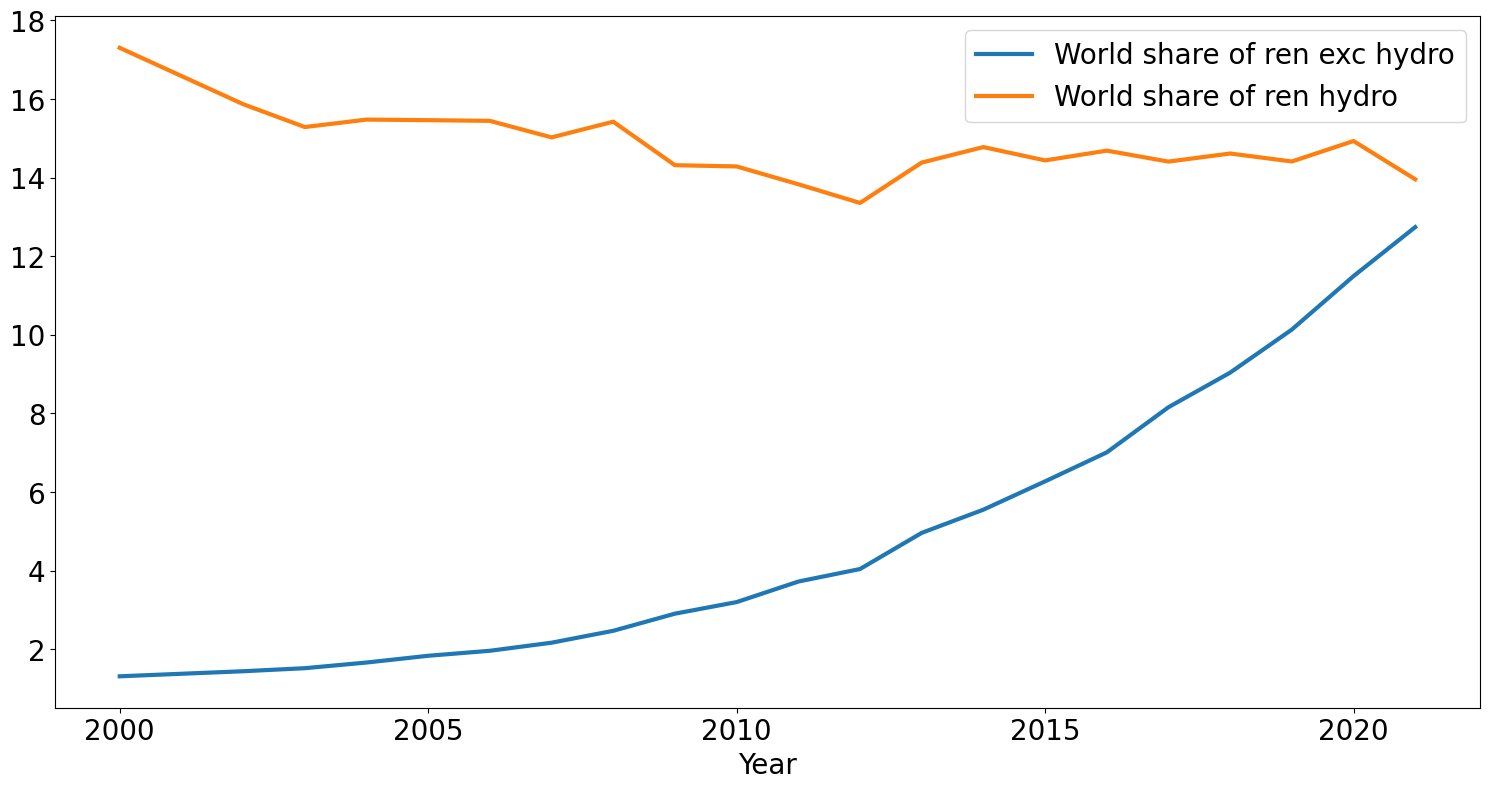

In [80]:
df_h["World share of ren exc hydro"].plot(linewidth=3) 
df_h["World share of ren hydro"].plot(figsize=(15,8),linewidth=3)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20 )
plt.xlabel("Year", fontsize=20)

plt.legend(fontsize=20)    
plt.tight_layout()
plt.savefig('graph1.png')

## 3.1 Descrptive statistics original data <a id="section_3_1"></a>

In [81]:
pd.options.display.precision = 2

In [82]:
df4.columns

Index(['Biogas', 'Coal and peat', 'Fossil fuels n.e.s.', 'Geothermal energy',
       'Liquid biofuels', 'Marine energy', 'Mixed Hydro Plants', 'Natural gas',
       'Nuclear', 'Offshore wind energy', 'Oil', 'Onshore wind energy',
       'Other non-renewable energy', 'Pumped storage', 'Renewable hydropower',
       'Renewable municipal waste', 'Solar photovoltaic',
       'Solar thermal energy', 'Solid biofuels', 'Total elec gen (GWh)',
       'Non-hydro ren_elec', 'Share of non-hydro ren_elec', 'Share of hydro',
       'cent_gov debt as GDP%', 'cred to priv_sector from banks as GDP%',
       'Net FDI as GDP%', 'GDP (current US$)', 'GDP per cap',
       'multilateral financial inflows', 'Population, total', 'reg quality',
       'Financial Markets Index', 'log GDP per cap', 'paris_>2016',
       'Multilateral net inflows as GDP%', 'Non-hydro ren_elec_pc',
       'cred to priv_sector as GDP%_paris_>2016',
       'Financial Markets Index_paris_>2016', 'FDI as GDP%_paris_>2016',
       'ce

In [83]:
sum_stats = df4.describe()[["Share of non-hydro ren_elec",'Non-hydro ren_elec_pc', 'cred to priv_sector from banks as GDP%',
                            'Financial Markets Index','Net FDI as GDP%', 'log GDP per cap','reg quality']]

sum_stats

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2801.00,2.80e+03,2.80e+03,2801.00,2801.00,2801.00,2801.00
mean,5.48,2.04e-01,5.15e+01,0.24,4.85,8.49,0.03
std,9.94,4.83e-01,5.44e+01,0.27,13.17,1.46,0.94
min,0.00,0.00e+00,1.95e-03,0.00,-113.14,5.54,-2.35
25%,0.07,4.73e-04,1.57e+01,0.01,1.17,7.30,-0.66
50%,1.23,8.64e-03,3.52e+01,0.11,2.69,8.42,-0.13
75%,6.16,1.52e-01,6.85e+01,0.43,5.05,9.66,0.70
max,75.93,4.18e+00,5.25e+02,0.99,280.15,11.41,2.25


I calculate the kurtosis and the skewness of each variable

In [84]:
kurtosis = pd.Series()

for x in sum_stats.columns:
    kurtosis[str(x)] = df4[str(x)].kurt()
    
    
kurtosis = kurtosis.to_frame().rename(columns= {0:"kurtosis"}).transpose()

In [85]:
skewness = pd.Series()

for x in sum_stats.columns:
    skewness[str(x)] = df4[str(x)].skew()
    
    
skewness = skewness.to_frame().rename(columns= {0:"skewness"}).transpose()

In [86]:
sum_stats = pd.concat([sum_stats, kurtosis, skewness])

sum_stats.to_csv('Table1.csv')

sum_stats

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2801.00,2.80e+03,2.80e+03,2801.00,2801.00,2801.00,2801.00
mean,5.48,2.04e-01,5.15e+01,0.24,4.85,8.49,0.03
std,9.94,4.83e-01,5.44e+01,0.27,13.17,1.46,0.94
min,0.00,0.00e+00,1.95e-03,0.00,-113.14,5.54,-2.35
25%,0.07,4.73e-04,1.57e+01,0.01,1.17,7.30,-0.66
50%,1.23,8.64e-03,3.52e+01,0.11,2.69,8.42,-0.13
75%,6.16,1.52e-01,6.85e+01,0.43,5.05,9.66,0.70
max,75.93,4.18e+00,5.25e+02,0.99,280.15,11.41,2.25
kurtosis,11.05,1.71e+01,2.06e+01,-0.45,176.34,-1.00,-0.68
skewness,3.02,3.79e+00,3.46e+00,0.91,10.30,0.08,0.29


Next, I present the mean of each variable through years

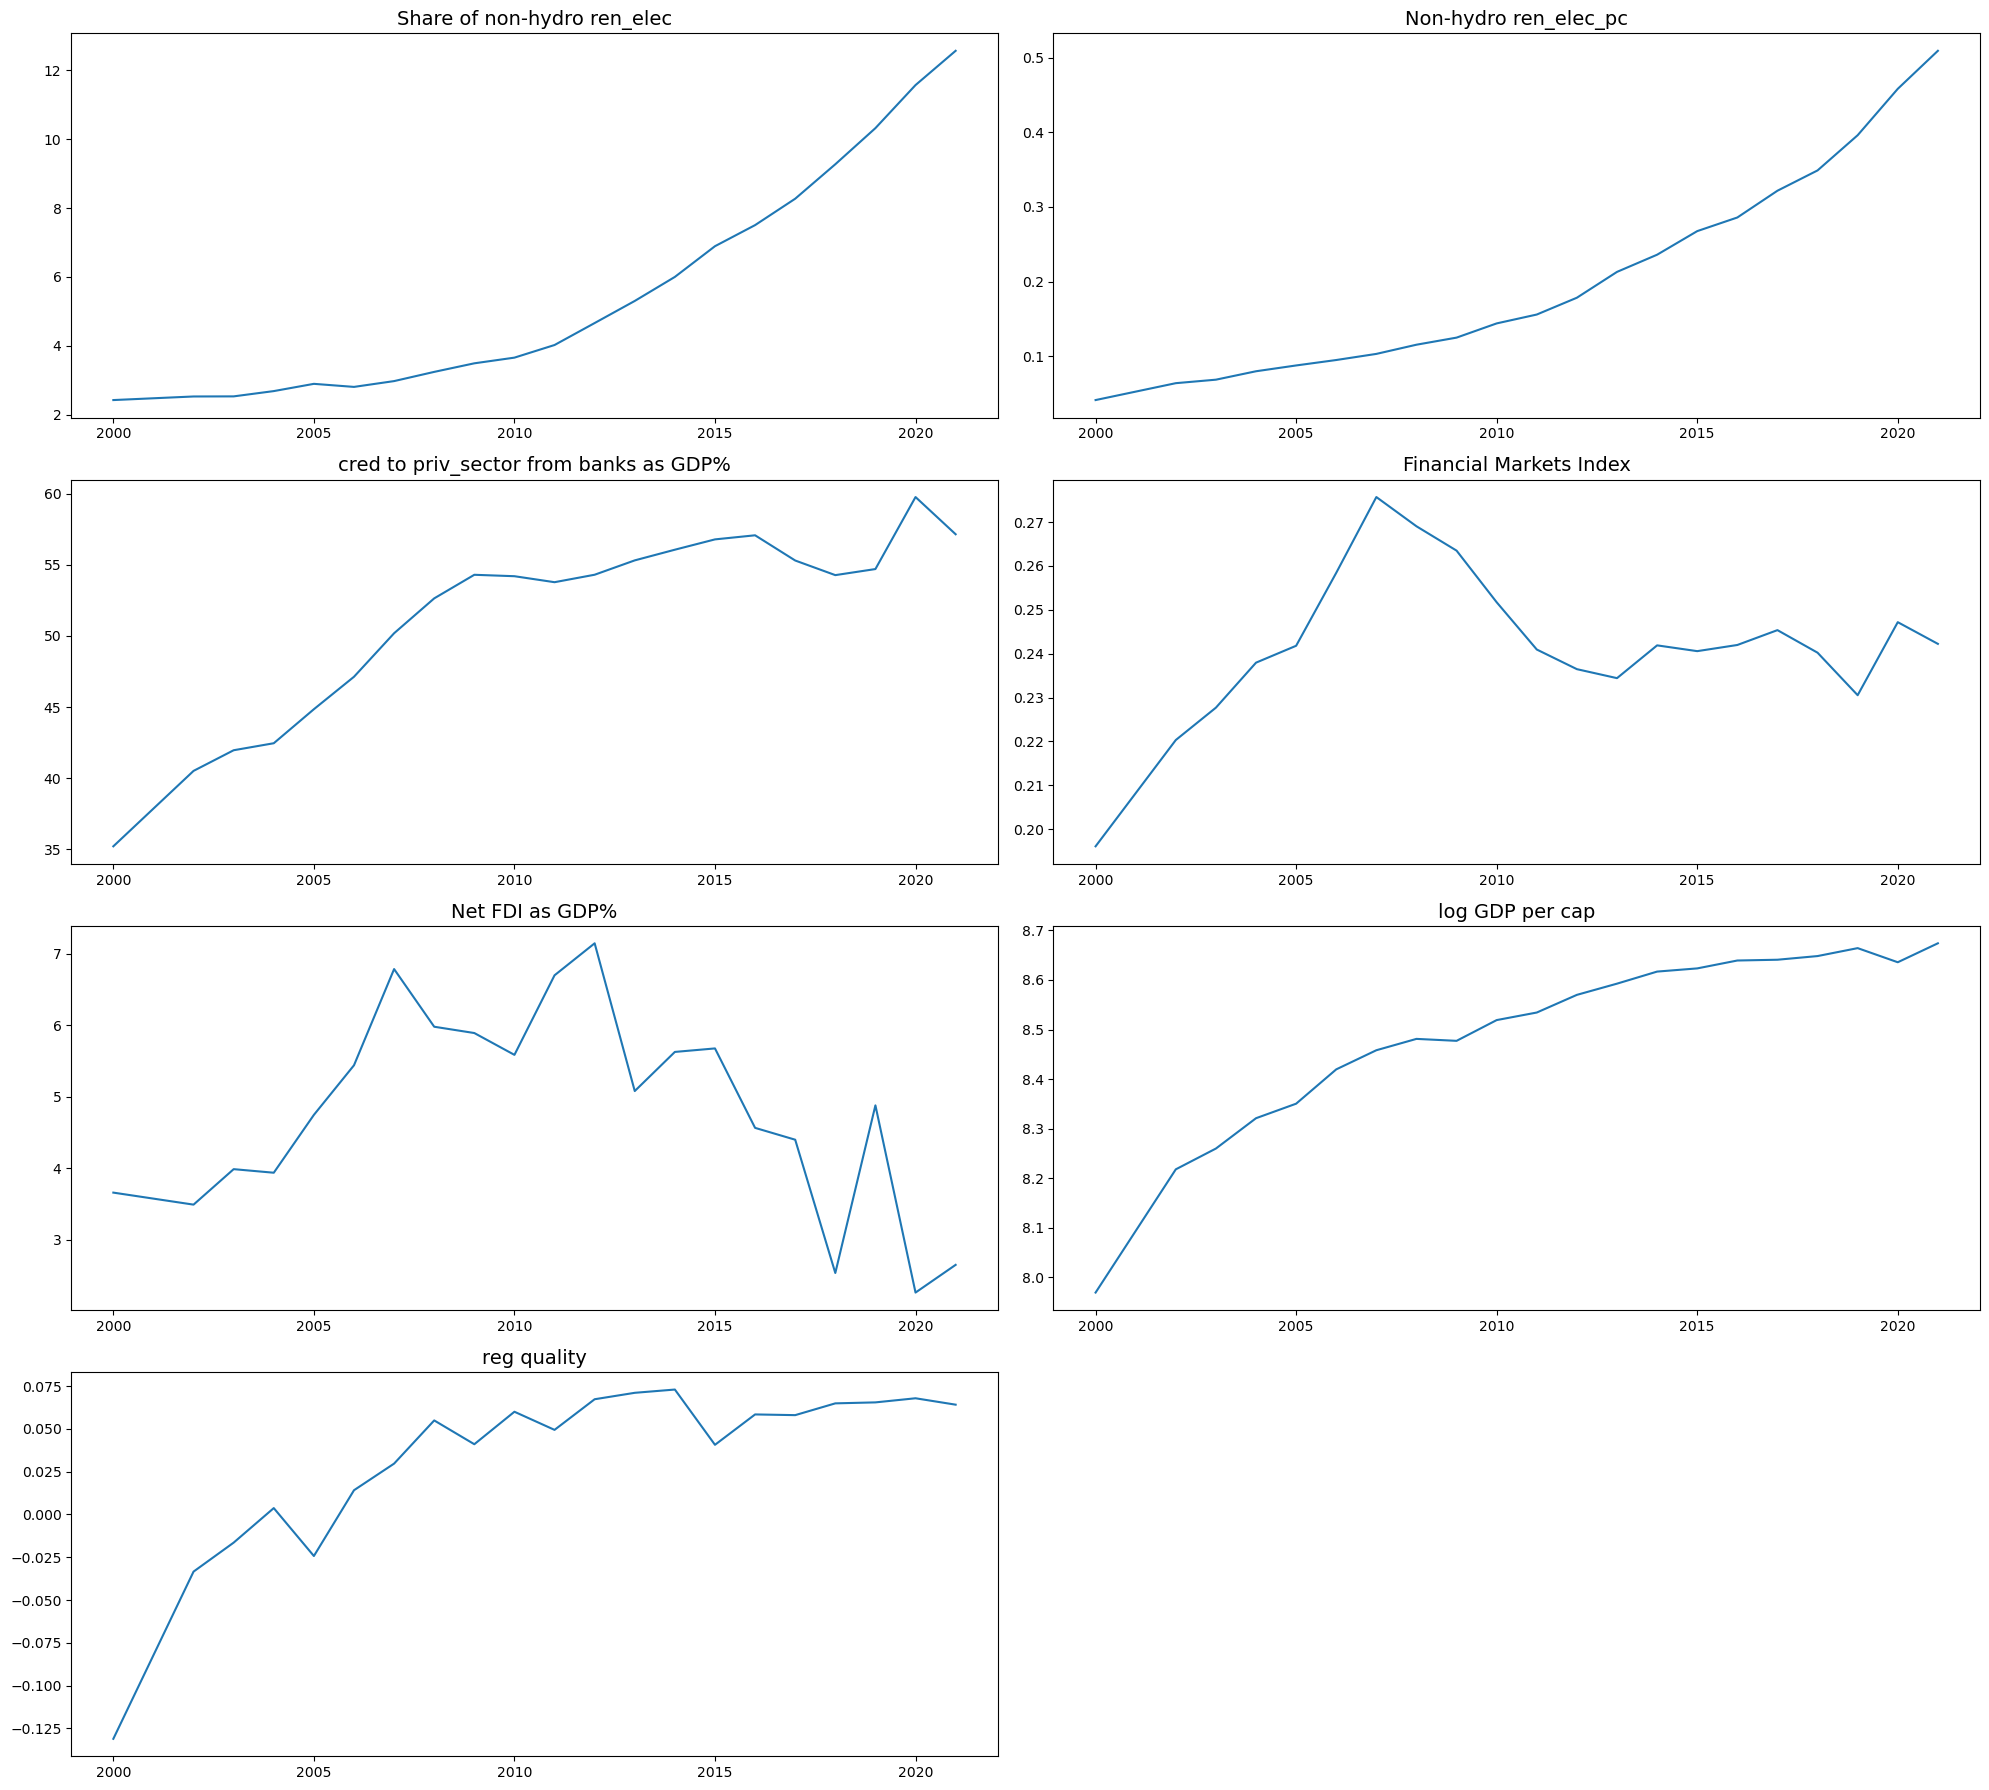

In [87]:
fig, axs = plt.subplots(4,2, figsize=(20, 18))

for x in sum_stats.columns:
    a = math.floor(sum_stats.columns.get_loc(x)/2)
    b = sum_stats.columns.get_loc(x)%2
    
    axs[a,b].plot(df4.pivot_table(values= x,  index = "Year", aggfunc= "mean")[x])
    axs[a,b].set_title(x, fontsize = 14)
    
    axs[3, 1].axis("off")
    
fig.tight_layout()
plt.savefig('graph2.png')

Now, I calculate the Jarque-Bera test for normality

In [88]:
norm = pd.DataFrame()

for x in sum_stats.columns:
    norm[x] = stats.jarque_bera(df4[x].dropna())

norm.index = ["Statistic", "p-value"]

norm.to_csv('Table2.csv')

norm

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
Statistic,18443.28,40535.09,54831.79,4.12e+02,3.67e+06,1.20e+02,9.43e+01
p-value,0.00,0.00,0.00,3.29e-90,0.00e+00,9.41e-27,3.28e-21


Next, I obtain the kernell density plots of the different variables

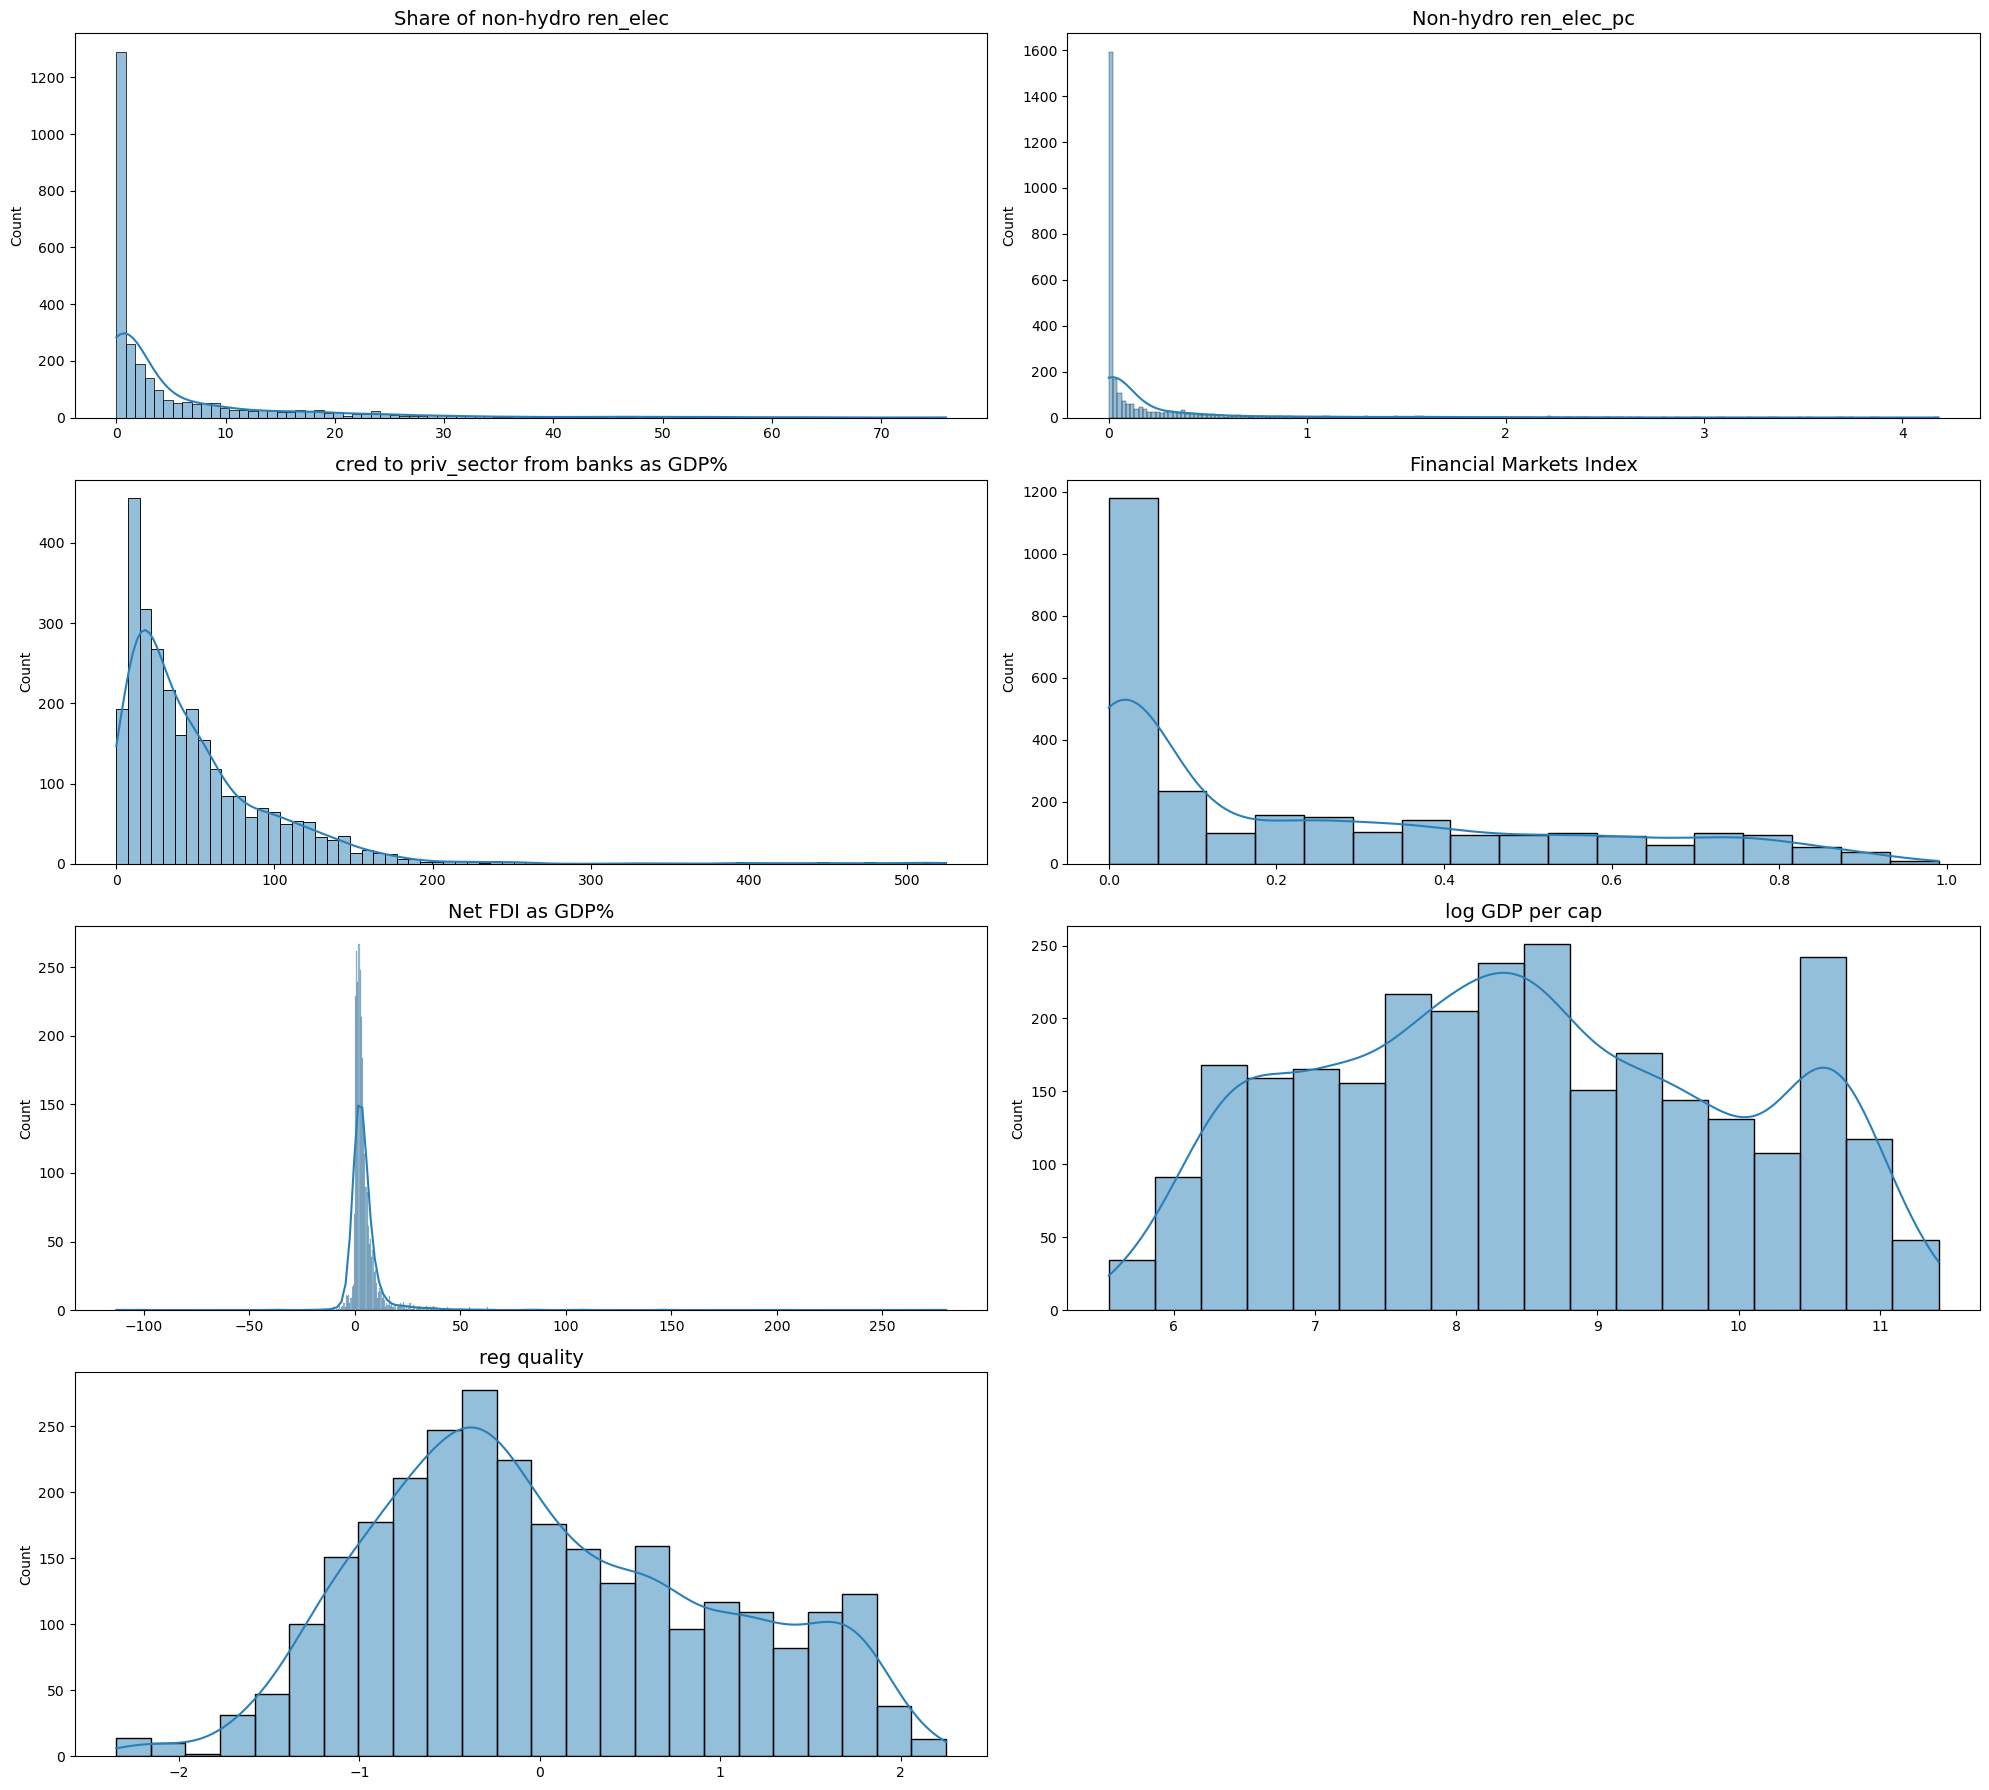

In [89]:
fig, axs = plt.subplots(4,2, figsize=(20, 18))

for x in sum_stats.columns:
    a = math.floor(sum_stats.columns.get_loc(x)/2)
    b = sum_stats.columns.get_loc(x)%2
    
    sns.histplot(df4[x], kde = True, color = "#2980b9", ax=axs[a,b])
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[3, 1].axis("off")
    
fig.tight_layout()
plt.savefig('graph3.png')

Next, I present the correlation between variables

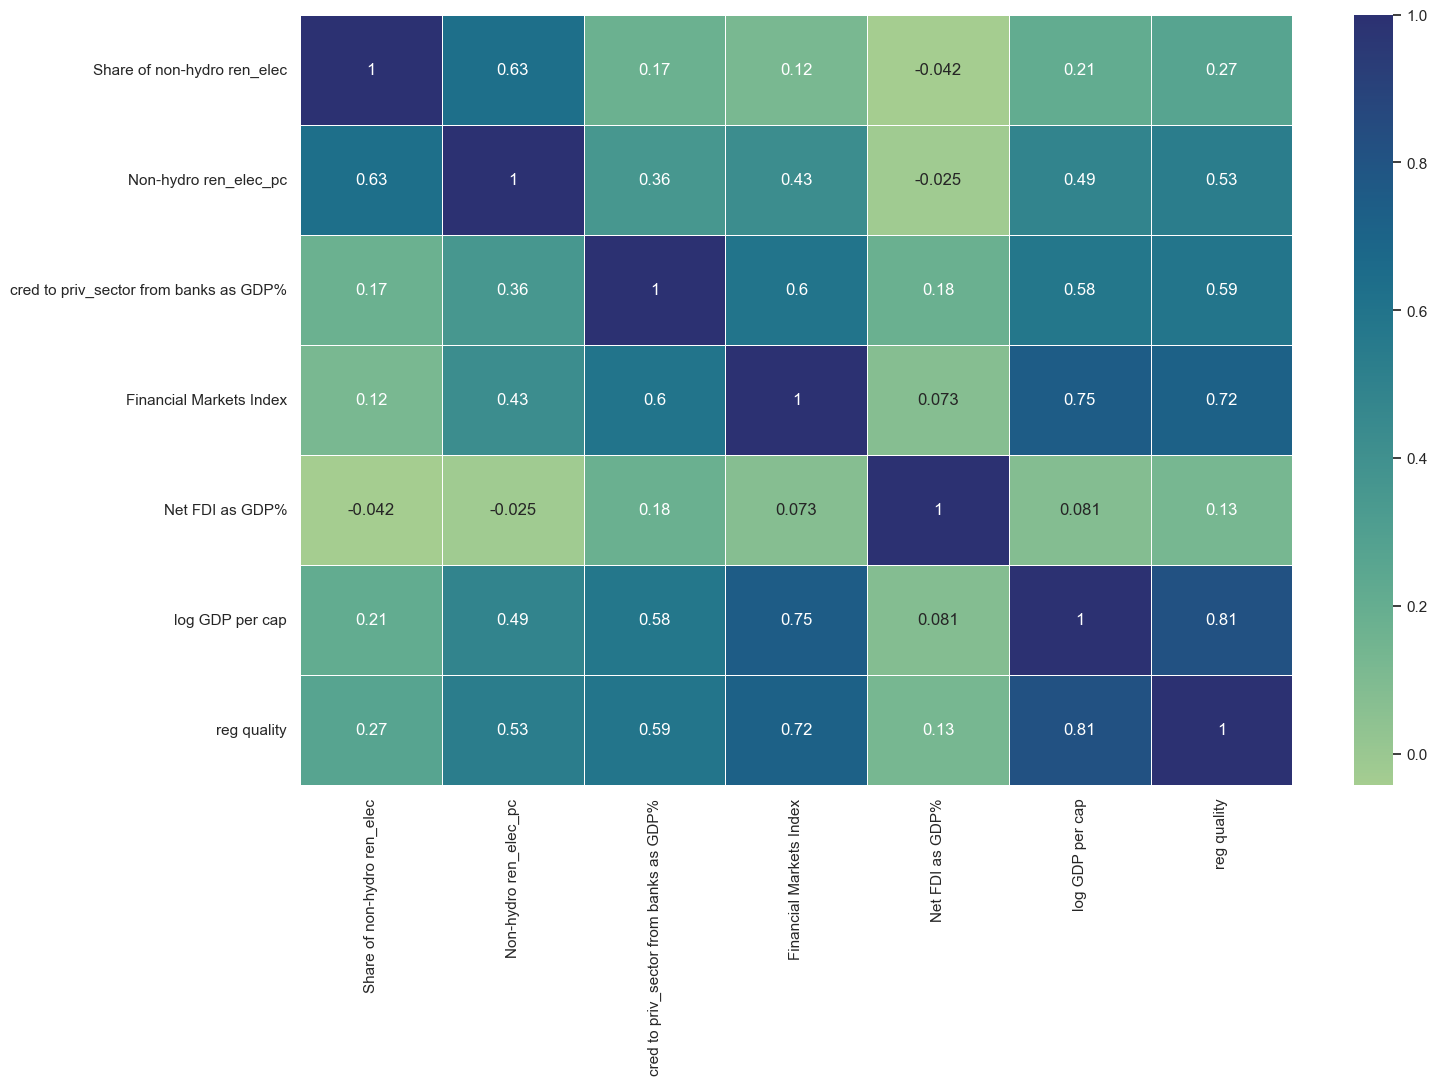

In [90]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.heatmap(df4[norm.columns].corr(), annot=True, linewidth=.5, cmap="crest")
plt.savefig('graph4.png')

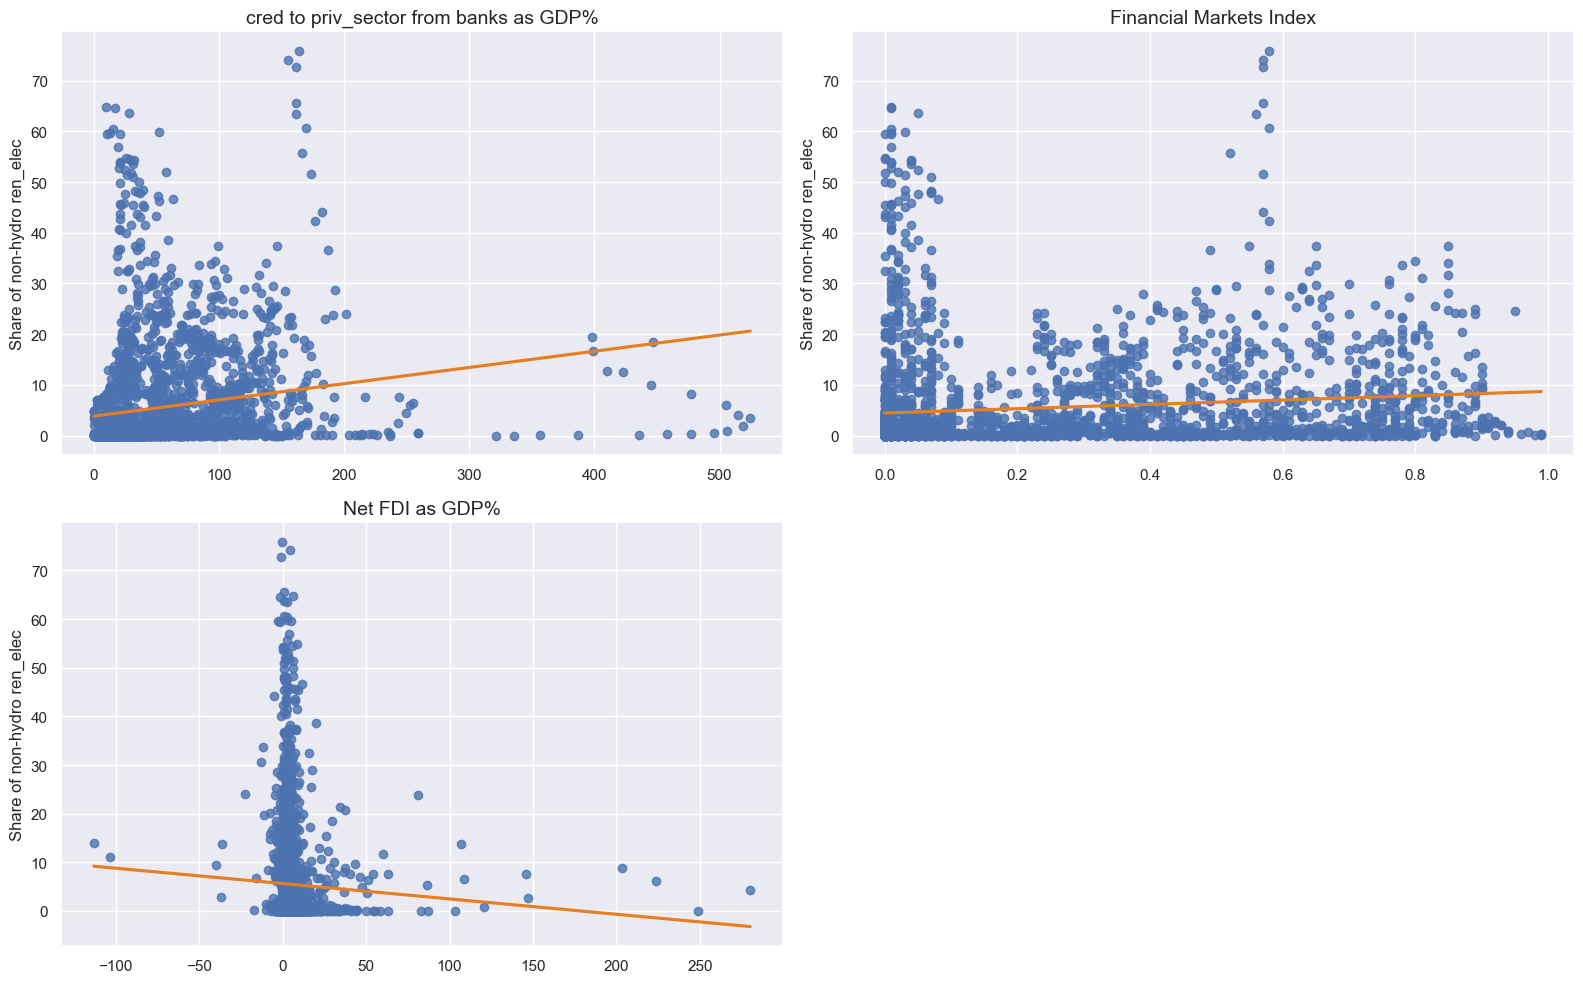

In [91]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df4[x], y = df4["Share of non-hydro ren_elec"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph5.png')

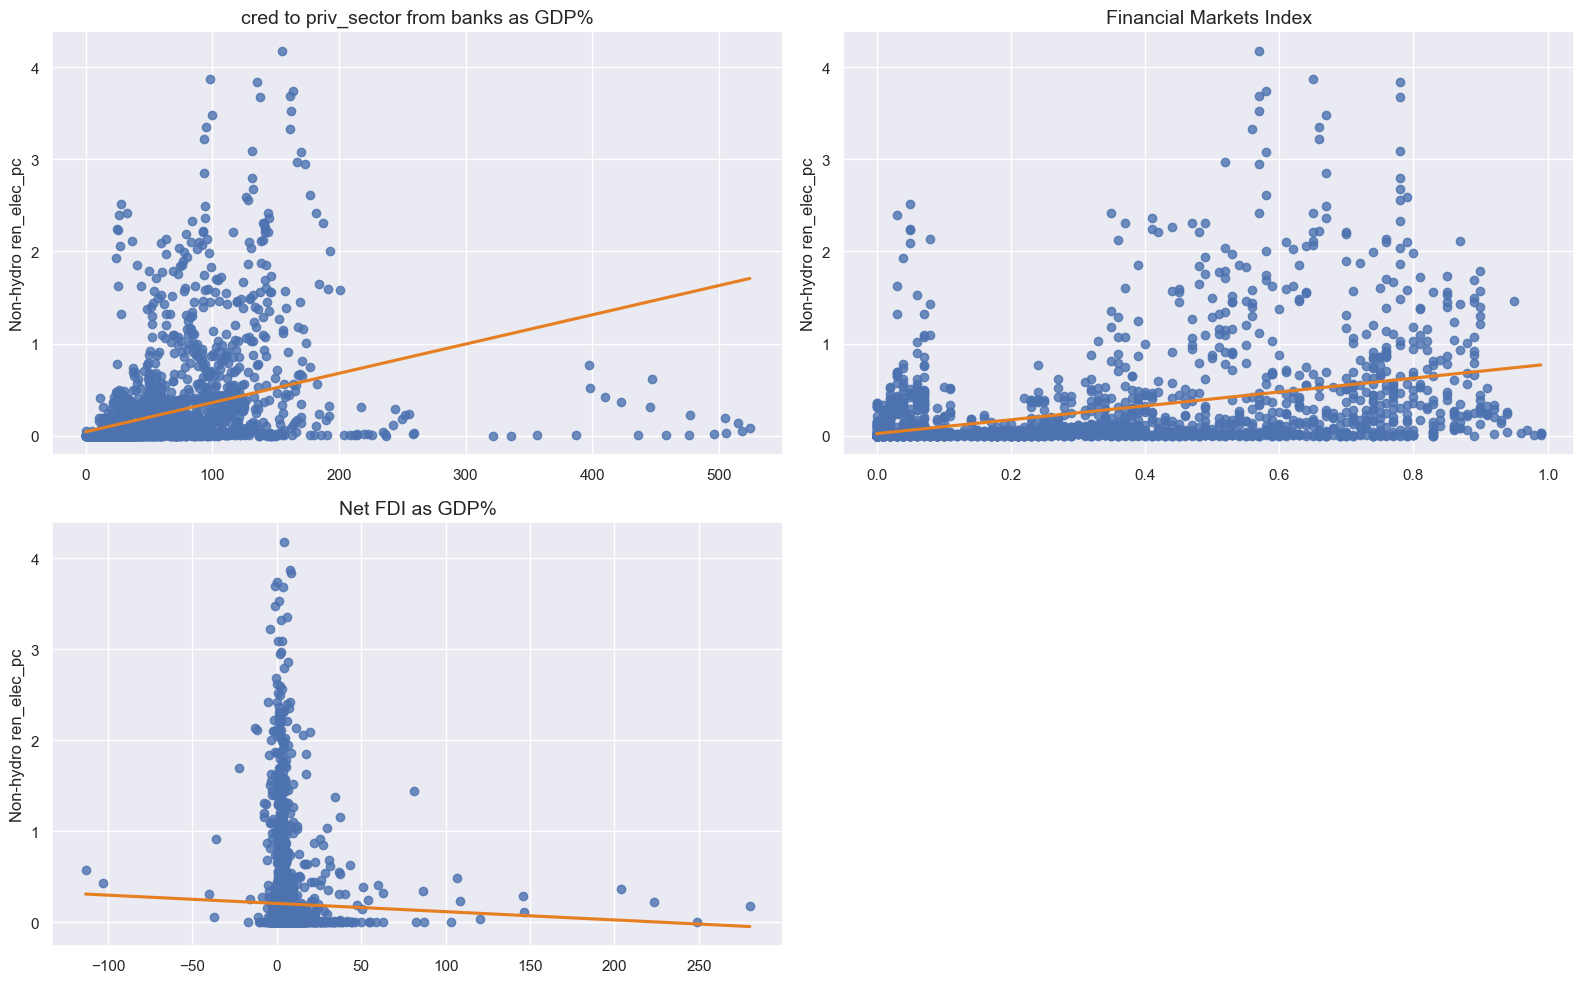

In [92]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df4[x], y = df4["Non-hydro ren_elec_pc"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph6.png')

## 3.2 Descriptive statistics first difference transformation <a id="section_3_2"></a>

In [93]:
sum_stats_diff = df_diff.describe()[sum_stats.columns]

sum_stats_diff 

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2.66e+03,2.66e+03,2656.00,2.66e+03,2656.00,2.66e+03,2.66e+03
mean,4.80e-01,2.11e-02,0.93,7.68e-04,-0.07,2.11e-02,2.69e-04
std,1.78e+00,6.40e-02,6.52,3.76e-02,12.22,5.02e-02,1.16e-01
min,-1.22e+01,-3.61e-01,-88.85,-3.00e-01,-306.78,-6.52e-01,-1.06e+00
25%,-1.74e-04,0.00e+00,-1.06,0.00e+00,-1.01,3.87e-03,-6.24e-02
50%,2.79e-02,2.78e-04,0.67,0.00e+00,-0.01,2.35e-02,7.40e-04
75%,4.80e-01,1.37e-02,2.61,1.00e-02,1.02,4.38e-02,6.11e-02
max,3.49e+01,8.15e-01,84.54,3.60e-01,207.98,6.78e-01,6.28e-01


I calculate the kurtosis and the skewness of each variable

In [94]:
kurtosis_diff = pd.Series()

for x in sum_stats.columns:
    kurtosis_diff[str(x)] = df_diff[str(x)].kurt()
    
    
kurtosis_diff = kurtosis_diff.to_frame().rename(columns= {0:"kurtosis"}).transpose()

In [95]:
skewness_diff = pd.Series()

for x in sum_stats.columns:
    skewness_diff[str(x)] = df_diff[str(x)].skew()
    
    
skewness_diff = skewness_diff.to_frame().rename(columns= {0:"skewness"}).transpose()

In [96]:
sum_stats_diff = pd.concat([sum_stats_diff, kurtosis_diff, skewness_diff])

sum_stats_diff.to_csv('summary_stats_diff.csv')

sum_stats_diff

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2.66e+03,2.66e+03,2656.00,2.66e+03,2656.00,2.66e+03,2.66e+03
mean,4.80e-01,2.11e-02,0.93,7.68e-04,-0.07,2.11e-02,2.69e-04
std,1.78e+00,6.40e-02,6.52,3.76e-02,12.22,5.02e-02,1.16e-01
min,-1.22e+01,-3.61e-01,-88.85,-3.00e-01,-306.78,-6.52e-01,-1.06e+00
25%,-1.74e-04,0.00e+00,-1.06,0.00e+00,-1.01,3.87e-03,-6.24e-02
50%,2.79e-02,2.78e-04,0.67,0.00e+00,-0.01,2.35e-02,7.40e-04
75%,4.80e-01,1.37e-02,2.61,1.00e-02,1.02,4.38e-02,6.11e-02
max,3.49e+01,8.15e-01,84.54,3.60e-01,207.98,6.78e-01,6.28e-01
kurtosis,7.04e+01,2.91e+01,45.56,1.68e+01,245.27,3.13e+01,4.62e+00
skewness,4.67e+00,4.08e+00,-0.47,-4.99e-01,-3.25,-9.88e-01,-1.86e-01


Now, I calculate the Jarque-Bera test for normality

In [97]:
norm_diff = pd.DataFrame()

for x in sum_stats.columns:
    norm_diff[x] = stats.jarque_bera(df_diff[x].dropna())

norm_diff.index = ["Statistic", "p-value"]

norm_diff.to_csv('jarquebera_diff.csv')

norm_diff

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
Statistic,556784.45,100416.23,228952.51,31143.2,6.64e+06,108376.48,2363.62
p-value,0.00,0.00,0.00,0.0,0.00e+00,0.00,0.00


Next, I obtain the kernell density plots of the different variables

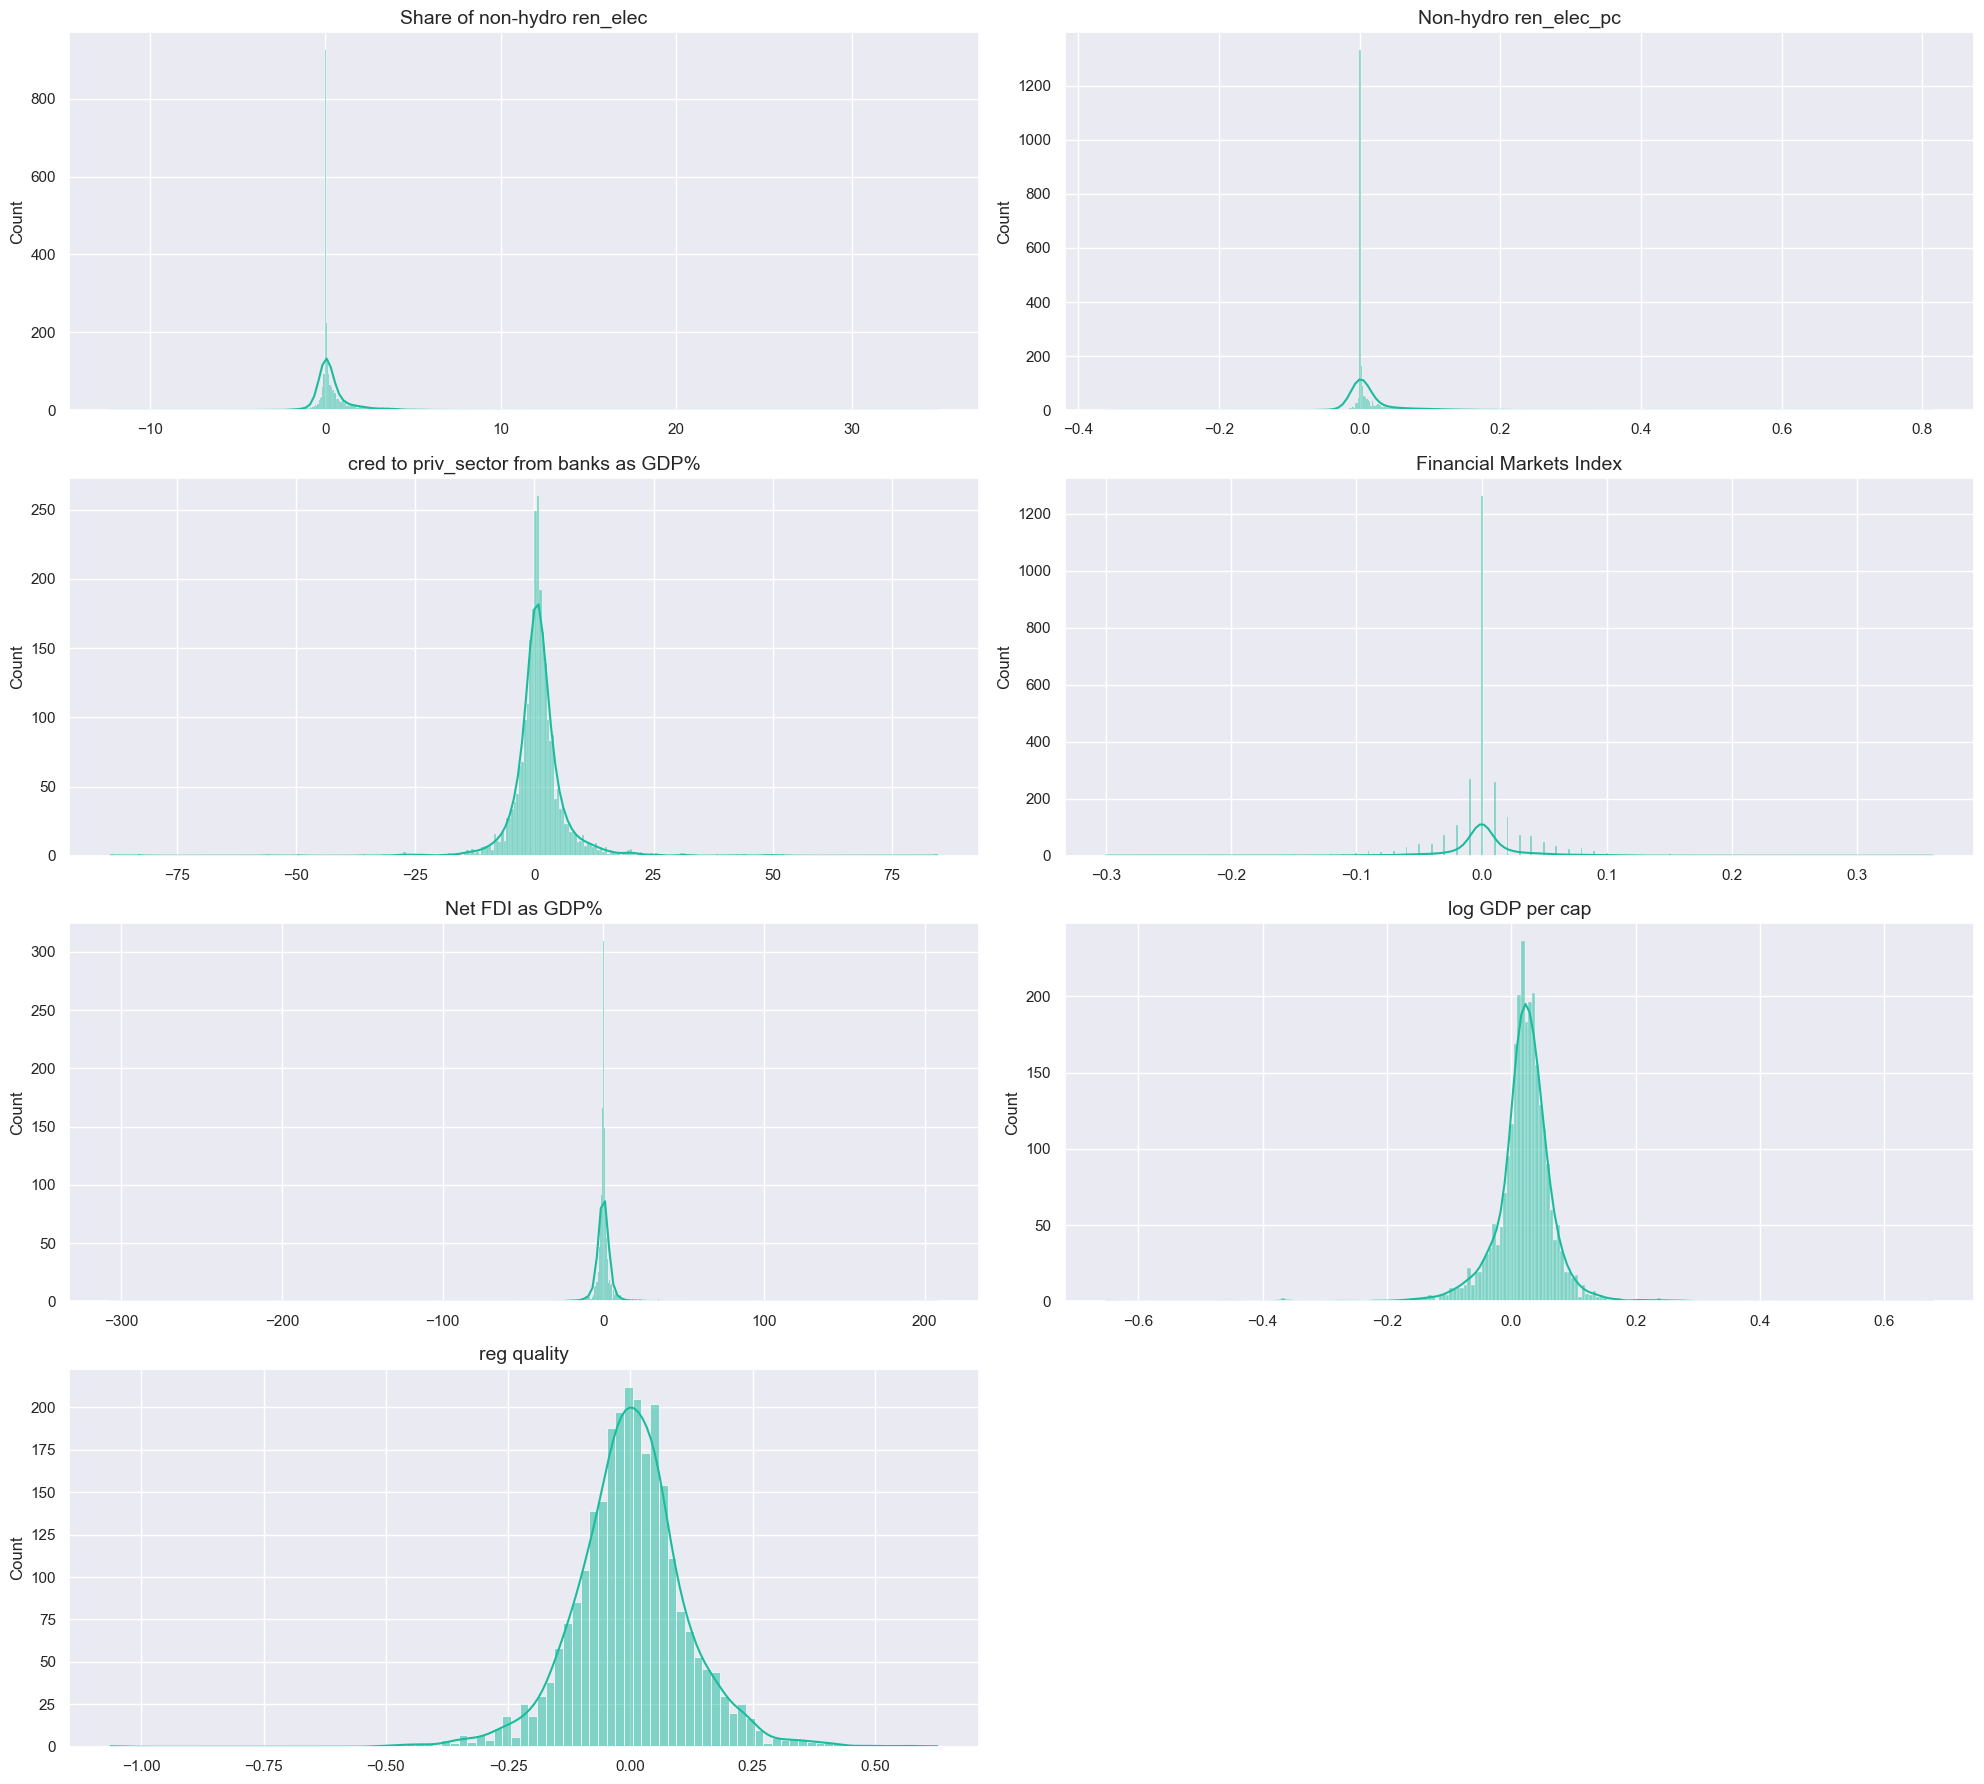

In [98]:
fig, axs = plt.subplots(4,2, figsize=(20, 18))

for x in sum_stats.columns:
    a = math.floor(sum_stats.columns.get_loc(x)/2)
    b = sum_stats.columns.get_loc(x)%2
    
    sns.histplot(df_diff[x], kde = True, color = "#1abc9c", ax=axs[a,b])
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[3, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph a1.png')

Next, I present the correlation between variables

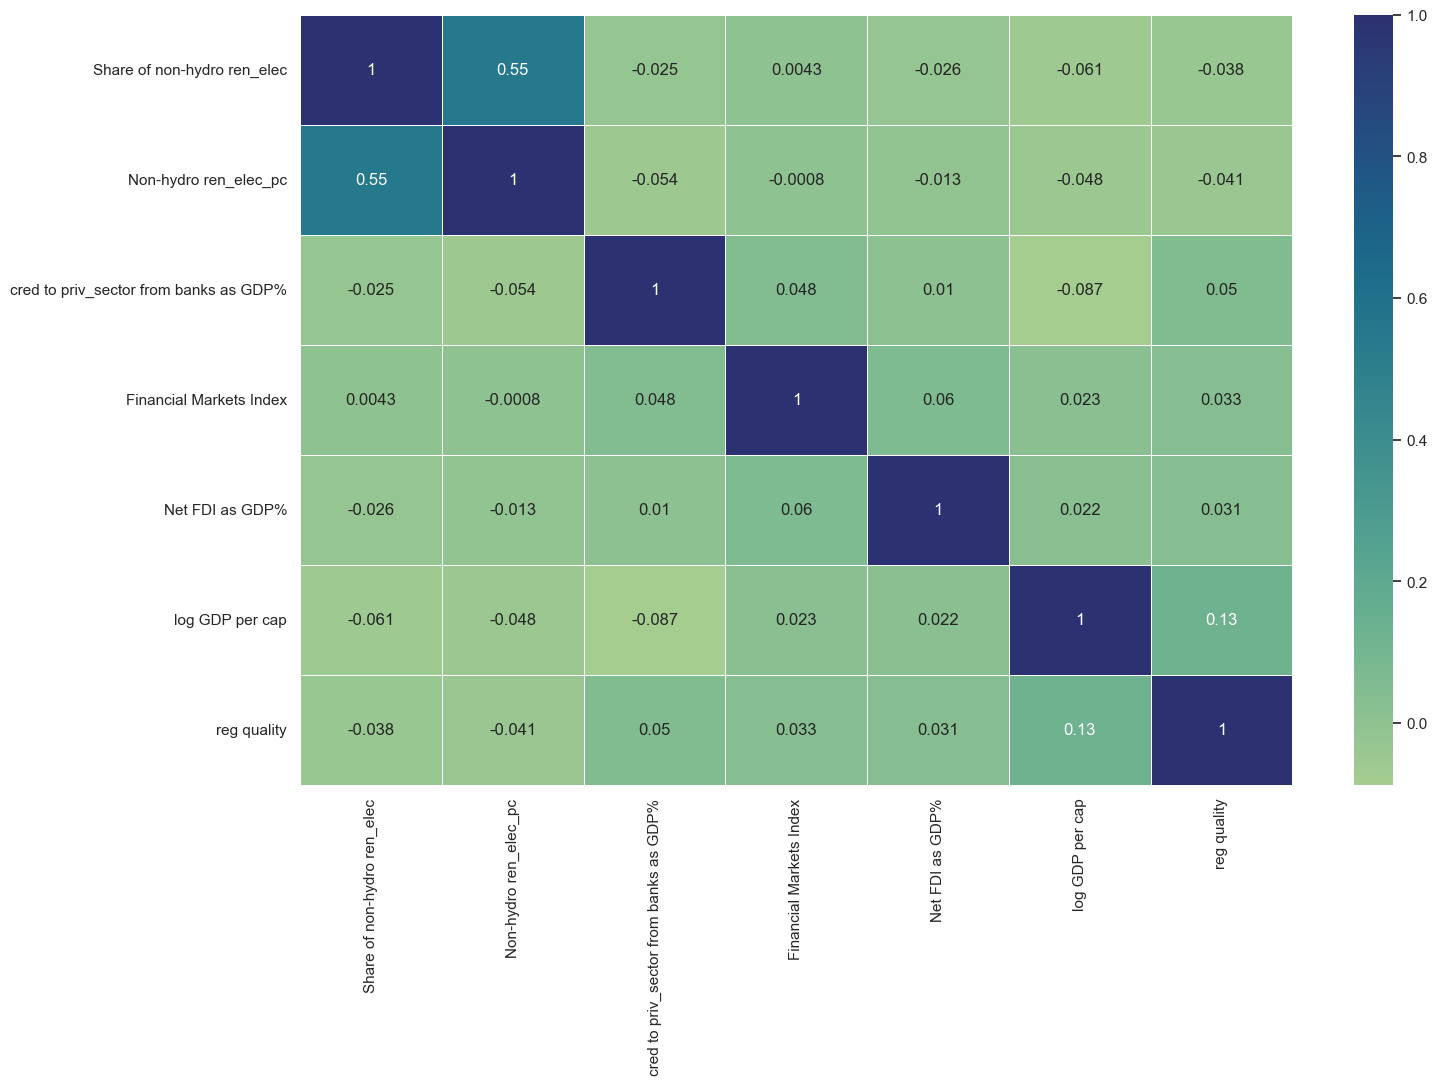

In [99]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.heatmap(df_diff[norm.columns].corr(), annot=True, linewidth=.5, cmap="crest")
plt.savefig('graph a2.png')

Finally, I present a scatter plot with some of the key variables of interest

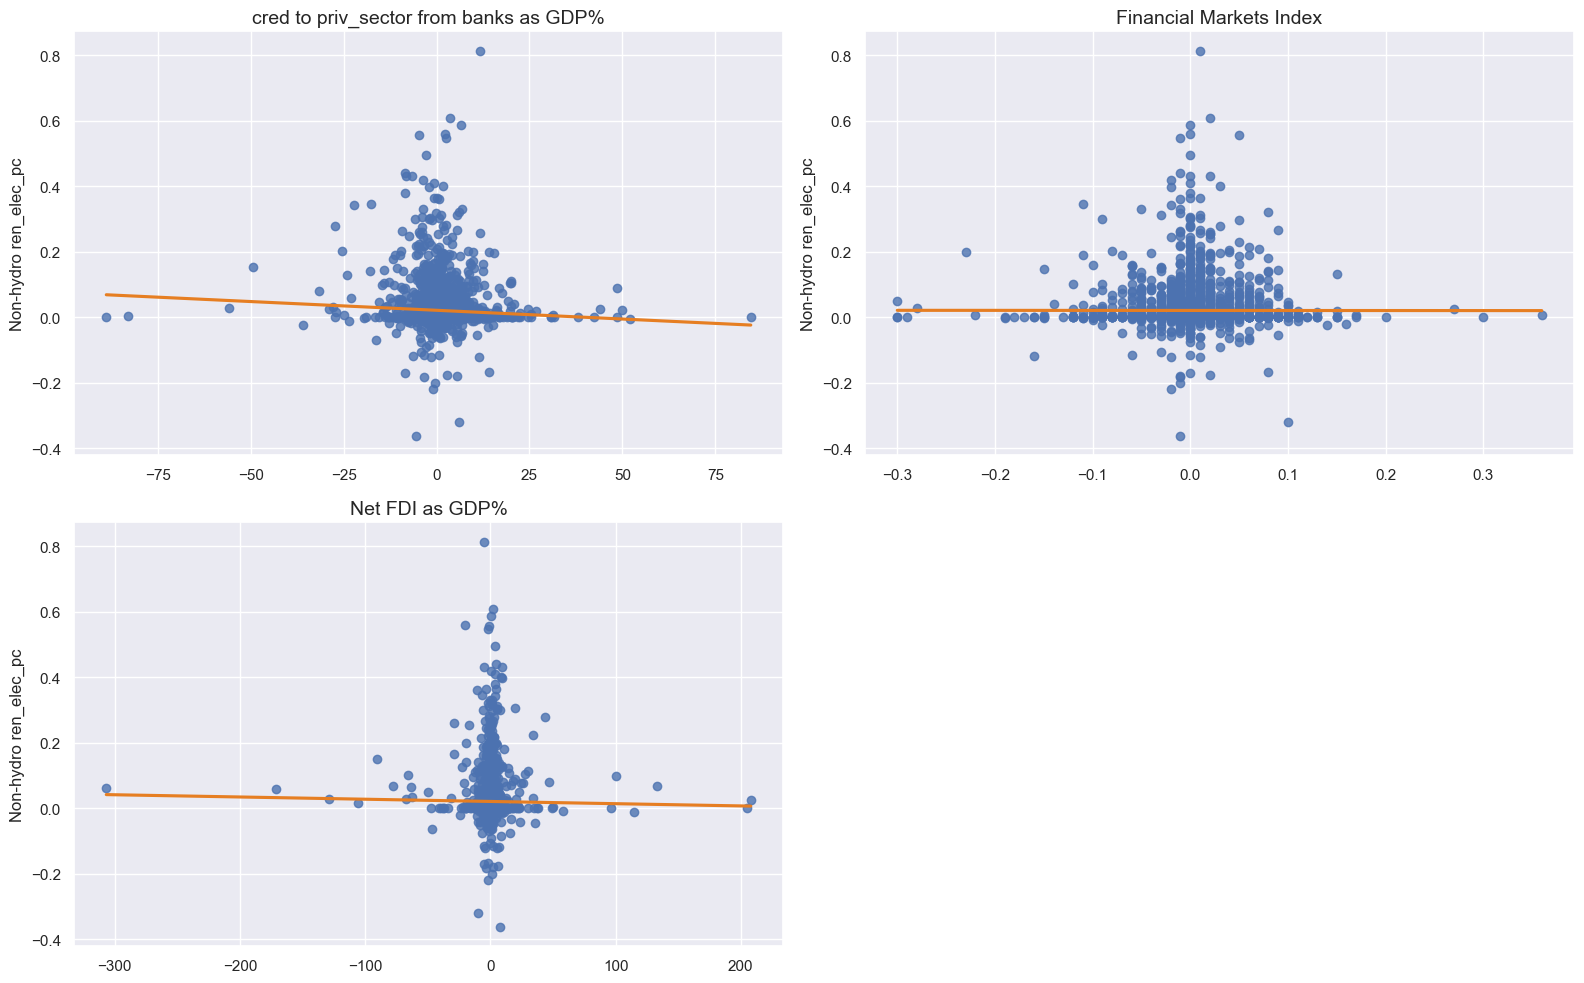

In [100]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df_diff[x], y = df_diff["Non-hydro ren_elec_pc"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph a3.png')

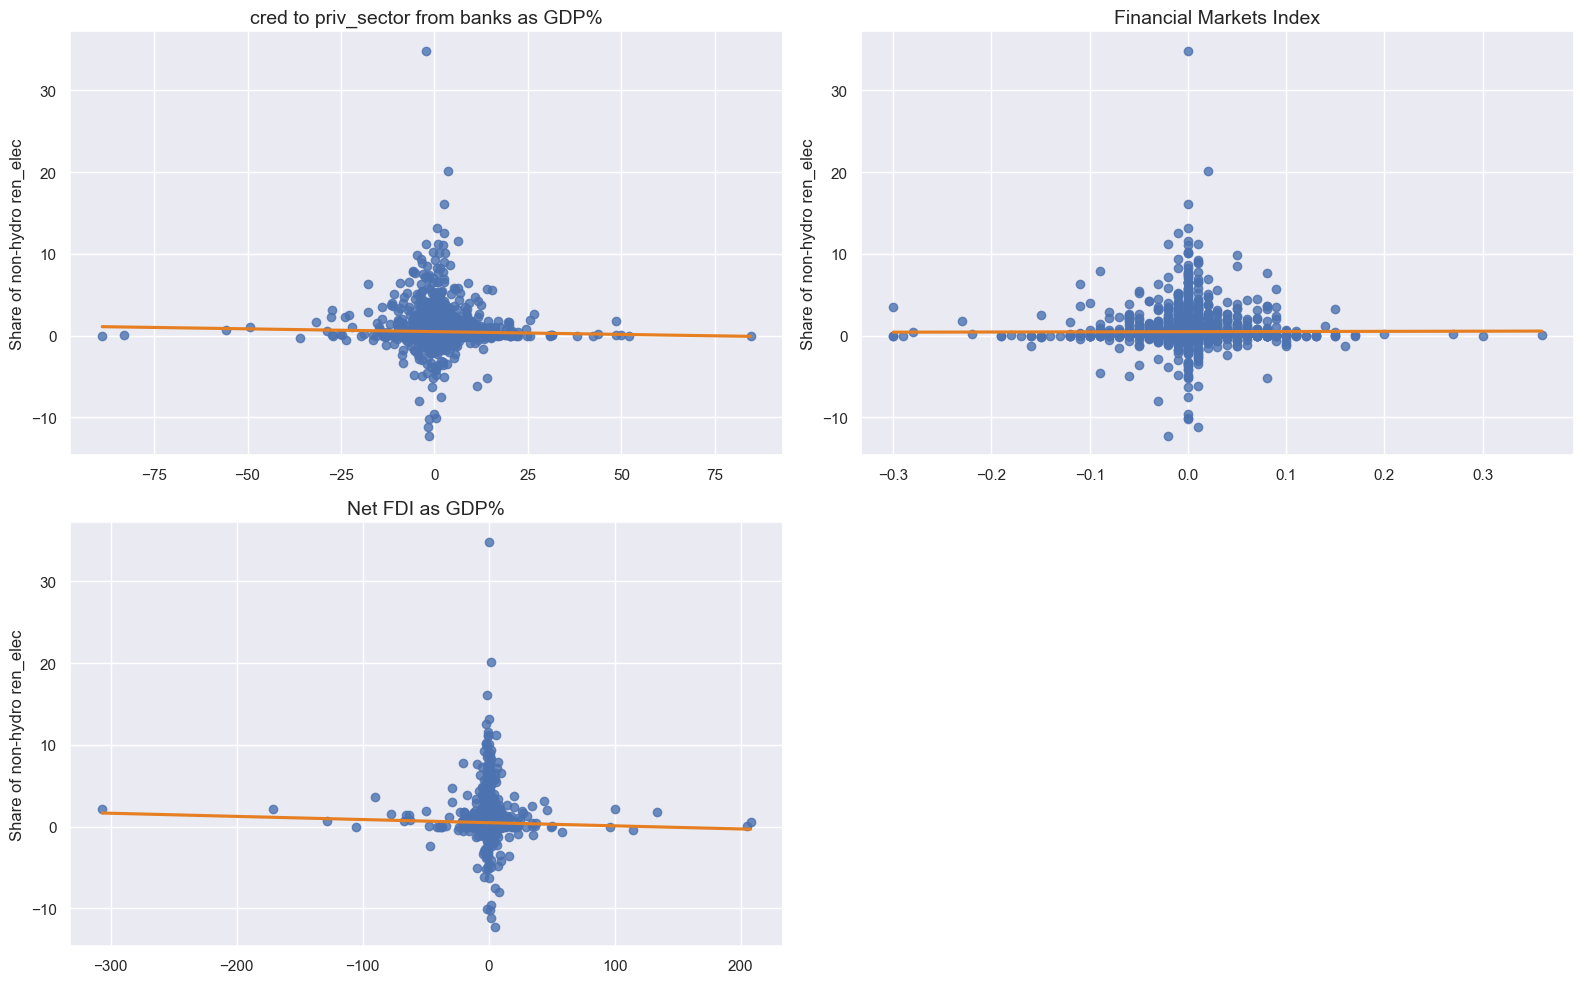

In [101]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df_diff[x], y = df_diff["Share of non-hydro ren_elec"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph a4.png')

## 3.3 Descriptive statistics one-way within transformation <a id="section_3_3"></a>

In [102]:
sum_stats_one_within = df_one_within.describe()[sum_stats.columns]

sum_stats_one_within

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03
mean,-9.13e-17,-2.82e-18,-9.11e-16,-1.25e-18,6.72e-17,1.78e-16,-1.03e-17
std,5.33e+00,2.52e-01,1.50e+01,5.15e-02,1.08e+01,1.76e-01,1.89e-01
min,-2.74e+01,-1.48e+00,-1.95e+02,-2.80e-01,-1.89e+02,-9.97e-01,-1.13e+00
25%,-1.34e+00,-2.37e-02,-5.24e+00,-1.29e-02,-1.32e+00,-7.98e-02,-1.04e-01
50%,-1.17e-01,-6.23e-04,-9.84e-02,0.00e+00,-2.21e-01,9.09e-03,3.39e-03
75%,4.88e-01,3.45e-03,5.26e+00,1.00e-02,9.54e-01,9.90e-02,1.09e-01
max,4.32e+01,2.02e+00,1.15e+02,2.58e-01,2.04e+02,6.92e-01,1.06e+00


I calculate the kurtosis and the skewness of each variable

In [103]:
kurtosis_one_within = pd.Series()

for x in sum_stats.columns:
    kurtosis_one_within[str(x)] = df_one_within[str(x)].kurt()
    
    
kurtosis_one_within = kurtosis_one_within.to_frame().rename(columns= {0:"kurtosis"}).transpose()

In [104]:
skewness_one_within = pd.Series()

for x in sum_stats.columns:
    skewness_one_within[str(x)] = df_one_within[str(x)].skew()
    
    
skewness_one_within = skewness_one_within.to_frame().rename(columns= {0:"skewness"}).transpose()

In [105]:
sum_stats_one_within = pd.concat([sum_stats_one_within, kurtosis_one_within, skewness_one_within])

sum_stats_one_within.to_csv('summary_stats_one_within.csv')

sum_stats_one_within

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03
mean,-9.13e-17,-2.82e-18,-9.11e-16,-1.25e-18,6.72e-17,1.78e-16,-1.03e-17
std,5.33e+00,2.52e-01,1.50e+01,5.15e-02,1.08e+01,1.76e-01,1.89e-01
min,-2.74e+01,-1.48e+00,-1.95e+02,-2.80e-01,-1.89e+02,-9.97e-01,-1.13e+00
25%,-1.34e+00,-2.37e-02,-5.24e+00,-1.29e-02,-1.32e+00,-7.98e-02,-1.04e-01
50%,-1.17e-01,-6.23e-04,-9.84e-02,0.00e+00,-2.21e-01,9.09e-03,3.39e-03
75%,4.88e-01,3.45e-03,5.26e+00,1.00e-02,9.54e-01,9.90e-02,1.09e-01
max,4.32e+01,2.02e+00,1.15e+02,2.58e-01,2.04e+02,6.92e-01,1.06e+00
kurtosis,9.86e+00,1.39e+01,1.90e+01,4.85e+00,1.55e+02,2.61e+00,3.18e+00
skewness,1.25e+00,1.37e+00,-5.07e-01,-7.09e-02,2.03e+00,-6.55e-01,-1.81e-01


Now, I calculate the Jarque-Bera test for normality

In [106]:
norm_one_within = pd.DataFrame()

for x in sum_stats.columns:
    norm_one_within[x] = stats.jarque_bera(df_one_within[x].dropna())

norm_one_within.index = ["Statistic", "p-value"]

norm_one_within.to_csv('jarquebera_one_within.csv')

norm_one_within

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
Statistic,12028.44,23461.15,42106.13,2738.3,2.81e+06,9.93e+02,1.19e+03
p-value,0.00,0.00,0.00,0.0,0.00e+00,2.61e-216,1.00e-259


Next, I obtain the kernell density plots of the different variables

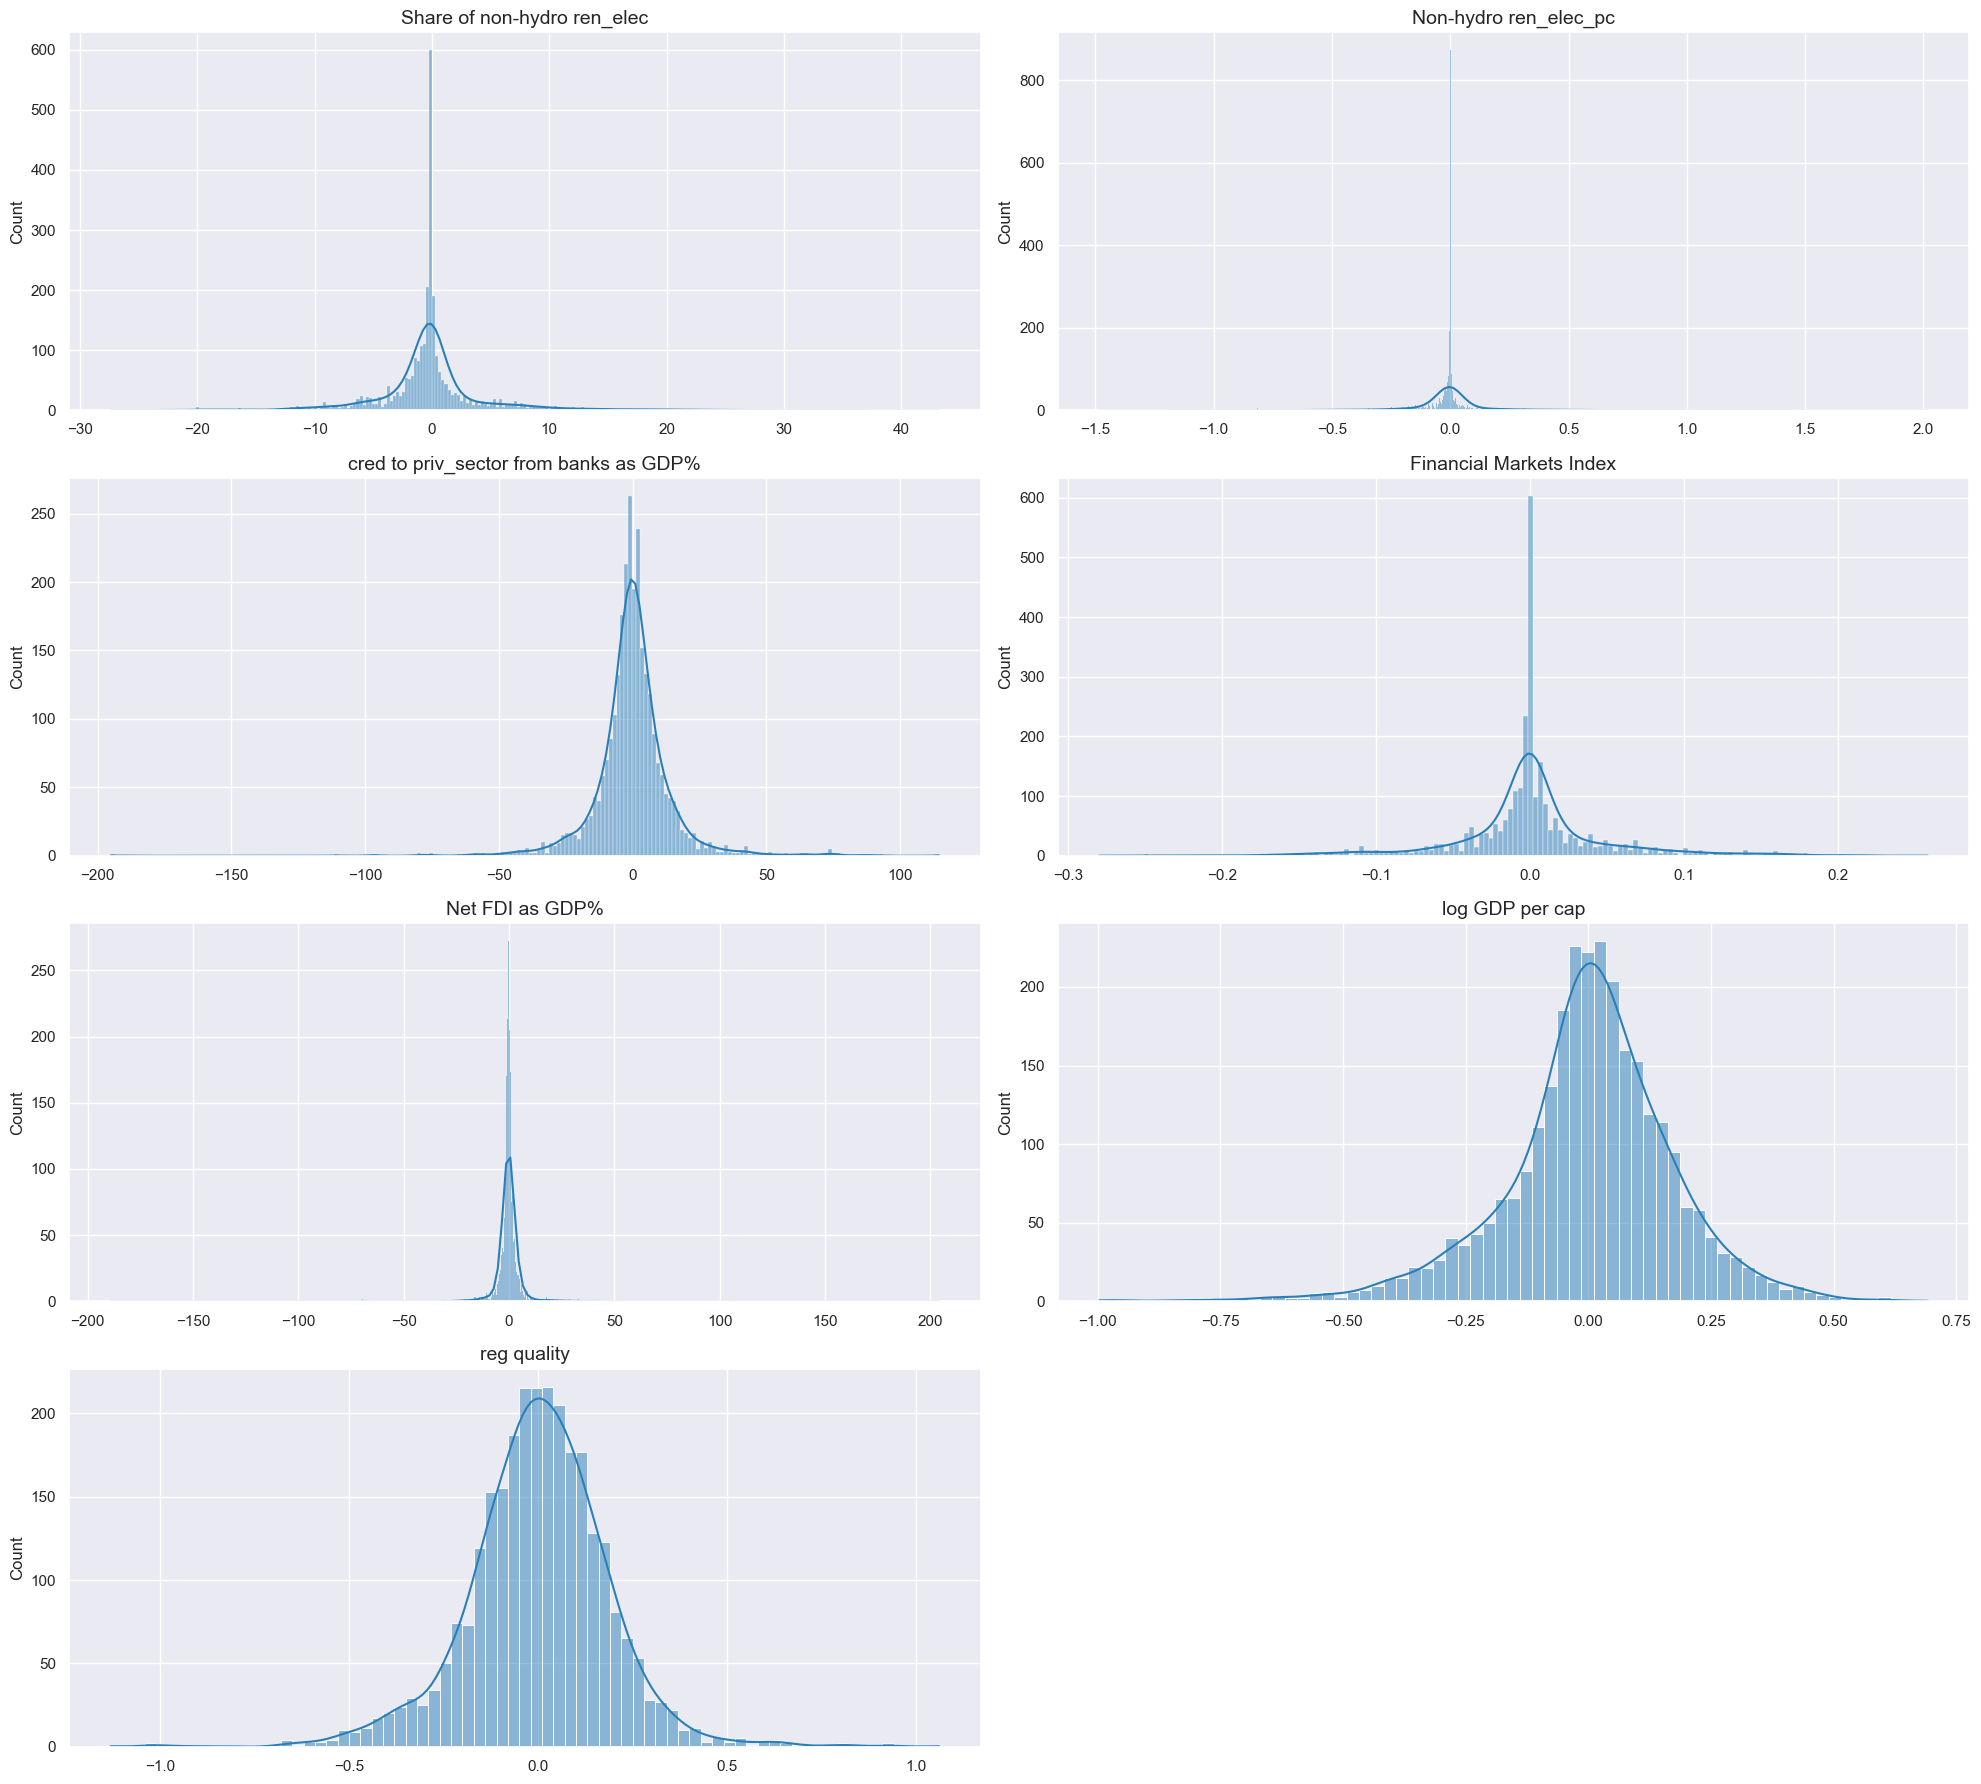

In [107]:
fig, axs = plt.subplots(4,2, figsize=(20, 18))

for x in sum_stats.columns:
    a = math.floor(sum_stats.columns.get_loc(x)/2)
    b = sum_stats.columns.get_loc(x)%2
    
    sns.histplot(df_one_within[x], kde = True, color = "#2980b9", ax=axs[a,b])
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[3, 1].axis("off")
    
fig.tight_layout()
plt.savefig('graph b1.png')

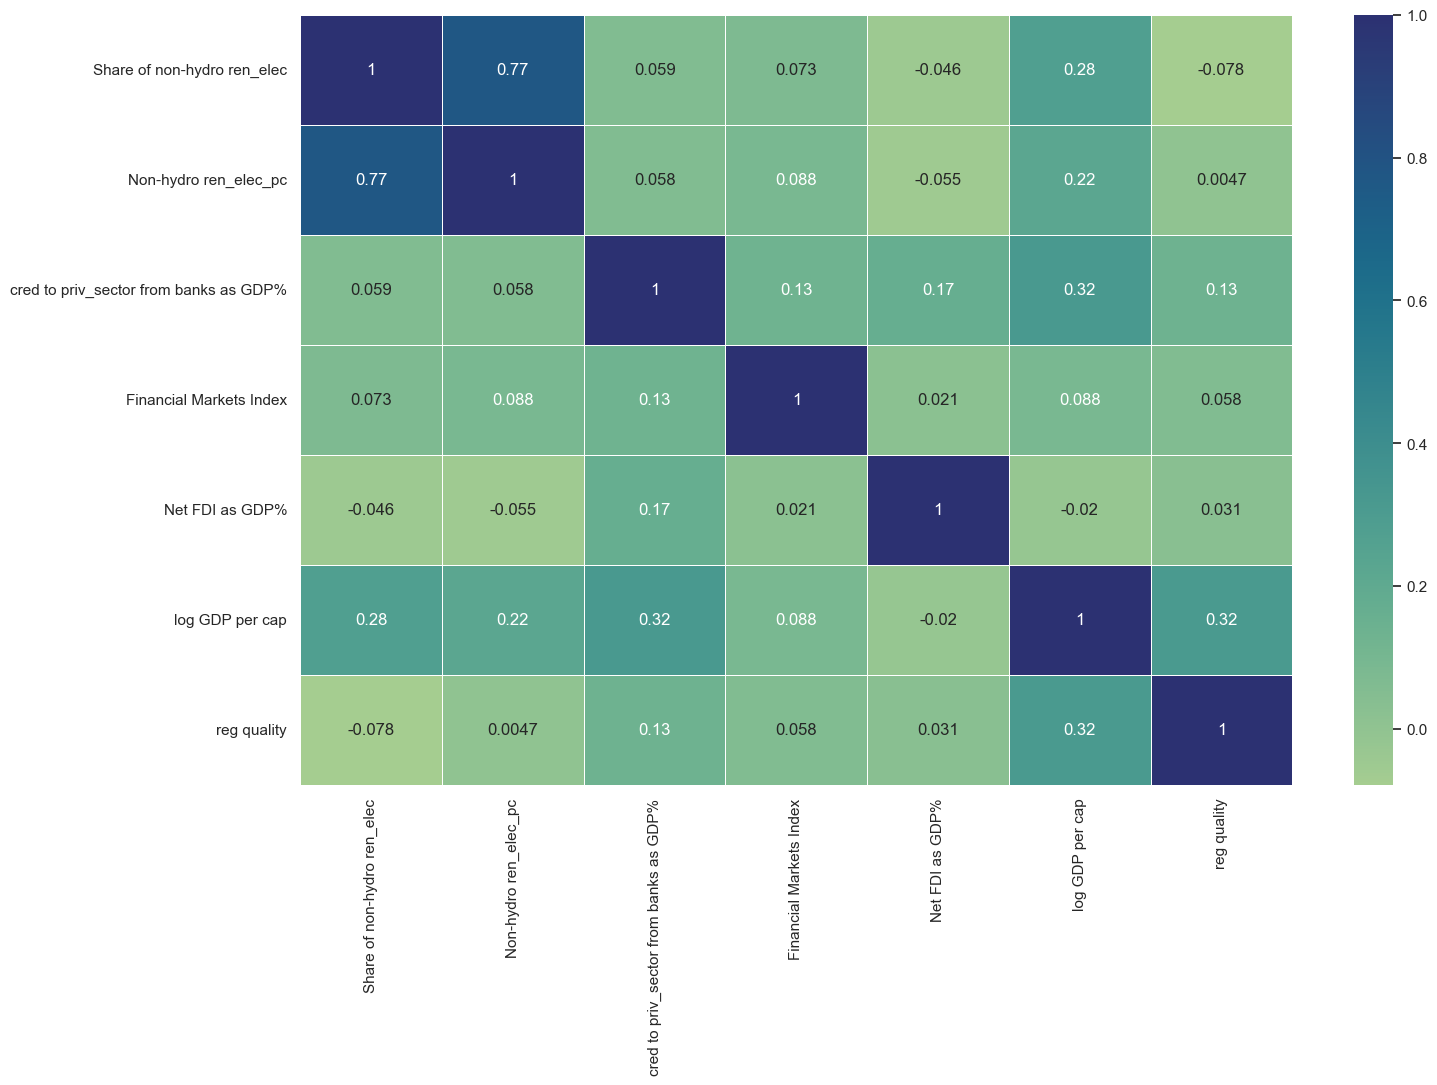

In [108]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.heatmap(df_one_within[norm.columns].corr(), annot=True, linewidth=.5, cmap="crest")
plt.savefig('graph b2.png')

Finally, I present a scatter plot with some of the key variables of interest

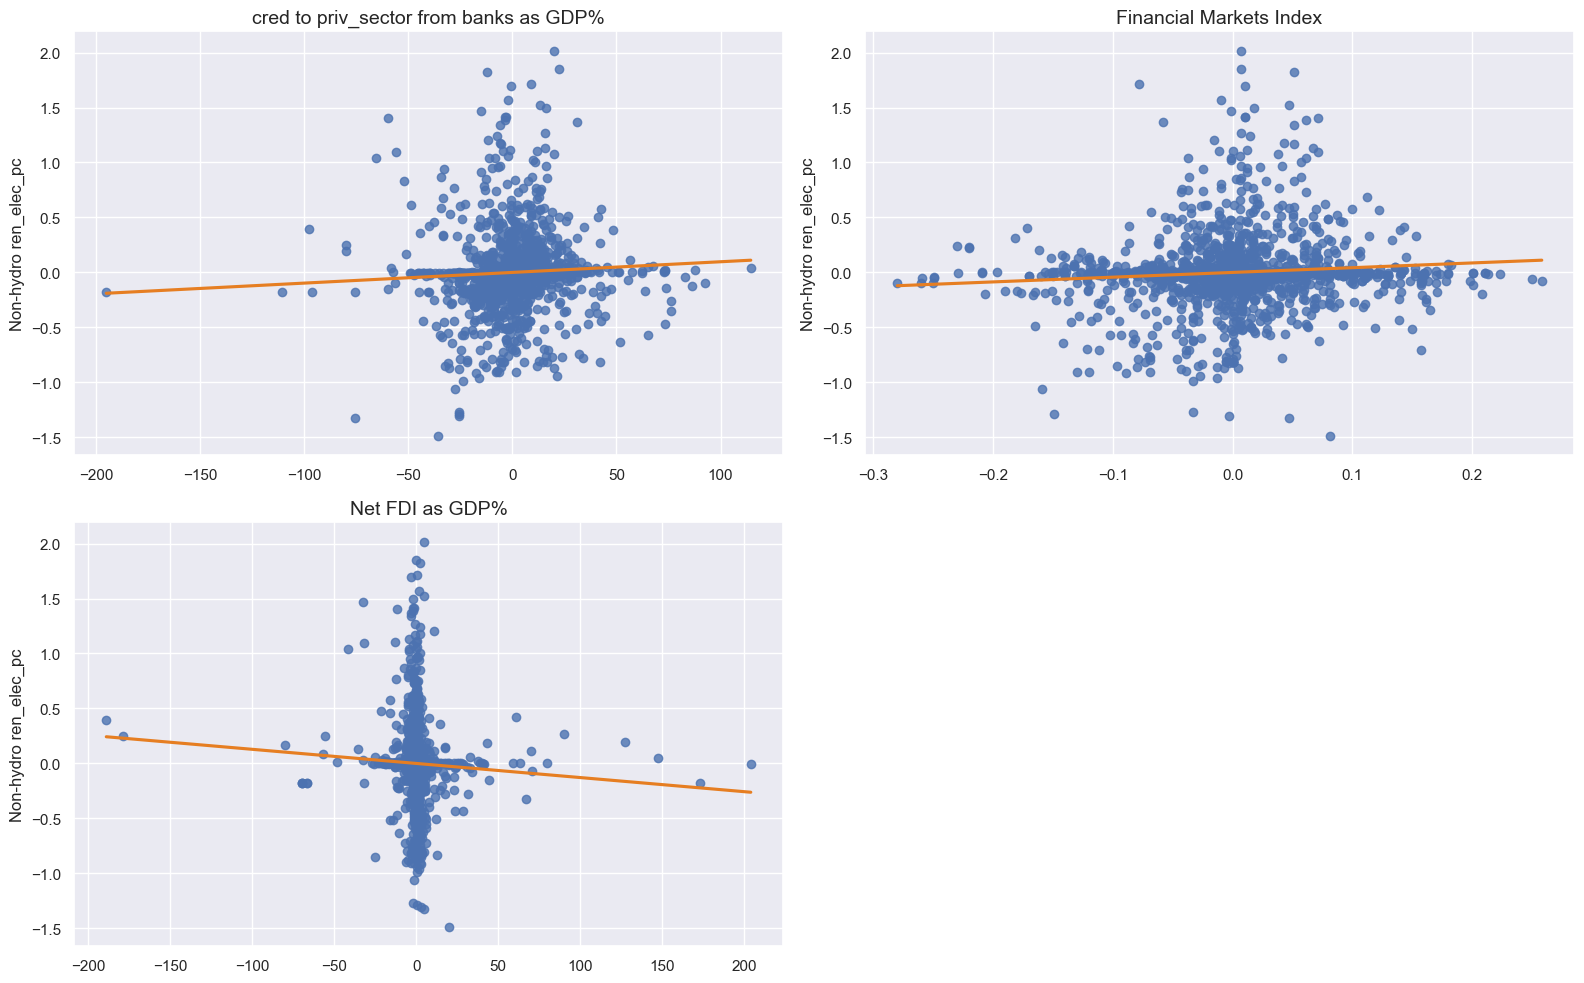

In [109]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df_one_within[x], y = df_one_within["Non-hydro ren_elec_pc"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph b3.png')

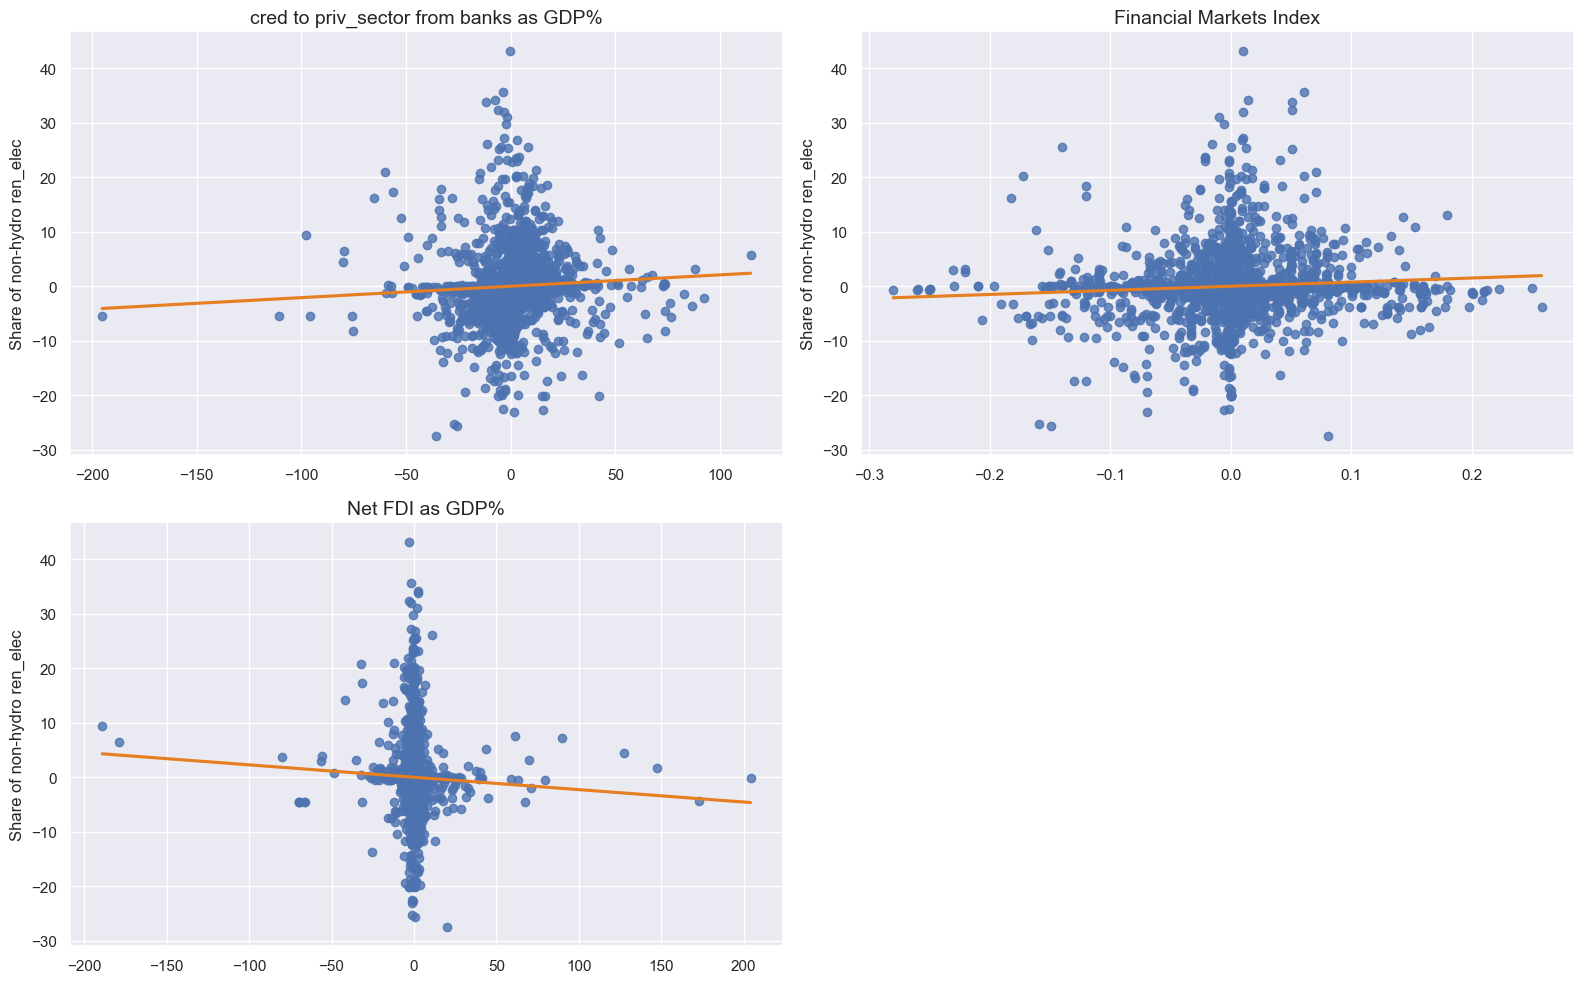

In [110]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df_one_within[x], y = df_one_within["Share of non-hydro ren_elec"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph b4.png')

## 3.4 Descriptive statistics two-way transformation <a id="section_3_4"></a>

In [111]:
sum_stats_two_way = df_two_way.describe()[sum_stats.columns]

sum_stats_two_way

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03
mean,7.29e-17,-1.99e-17,2.69e-15,-4.95e-20,-3.48e-16,-3.14e-16,-5.95e-18
std,4.49e+00,2.19e-01,1.38e+01,5.03e-02,1.08e+01,1.40e-01,1.91e-01
min,-2.43e+01,-1.32e+00,-1.79e+02,-2.65e-01,-1.87e+02,-6.31e-01,-1.06e+00
25%,-2.09e+00,-8.60e-02,-5.11e+00,-2.08e-02,-1.71e+00,-7.83e-02,-1.06e-01
50%,3.32e-01,1.83e-02,-8.46e-01,6.58e-04,-1.92e-01,-1.44e-02,8.96e-04
75%,2.11e+00,1.00e-01,4.93e+00,1.66e-02,1.42e+00,6.38e-02,1.07e-01
max,3.71e+01,1.71e+00,1.09e+02,2.51e-01,2.02e+02,8.22e-01,1.03e+00


I calculate the kurtosis and the skewness of each variable

In [112]:
kurtosis_two_way = pd.Series()

for x in sum_stats.columns:
    kurtosis_two_way[str(x)] = df_two_way[str(x)].kurt()
    
    
kurtosis_two_way = kurtosis_two_way.to_frame().rename(columns= {0:"kurtosis"}).transpose()

In [113]:
skewness_two_way = pd.Series()

for x in sum_stats.columns:
    skewness_two_way[str(x)] = df_two_way[str(x)].skew()
    
    
skewness_two_way = skewness_two_way.to_frame().rename(columns= {0:"skewness"}).transpose()

In [114]:
sum_stats_two_way = pd.concat([sum_stats_two_way, kurtosis_two_way, skewness_two_way])

sum_stats_two_way.to_csv('summary_stats_two_way.csv')

sum_stats_two_way

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
count,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03,2.80e+03
mean,7.29e-17,-1.99e-17,2.69e-15,-4.95e-20,-3.48e-16,-3.14e-16,-5.95e-18
std,4.49e+00,2.19e-01,1.38e+01,5.03e-02,1.08e+01,1.40e-01,1.91e-01
min,-2.43e+01,-1.32e+00,-1.79e+02,-2.65e-01,-1.87e+02,-6.31e-01,-1.06e+00
25%,-2.09e+00,-8.60e-02,-5.11e+00,-2.08e-02,-1.71e+00,-7.83e-02,-1.06e-01
50%,3.32e-01,1.83e-02,-8.46e-01,6.58e-04,-1.92e-01,-1.44e-02,8.96e-04
75%,2.11e+00,1.00e-01,4.93e+00,1.66e-02,1.42e+00,6.38e-02,1.07e-01
max,3.71e+01,1.71e+00,1.09e+02,2.51e-01,2.02e+02,8.22e-01,1.03e+00
kurtosis,8.69e+00,1.11e+01,2.12e+01,4.24e+00,1.54e+02,2.92e+00,2.87e+00
skewness,7.26e-01,8.71e-01,-4.01e-01,-2.38e-02,2.10e+00,5.61e-01,1.24e-01


Now, I calculate the Jarque-Bera test for normality

In [115]:
norm_two_way = pd.DataFrame()

for x in sum_stats.columns:
    norm_two_way[x] = stats.jarque_bera(df_two_way[x].dropna())

norm_two_way.index = ["Statistic", "p-value"]

norm_two_way.to_csv('jarquebera_two_way.csv')

norm_two_way

,Share of non-hydro ren_elec,Non-hydro ren_elec_pc,cred to priv_sector from banks as GDP%,Financial Markets Index,Net FDI as GDP%,log GDP per cap,reg quality
Statistic,9031.49,14586.46,52157.01,2088.16,2.75e+06,1.14e+03,9.66e+02
p-value,0.00,0.00,0.00,0.00,0.00e+00,3.17e-247,1.65e-210


Next, I obtain the kernell density plots of the different variables

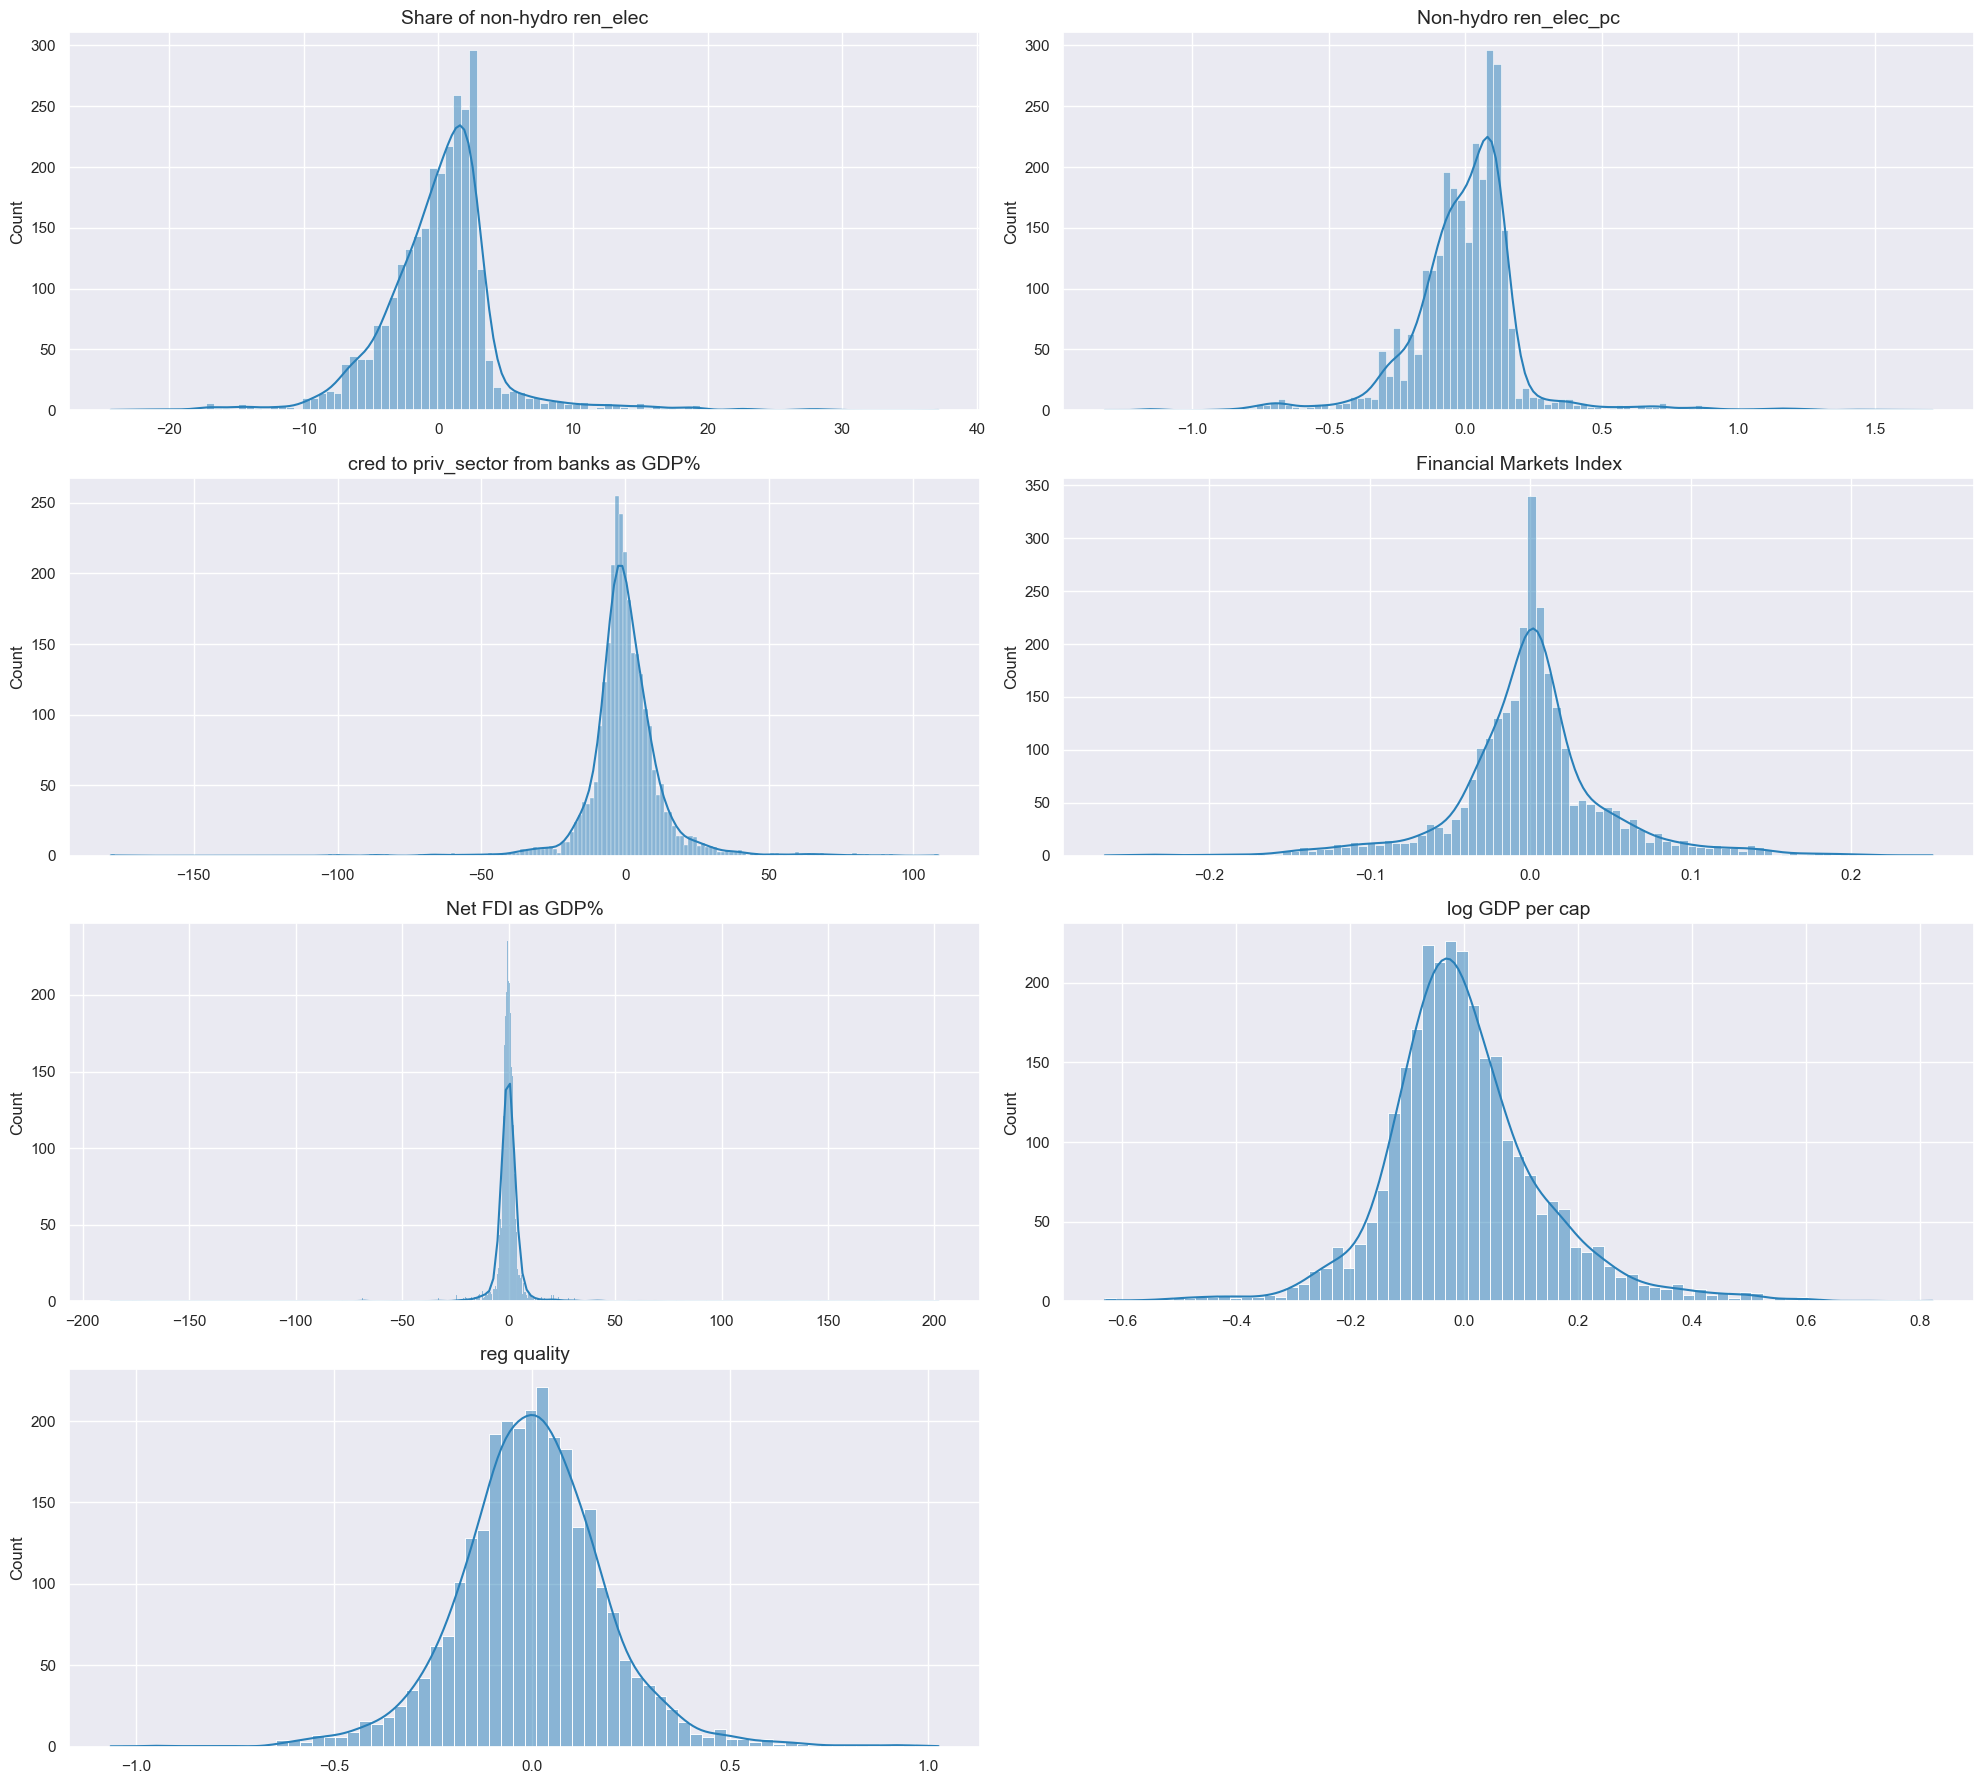

In [116]:
fig, axs = plt.subplots(4,2, figsize=(20, 18))

for x in sum_stats.columns:
    a = math.floor(sum_stats.columns.get_loc(x)/2)
    b = sum_stats.columns.get_loc(x)%2
    
    sns.histplot(df_two_way[x], kde = True, color = "#2980b9", ax=axs[a,b])
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[3, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph c1.png')

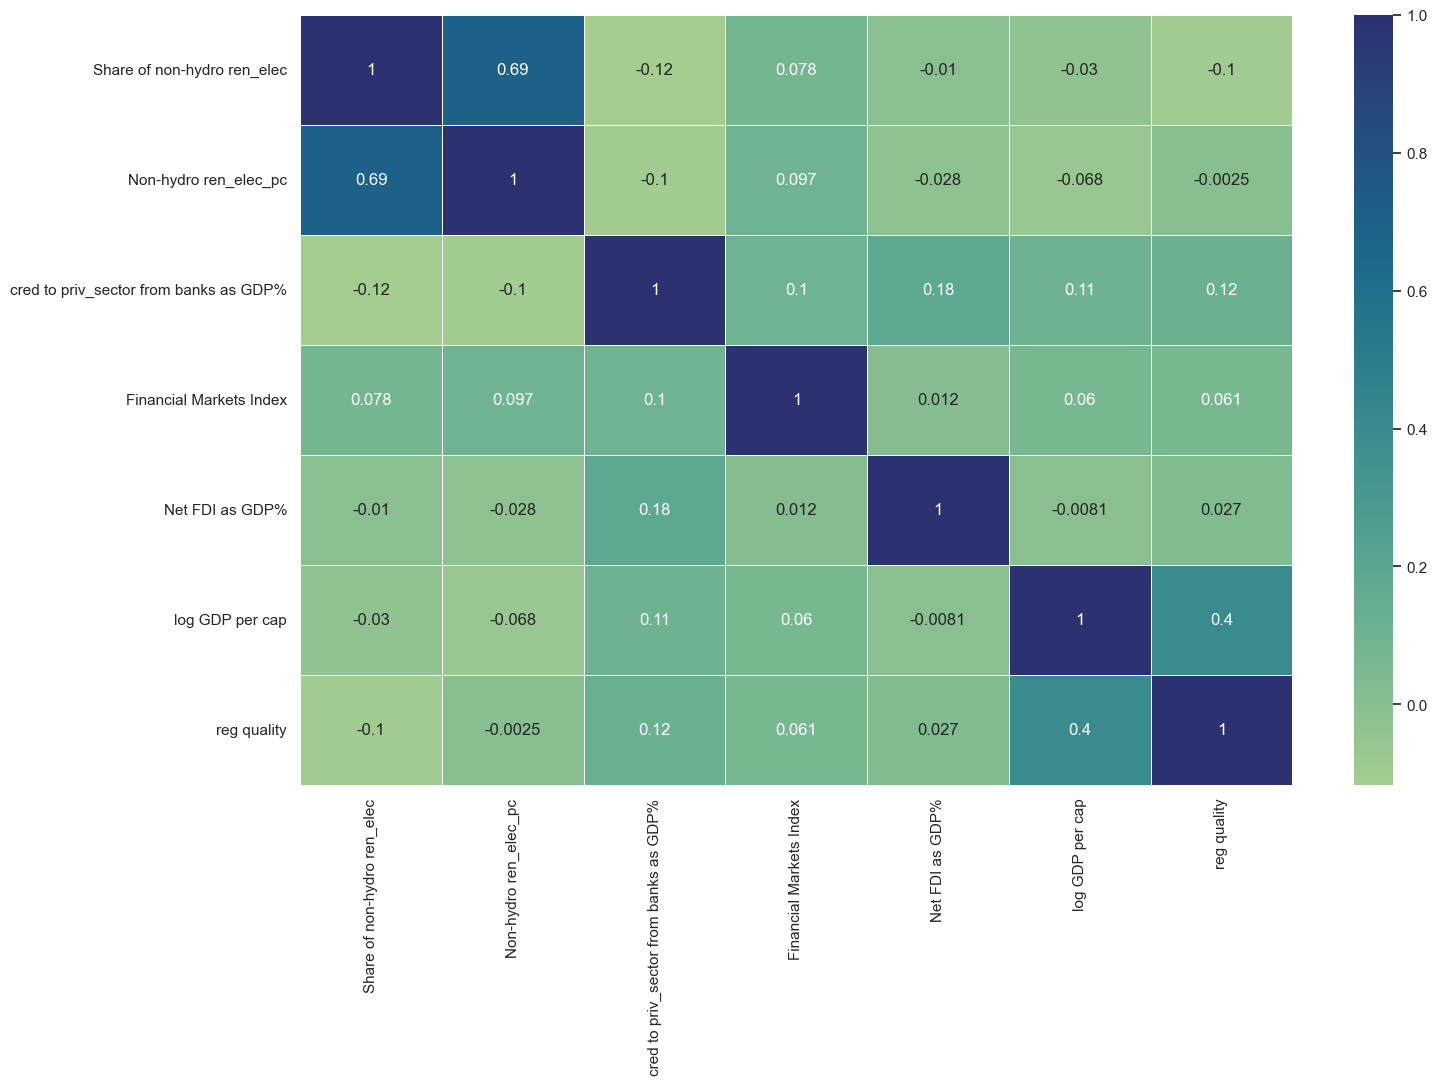

In [117]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.heatmap(df_two_way[norm.columns].corr(), annot=True, linewidth=.5, cmap="crest")
plt.savefig('graph c2.png')

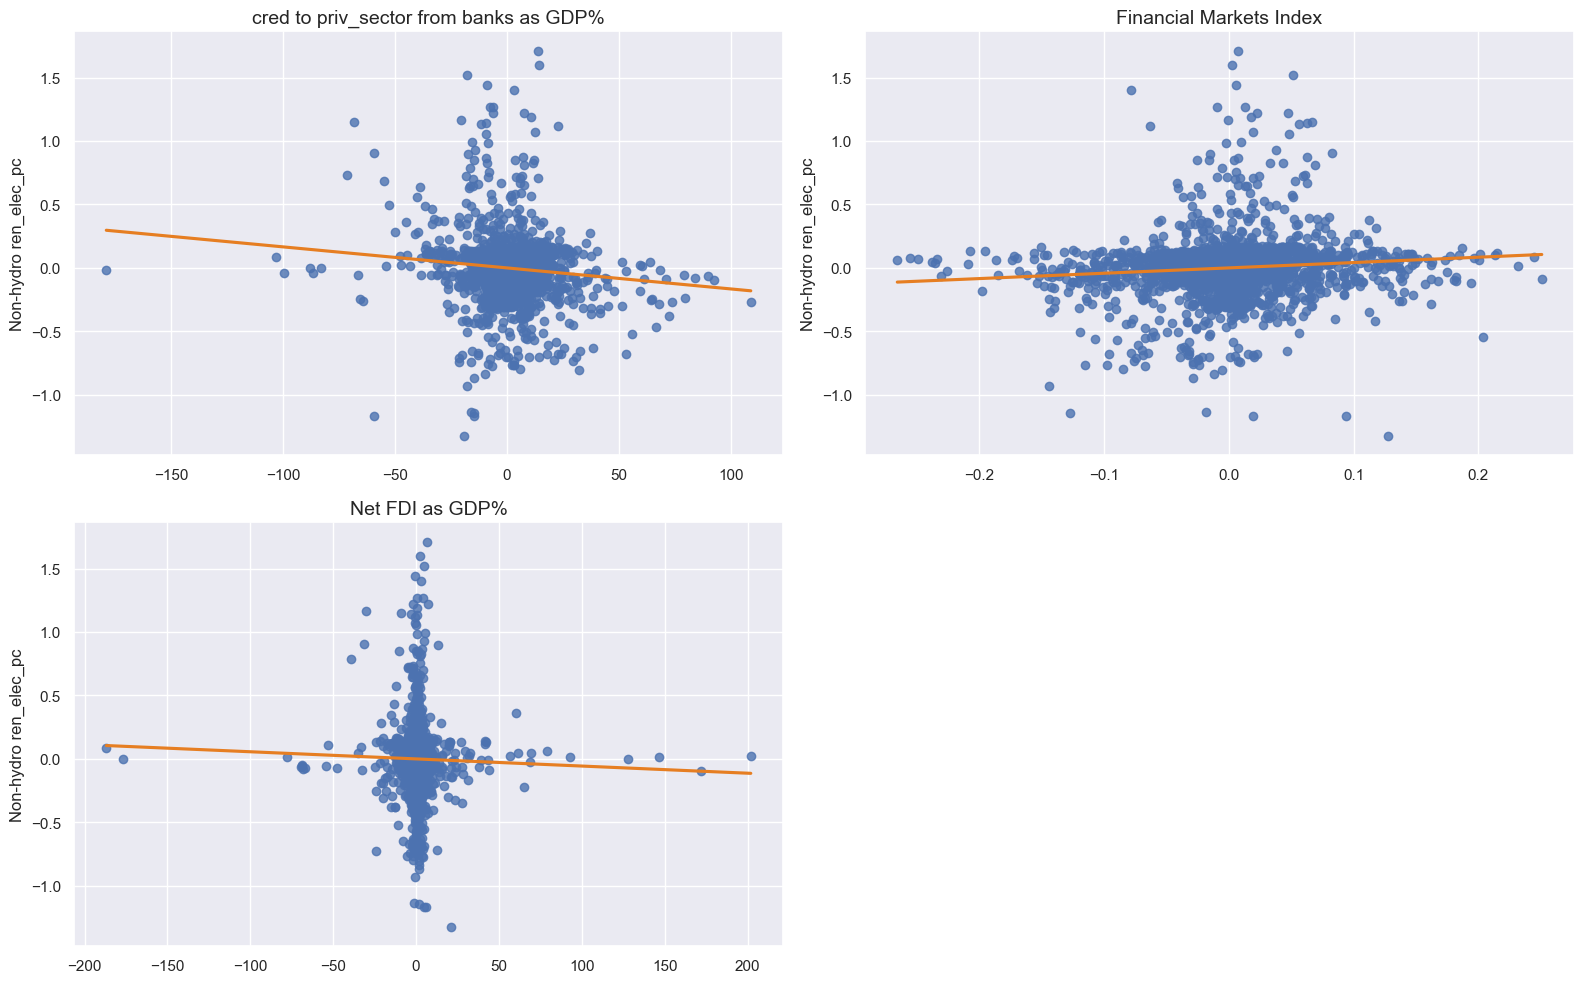

In [118]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df_two_way[x], y = df_two_way["Non-hydro ren_elec_pc"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph c3.png')

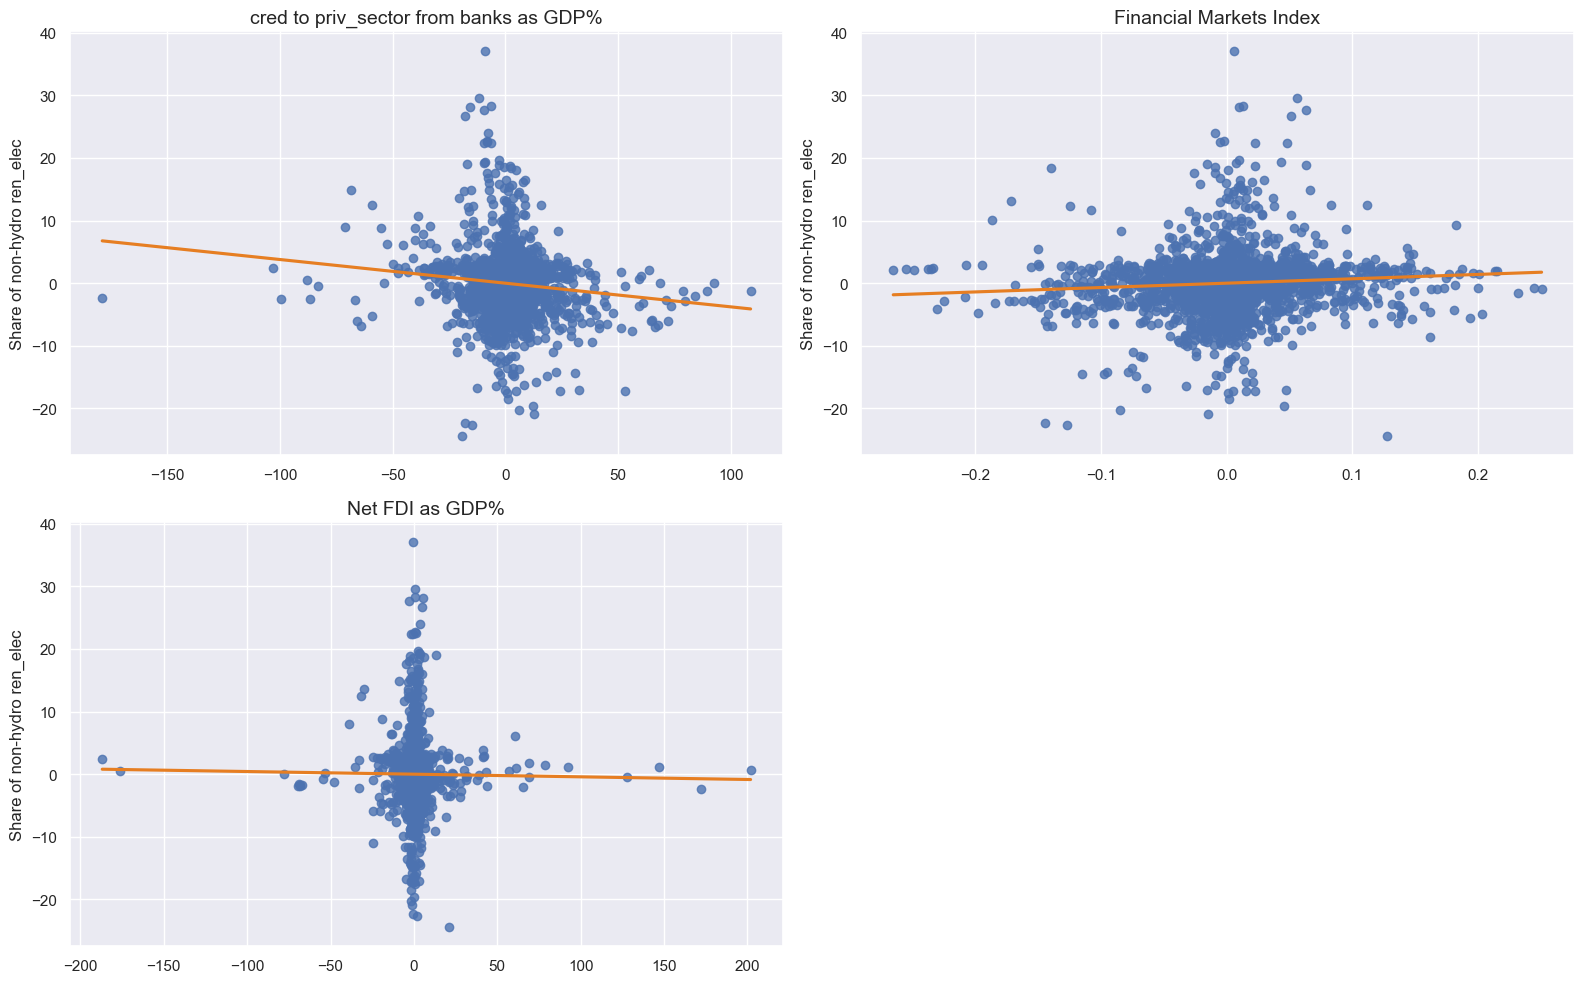

In [119]:
vars = ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%' ]

fig, axs = plt.subplots(2,2, figsize=(16, 10))

for x in vars:
    a = math.floor(vars.index(x)/2)
    b = vars.index(x)%2
    
    sns.regplot(x = df_two_way[x], y = df_two_way["Share of non-hydro ren_elec"],data= df4, ax=axs[a,b], line_kws=dict(color="#e67e22"), ci=None)
    axs[a,b].set_title(x, fontsize = 14)
    axs[a,b].set_xlabel('')
    
    axs[1, 1].axis("off")
    
    
fig.tight_layout()
plt.savefig('graph c4.png')

# 4. Estimations specification 1<a id="chapter4"></a>

I save the sets of exogenous variables

In [120]:
exog_vars= ['cred to priv_sector from banks as GDP%', 'Financial Markets Index', 'Net FDI as GDP%',
            'log GDP per cap', 'reg quality']

#The second set of exogenous includes the interaction term with the Paris Agreement
exog_vars2 = ['cred to priv_sector as GDP%_paris_>2016', "Financial Markets Index_paris_>2016","FDI as GDP%_paris_>2016",
             'cred to priv_sector from banks as GDP%','Financial Markets Index', 'Net FDI as GDP%', 'log GDP per cap','reg quality']

I define the helper functions: save_results and add_stars

In [121]:
def add_stars(params, pvals):
    ret = []
    for param, pval in zip(params.values, pvals.values):
        if pval < 0.01:
            ret.append(str(f'{param:0.3f}***'))
        elif pval < 0.05:
            ret.append(str(f'{param:0.3f}**'))
        elif pval < 0.10:
            ret.append(str(f'{param:0.3f}*'))
        else:
            ret.append(str(f'{param:0.3f}'))
    return pd.Series(ret)


def save_results(model, name):
    out = model.params
    out[:] = add_stars(model.params, model.pvalues)
    out['r2'] = model.rsquared
    out.name = name
    return out

## 4.1  First difference estimation <a id="section_4_1"></a>

In [122]:
#Specification 1_diff


x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Non-hydro ren_elec_pc"]

diff_est = lm.panel.FirstDifferenceOLS(y, x).fit(cov_type='clustered', cluster_entity=True)

csv_data =diff_est.summary.as_csv()

with open('abs_plain_diff.csv', 'w') as f:
    f.write(csv_data)
    
diff_est.summary

Dep. Variable:,Non-hydro ren_elec_pc,R-squared:,0.0055
Estimator:,FirstDifferenceOLS,R-squared (Between):,-0.0240
No. Observations:,2386,R-squared (Within):,0.0158
Date:,"Wed, Mar 06 2024",R-squared (Overall):,0.0002
Time:,11:40:26,Log-likelihood,3437.1
Cov. Estimator:,Clustered,,
,,F-statistic:,2.6163
Entities:,144,P-value,0.0229
Avg Obs:,17.576,Distribution:,"F(5,2381)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,3.3870


## 4.2   One-way within estimation <a id="section_4_2"></a>

First I apply the Hasuman test

To store the different results, I create a Data Frame

In [123]:
hausman_test = pd.DataFrame()

hausman_test["index"] = pd.Series(["Statistic", "Degrees of Freedom" ,"p-value"])

In [124]:
#Hausman test Specification 1_within
x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Non-hydro ren_elec_pc"]

#Run the Fixed Effectsestimation
within_fe = lm.PanelOLS(y, x, entity_effects=True, time_effects=False, drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
fe_results = save_results(within_fe, 'Fixed')



#Apply the Hausman testusingthe previous estimation
ref = lm.panel.RandomEffects(y, x).fit(cov_type='clustered', cluster_entity=True)

β_re = ref.params.values.squeeze()
β_fe = within_fe.params.values.squeeze()

H = (β_fe - β_re).T @ np.linalg.inv(within_fe.cov.values - ref.cov.values) @ (β_fe - β_re)
print('Hausman Test of Endogeneity')
print('H0: No Endogeneity in RE model (E[c_i | X] = 0)')
print('='*30)
print(f'H = {H:0.4f}, df = {x.shape[1]}')
print(f'p = {stats.chi2.sf(H, x.shape[1]):0.05f}')

hausman_test["Specification 1"] = [H ,x.shape[1], stats.chi2.sf(H, x.shape[1]) ]

Hausman Test of Endogeneity
H0: No Endogeneity in RE model (E[c_i | X] = 0)
H = -68.8137, df = 5
p = 1.00000


In [125]:
#Specification 1_within


x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Non-hydro ren_elec_pc"]

model_within = PanelOLS(y, x, entity_effects = True) 
within_res = model_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_res.summary.as_csv()

with open('abs_plain_within.csv', 'w') as f:
    f.write(csv_data)

within_res.summary

Dep. Variable:,Non-hydro ren_elec_pc,R-squared:,0.0603
Estimator:,PanelOLS,R-squared (Between):,-40.806
No. Observations:,2531,R-squared (Within):,0.0603
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-31.586
Time:,11:40:27,Log-likelihood,464.89
Cov. Estimator:,Clustered,,
,,F-statistic:,30.575
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(5,2382)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,6.0555


## 4.3   Two-way within estimation <a id="section_4_3"></a>

In [126]:
#Specification 1_two-way_within


x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Non-hydro ren_elec_pc"]


model_two_within = PanelOLS(y, x, entity_effects = True, time_effects=True) 
within_two_res = model_two_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_two_res.summary.as_csv()

with open('abs_plain_two_way.csv', 'w') as f:
    f.write(csv_data)

within_two_res.summary

Dep. Variable:,Non-hydro ren_elec_pc,R-squared:,0.0609
Estimator:,PanelOLS,R-squared (Between):,-27.569
No. Observations:,2531,R-squared (Within):,-0.1322
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-21.500
Time:,11:40:27,Log-likelihood,802.62
Cov. Estimator:,Clustered,,
,,F-statistic:,30.680
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(5,2364)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,2.7561


# 5. Estimations specification 2<a id="chapter5"></a>

## 5.1  First difference estimation <a id="section_5_1"></a>

In [127]:
#Specification 2_diff
x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Share of non-hydro ren_elec"]

diff_est = lm.panel.FirstDifferenceOLS(y, x).fit(cov_type='clustered', cluster_entity=True)

csv_data =diff_est.summary.as_csv()

with open('share_plain_diff.csv', 'w') as f:
    f.write(csv_data)


diff_est.summary

Dep. Variable:,Share of non-hydro ren_elec,R-squared:,0.0023
Estimator:,FirstDifferenceOLS,R-squared (Between):,-0.1256
No. Observations:,2386,R-squared (Within):,0.0223
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-0.0670
Time:,11:40:27,Log-likelihood,-4429.4
Cov. Estimator:,Clustered,,
,,F-statistic:,1.1178
Entities:,144,P-value,0.3486
Avg Obs:,17.576,Distribution:,"F(5,2381)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,2.0990


## 5.2   One-way within estimation <a id="section_5_2"></a>

First, I run the Hausman test

In [128]:
x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Share of non-hydro ren_elec"]

#Run the Fixed Effectsestimation
within_fe = lm.PanelOLS(y, x, entity_effects=True, time_effects=False, drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
fe_results = save_results(within_fe, 'Fixed')



#Apply the Hausman testusingthe previous estimation
ref = lm.panel.RandomEffects(y, x).fit(cov_type='clustered', cluster_entity=True)

β_re = ref.params.values.squeeze()
β_fe = within_fe.params.values.squeeze()

H = (β_fe - β_re).T @ np.linalg.inv(within_fe.cov.values - ref.cov.values) @ (β_fe - β_re)
print('Hausman Test of Endogeneity')
print('H0: No Endogeneity in RE model (E[c_i | X] = 0)')
print('='*30)
print(f'H = {H:0.4f}, df = {x.shape[1]}')
print(f'p = {stats.chi2.sf(H, x.shape[1]):0.05f}')

hausman_test["Specification 2"] = [H ,x.shape[1], stats.chi2.sf(H, x.shape[1]) ]

Hausman Test of Endogeneity
H0: No Endogeneity in RE model (E[c_i | X] = 0)
H = 35.7810, df = 5
p = 0.00000


In [129]:
#Specification 2_within

x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Share of non-hydro ren_elec" ]


model_within = PanelOLS(y, x, entity_effects = True) 
within_res = model_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_res.summary.as_csv()

with open('share_plain_within.csv', 'w') as f:
    f.write(csv_data)

within_res.summary

Dep. Variable:,Share of non-hydro ren_elec,R-squared:,0.1005
Estimator:,PanelOLS,R-squared (Between):,-67.938
No. Observations:,2531,R-squared (Within):,0.1005
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-52.748
Time:,11:40:27,Log-likelihood,-7277.7
Cov. Estimator:,Clustered,,
,,F-statistic:,53.213
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(5,2382)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,7.0921


## 5.3   Two-way within estimation <a id="section_5_3"></a>

In [130]:
#Specification 2_two-way_within

x = df_levels_lag1[exog_vars]
y = df_levels_lag1["Share of non-hydro ren_elec" ]


model_within = PanelOLS(y, x, entity_effects = True, time_effects=True) 
within_res = model_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_res.summary.as_csv()

with open('share_plain_two_way.csv', 'w') as f:
    f.write(csv_data)

within_res.summary

Dep. Variable:,Share of non-hydro ren_elec,R-squared:,0.0487
Estimator:,PanelOLS,R-squared (Between):,-2.8464
No. Observations:,2531,R-squared (Within):,-0.0458
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-2.2576
Time:,11:40:27,Log-likelihood,-6955.4
Cov. Estimator:,Clustered,,
,,F-statistic:,24.187
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(5,2364)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,3.2472


# 6. Estimations specification 3<a id="chapter6"></a>

## 6.1  First difference estimation <a id="section_6_1"></a>

In [131]:
#Specification 3_diff


x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Non-hydro ren_elec_pc"]

diff_est = lm.panel.FirstDifferenceOLS(y, x).fit(cov_type='clustered', cluster_entity=True)

csv_data =diff_est.summary.as_csv()

with open('abs_paris_diff.csv', 'w') as f:
    f.write(csv_data)
    
diff_est.summary

Dep. Variable:,Non-hydro ren_elec_pc,R-squared:,0.0114
Estimator:,FirstDifferenceOLS,R-squared (Between):,0.0715
No. Observations:,2386,R-squared (Within):,0.0489
Date:,"Wed, Mar 06 2024",R-squared (Overall):,0.0794
Time:,11:40:27,Log-likelihood,3444.2
Cov. Estimator:,Clustered,,
,,F-statistic:,3.4274
Entities:,144,P-value,0.0006
Avg Obs:,17.576,Distribution:,"F(8,2378)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,3.7561


## 6.2   One-way within estimation <a id="section_6_2"></a>

I run the Hausman test:

In [132]:
x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Non-hydro ren_elec_pc"]

#Run the Fixed Effectsestimation
within_fe = lm.PanelOLS(y, x, entity_effects=True, time_effects=False, drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
fe_results = save_results(within_fe, 'Fixed')



#Apply the Hausman testusingthe previous estimation
ref = lm.panel.RandomEffects(y, x).fit(cov_type='clustered', cluster_entity=True)

β_re = ref.params.values.squeeze()
β_fe = within_fe.params.values.squeeze()

H = (β_fe - β_re).T @ np.linalg.inv(within_fe.cov.values - ref.cov.values) @ (β_fe - β_re)
print('Hausman Test of Endogeneity')
print('H0: No Endogeneity in RE model (E[c_i | X] = 0)')
print('='*30)
print(f'H = {H:0.4f}, df = {x.shape[1]}')
print(f'p = {stats.chi2.sf(H, x.shape[1]):0.05f}')

hausman_test["Specification 3"] = [H ,x.shape[1], stats.chi2.sf(H, x.shape[1]) ]

Hausman Test of Endogeneity
H0: No Endogeneity in RE model (E[c_i | X] = 0)
H = -24.0692, df = 8
p = 1.00000


In [133]:
#Specification 3_within


x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Non-hydro ren_elec_pc"]

model_within = PanelOLS(y, x, entity_effects = True) 
within_res = model_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_res.summary.as_csv()

with open('abs_paris_within.csv', 'w') as f:
    f.write(csv_data)

within_res.summary

Dep. Variable:,Non-hydro ren_elec_pc,R-squared:,0.3091
Estimator:,PanelOLS,R-squared (Between):,-6.9250
No. Observations:,2531,R-squared (Within):,0.3091
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-5.2839
Time:,11:40:28,Log-likelihood,854.11
Cov. Estimator:,Clustered,,
,,F-statistic:,133.04
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(8,2379)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,12.473


## 6.3   Two-way within estimation <a id="section_6_3"></a>

In [134]:
#Specification 3_two-way_within


x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Non-hydro ren_elec_pc"]


model_two_within = PanelOLS(y, x, entity_effects = True, time_effects=True) 
within_two_res = model_two_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_two_res.summary.as_csv()

with open('abs_paris_two_way.csv', 'w') as f:
    f.write(csv_data)

within_two_res.summary

Dep. Variable:,Non-hydro ren_elec_pc,R-squared:,0.2301
Estimator:,PanelOLS,R-squared (Between):,-17.040
No. Observations:,2531,R-squared (Within):,0.2378
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-13.222
Time:,11:40:28,Log-likelihood,1054.0
Cov. Estimator:,Clustered,,
,,F-statistic:,88.202
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(8,2361)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,7.0859


# 7. Estimations specification 4<a id="chapter7|"></a>

## 7.1  First difference estimation <a id="section_7_1"></a>

In [135]:
#Specification 4_diff

x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Share of non-hydro ren_elec"]

diff_est = lm.panel.FirstDifferenceOLS(y, x).fit(cov_type='clustered', cluster_entity=True)

csv_data =diff_est.summary.as_csv()

with open('share_paris_diff.csv', 'w') as f:
    f.write(csv_data)
    
diff_est.summary

Dep. Variable:,Share of non-hydro ren_elec,R-squared:,0.0072
Estimator:,FirstDifferenceOLS,R-squared (Between):,0.0015
No. Observations:,2386,R-squared (Within):,0.0463
Date:,"Wed, Mar 06 2024",R-squared (Overall):,0.0344
Time:,11:40:28,Log-likelihood,-4423.5
Cov. Estimator:,Clustered,,
,,F-statistic:,2.1700
Entities:,144,P-value,0.0270
Avg Obs:,17.576,Distribution:,"F(8,2378)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,2.0741


## 7.2   One-way within estimation <a id="section_7_2"></a>

First, I run the Hausman test

In [136]:
x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Share of non-hydro ren_elec"]

#Run the Fixed Effectsestimation
within_fe = lm.PanelOLS(y, x, entity_effects=True, time_effects=False, drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
fe_results = save_results(within_fe, 'Fixed')



#Apply the Hausman testusingthe previous estimation
ref = lm.panel.RandomEffects(y, x).fit(cov_type='clustered', cluster_entity=True)

β_re = ref.params.values.squeeze()
β_fe = within_fe.params.values.squeeze()

H = (β_fe - β_re).T @ np.linalg.inv(within_fe.cov.values - ref.cov.values) @ (β_fe - β_re)
print('Hausman Test of Endogeneity')
print('H0: No Endogeneity in RE model (E[c_i | X] = 0)')
print('='*30)
print(f'H = {H:0.4f}, df = {x.shape[1]}')
print(f'p = {stats.chi2.sf(H, x.shape[1]):0.05f}')


hausman_test["Specification 4"] = [H ,x.shape[1], stats.chi2.sf(H, x.shape[1]) ]

Hausman Test of Endogeneity
H0: No Endogeneity in RE model (E[c_i | X] = 0)
H = 14.9354, df = 8
p = 0.06041


In [137]:
#Estimation with the Paris Agreement interaction term


x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Share of non-hydro ren_elec" ]


model_within = PanelOLS(y, x, entity_effects = True) 
within_res = model_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_res.summary.as_csv()

with open('share_paris_within.csv', 'w') as f:
    f.write(csv_data)

within_res.summary

Dep. Variable:,Share of non-hydro ren_elec,R-squared:,0.2369
Estimator:,PanelOLS,R-squared (Between):,-26.583
No. Observations:,2531,R-squared (Within):,0.2369
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-20.545
Time:,11:40:28,Log-likelihood,-7069.6
Cov. Estimator:,Clustered,,
,,F-statistic:,92.326
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(8,2379)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,11.778


## 7.3   Two-way within estimation <a id="section_7_3"></a>

In [138]:
#Estimation with the Paris Agreement interaction term


x = df_levels_lag1[exog_vars2]
y = df_levels_lag1["Share of non-hydro ren_elec" ]


model_within = PanelOLS(y, x, entity_effects = True, time_effects=True) 
within_res = model_within.fit(cov_type='clustered', cluster_entity=True)

csv_data =within_res.summary.as_csv()

with open('share_paris_two_way.csv', 'w') as f:
    f.write(csv_data)

within_res.summary

Dep. Variable:,Share of non-hydro ren_elec,R-squared:,0.0902
Estimator:,PanelOLS,R-squared (Between):,-2.0972
No. Observations:,2531,R-squared (Within):,0.1252
Date:,"Wed, Mar 06 2024",R-squared (Overall):,-1.6321
Time:,11:40:28,Log-likelihood,-6899.0
Cov. Estimator:,Clustered,,
,,F-statistic:,29.243
Entities:,144,P-value,0.0000
Avg Obs:,17.576,Distribution:,"F(8,2361)"
Min Obs:,3.0000,,
Max Obs:,19.000,F-statistic (robust):,2.9286


In [140]:
hausman_test.to_csv("Hausman_test.csv")